In [234]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

from matgen import matutils

# Data processing

## Random case

In [5]:
data_alloy = pd.read_csv('DataECAP//alloy.csv')

In [6]:
data_alloy.info()
data_alloy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        223 non-null    object
 1   filename  223 non-null    object
 2   alloy     223 non-null    object
 3   pass      223 non-null    int64 
 4   level     223 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 8.8+ KB


,id,filename,alloy,pass,level
0,Cu_01Cr_01Zr_pass1_1,DataECAP/Cu_01Cr_01Zr/pass1/disangles1.txt,Cu_01Cr_01Zr,1,1
1,Cu_01Cr_01Zr_pass1_2,DataECAP/Cu_01Cr_01Zr/pass1/disangles2.txt,Cu_01Cr_01Zr,1,2
2,Cu_01Cr_01Zr_pass1_3,DataECAP/Cu_01Cr_01Zr/pass1/disangles3.txt,Cu_01Cr_01Zr,1,3
3,Cu_01Cr_01Zr_pass1_4,DataECAP/Cu_01Cr_01Zr/pass1/disangles4.txt,Cu_01Cr_01Zr,1,4
4,Cu_01Cr_01Zr_pass1_5,DataECAP/Cu_01Cr_01Zr/pass1/disangles5.txt,Cu_01Cr_01Zr,1,5


In [42]:
data_alloy['N_disangles'] = [len(np.loadtxt(filename)) for filename in tqdm(data_alloy['filename'].tolist())]

100%|████████████████████████████████████████████████████████████████████████████████| 223/223 [07:07<00:00,  1.92s/it]


In [43]:
data_alloy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           223 non-null    object 
 1   filename     223 non-null    object 
 2   alloy        223 non-null    object 
 3   pass         223 non-null    int64  
 4   level        223 non-null    int64  
 5   p            223 non-null    float64
 6   N_disangles  223 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 12.3+ KB


In [44]:
data_alloy.head()

,id,filename,alloy,pass,level,p,N_disangles
0,Cu_01Cr_01Zr_pass1_1,DataECAP/Cu_01Cr_01Zr/pass1/disangles1.txt,Cu_01Cr_01Zr,1,1,0.23548,2858
1,Cu_01Cr_01Zr_pass1_2,DataECAP/Cu_01Cr_01Zr/pass1/disangles2.txt,Cu_01Cr_01Zr,1,2,0.17960,6598
2,Cu_01Cr_01Zr_pass1_3,DataECAP/Cu_01Cr_01Zr/pass1/disangles3.txt,Cu_01Cr_01Zr,1,3,0.14252,11163
3,Cu_01Cr_01Zr_pass1_4,DataECAP/Cu_01Cr_01Zr/pass1/disangles4.txt,Cu_01Cr_01Zr,1,4,0.13200,15992
4,Cu_01Cr_01Zr_pass1_5,DataECAP/Cu_01Cr_01Zr/pass1/disangles5.txt,Cu_01Cr_01Zr,1,5,0.11212,20647


In [56]:
data_alloy['N_disangles'].sort_values().head(50)

122       18
66        27
65        71
121       94
60       120
64       146
63       225
61       230
62       262
120      315
119      672
107      676
118     1184
108     1393
117     1892
109     2148
116     2575
110     2783
87      2786
0       2858
115     3096
111     3225
114     3446
112     3519
113     3592
88      6006
163     6146
1       6598
143     8763
89      9559
19     11115
2      11163
67     11578
40     11579
90     13053
164    13441
18     14669
123    15160
106    15688
3      15992
91     16301
105    17949
17     18787
144    19015
92     19190
104    20292
4      20647
93     21731
165    21845
103    22495
Name: N_disangles, dtype: int64

In [45]:
data_alloy.to_csv('alloy_updated.csv', index=False)

In [57]:
filename = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_01Cr_01Zr\\Neper_RandomOri_Cu-0.1Cr-0.1Zr\pass4\disangles\disangles8.txt'
random_distr = np.loadtxt(filename)

In [59]:
from numpy.random import default_rng
rng = default_rng()

In [104]:
stds = {}
sizes = data_alloy['N_disangles'].unique()
sizes = sizes[sizes <= 100000]
# sizes = [2858, 6598, 11163, 15992]
N = 100
for size in tqdm(sizes):
    ps = []
    for i in range(N):
        angles = rng.choice(random_distr, size=size, replace=True)
        ps.append(np.histogram(angles, bins=[0, 15, 63])[0][0] / len(angles))
    stds[size] = np.std(ps, ddof=1)

100%|████████████████████████████████████████████████████████████████████████████████| 107/107 [00:48<00:00,  2.18it/s]


In [194]:
stds_H2 = {}
means_H2 = {}
bins = [0, 15, 63]
Q = np.loadtxt('DataECAP/Data_2bins_ref.txt')
sizes = data_alloy['N_disangles'].unique()
sizes = sizes[sizes <= 100000]
# sizes = [2858, 6598, 11163, 15992]
N = 100
for size in tqdm(sizes):
    Hs = []
    for i in range(N):
        angles = rng.choice(random_distr, size=size, replace=True)
        P = np.histogram(angles, bins=bins)[0] / len(angles)
        Hs.append(matutils._hellinger(P, Q))
    stds_H2[size] = np.std(Hs, ddof=1)
    means_H2[size] = np.mean(Hs)

100%|████████████████████████████████████████████████████████████████████████████████| 107/107 [00:50<00:00,  2.12it/s]


In [193]:
stds_H5 = {}
means_H5 = {}
bins = [*range(0,63,15)] + [63]
Q = np.loadtxt('DataECAP/Data_5bins_ref.txt')

sizes = data_alloy['N_disangles'].unique()
sizes = sizes[sizes <= 100000]
# sizes = [2858, 6598, 11163, 15992]
N = 100
for size in tqdm(sizes):
    Hs = []
    for i in range(N):
        angles = rng.choice(random_distr, size=size, replace=True)
        P = np.histogram(angles, bins=bins)[0] / len(angles)
        Hs.append(matutils._hellinger(P, Q))
    stds_H5[size] = np.std(Hs, ddof=1)
    means_H5[size] = np.mean(Hs)

100%|████████████████████████████████████████████████████████████████████████████████| 107/107 [00:52<00:00,  2.04it/s]


In [192]:
stds_H13 = {}
means_H13 = {}
bins = [*range(0,63,5)] + [63]
Q = np.loadtxt('DataECAP/Data_13bins_ref.txt')

sizes = data_alloy['N_disangles'].unique()
sizes = sizes[sizes <= 100000]
# sizes = [2858, 6598, 11163, 15992]
N = 100
for size in tqdm(sizes):
    Hs = []
    for i in range(N):
        angles = rng.choice(random_distr, size=size, replace=True)
        P = np.histogram(angles, bins=bins)[0] / len(angles)
        Hs.append(matutils._hellinger(P, Q))
    stds_H13[size] = np.std(Hs, ddof=1)
    means_H13[size] = np.mean(Hs)

100%|████████████████████████████████████████████████████████████████████████████████| 107/107 [00:51<00:00,  2.10it/s]


In [191]:
stds_H32 = {}
means_H32 = {}
bins = [*range(0,63,2)] + [63]
Q = np.loadtxt('DataECAP/Data_32bins_ref.txt')

sizes = data_alloy['N_disangles'].unique()
sizes = sizes[sizes <= 100000]
# sizes = [2858, 6598, 11163, 15992]
N = 100
for size in tqdm(sizes):
    Hs = []
    for i in range(N):
        angles = rng.choice(random_distr, size=size, replace=True)
        P = np.histogram(angles, bins=bins)[0] / len(angles)
        Hs.append(matutils._hellinger(P, Q))
    stds_H32[size] = np.std(Hs, ddof=1)
    means_H32[size] = np.mean(Hs)

100%|████████████████████████████████████████████████████████████████████████████████| 107/107 [00:51<00:00,  2.09it/s]


In [219]:
stds_H63_ = {}
means_H63_ = {}
bins = [*range(0,63,1)] + [63]
Q = np.loadtxt('DataECAP/Data_63bins_ref.txt')

sizes = data_alloy['N_disangles'].unique()
sizes = sizes[sizes <= 100000]
# sizes = [2858, 6598, 11163, 15992]
N = 1000
for size in tqdm(sizes):
    Hs = []
    for i in range(N):
        angles = rng.choice(random_distr, size=size, replace=True)
        P = np.histogram(angles, bins=bins)[0] / len(angles)
        Hs.append(matutils._hellinger(P, Q))
    stds_H63_[size] = np.std(Hs, ddof=1)
    means_H63_[size] = np.mean(Hs)

100%|████████████████████████████████████████████████████████████████████████████████| 107/107 [08:19<00:00,  4.67s/it]


In [222]:
sorted(means_H63.items(), key=lambda key: key[1])

[(94680, 0.018703975665111217),
 (98583, 0.018761604755848305),
 (99614, 0.018834810808296885),
 (96822, 0.0188435267786932),
 (91899, 0.018907490843324878),
 (88653, 0.01890790716598911),
 (90591, 0.018936600032903393),
 (79743, 0.01904275141090966),
 (86121, 0.019071729253169925),
 (80651, 0.01916809172289311),
 (72605, 0.0193159325776741),
 (77865, 0.01931952607278437),
 (80758, 0.01933451798046284),
 (76756, 0.019405088586939415),
 (66526, 0.019678358474695734),
 (69582, 0.019699674020942196),
 (64435, 0.019798133002812836),
 (65165, 0.019845969394732127),
 (61734, 0.019912737332841577),
 (56510, 0.0201690041292145),
 (54558, 0.020176238211200487),
 (58967, 0.020239418309943014),
 (57085, 0.020322029420165727),
 (48622, 0.020576929356041954),
 (42491, 0.021041952502295857),
 (43310, 0.021137267132186235),
 (39762, 0.02130846397802994),
 (41685, 0.021329601054493913),
 (40882, 0.021333215167207088),
 (34681, 0.02204273224839705),
 (34645, 0.022049301407725114),
 (34096, 0.0221911250

In [223]:
sorted(means_H63_.items(), key=lambda key: key[1])

[(99614, 0.01879054590979023),
 (98583, 0.01882166133340867),
 (96822, 0.01884919048547504),
 (94680, 0.01886068390174339),
 (90591, 0.018933629241839795),
 (91899, 0.018974437147763517),
 (88653, 0.019035259592102248),
 (86121, 0.019097032732700633),
 (80758, 0.019211172958384322),
 (80651, 0.019219697838705002),
 (79743, 0.019233306369903988),
 (76756, 0.019350277288272637),
 (77865, 0.019377026854763238),
 (72605, 0.019505390050119222),
 (69582, 0.019552018796534645),
 (66526, 0.019701588775395584),
 (65165, 0.01976182084503661),
 (64435, 0.019809709866207493),
 (61734, 0.0198991131184179),
 (58967, 0.02008665916747536),
 (57085, 0.02017882439781596),
 (56510, 0.020201139387621397),
 (54558, 0.02027637458784558),
 (48622, 0.02066257744331339),
 (43310, 0.021148585522429236),
 (42491, 0.02121515826329296),
 (41685, 0.021265042181255914),
 (40882, 0.021406460605307702),
 (39762, 0.021462016102808974),
 (34645, 0.022097604709545964),
 (34096, 0.022135648322035323),
 (34681, 0.022137037

In [174]:
size

64435

In [182]:
all_stds = {size: {
    'p': stds[size], 
    'H_2bins': stds_H2[size],
    'H_5bins': stds_H5[size],
    'H_13bins': stds_H13[size],
    'H_32bins': stds_H32[size],
    'H_63bins': stds_H63[size]
} for size in sizes}

In [195]:
all_means = {size: {
    'p': 0.02277, 
    'H_2bins': means_H2[size],
    'H_5bins': means_H5[size],
    'H_13bins': means_H13[size],
    'H_32bins': means_H32[size],
    'H_63bins': means_H63[size]
} for size in sizes}

In [283]:
all_stds_100 = {int(key): all_stds[key] for key in all_stds.keys()}

In [286]:
all_means_100 = {int(key): all_means[key] for key in all_means.keys()}

In [285]:
import json

with open('all_stds_100.json', 'w') as fp:
    json.dump(all_stds_100, fp)

In [288]:
with open('all_means_100.json', 'w') as fp:
    json.dump(all_means_100, fp)

In [284]:
all_stds_100

{2858: {'p': 0.0027000605392098354,
  'H_2bins': 0.0034396054691369113,
  'H_5bins': 0.004070332271579726,
  'H_13bins': 0.005690737693136107,
  'H_32bins': 0.0047658493527176745,
  'H_63bins': 0.005634021419380963},
 6598: {'p': 0.0017624978347004926,
  'H_2bins': 0.002737329005487573,
  'H_5bins': 0.0027444665193790563,
  'H_13bins': 0.0030902998359938873,
  'H_32bins': 0.0033689089715007395,
  'H_63bins': 0.0031243710326653226},
 11163: {'p': 0.0013304576273789517,
  'H_2bins': 0.0020648746757413535,
  'H_5bins': 0.002064837683081078,
  'H_13bins': 0.0023800529294658443,
  'H_32bins': 0.002637707693830461,
  'H_63bins': 0.0022656600506648513},
 15992: {'p': 0.0011978607738101271,
  'H_2bins': 0.0018109619950520083,
  'H_5bins': 0.001922634028388125,
  'H_13bins': 0.001976368554704655,
  'H_32bins': 0.0024740833627883334,
  'H_63bins': 0.002244542966525456},
 20647: {'p': 0.0011540573959640823,
  'H_2bins': 0.0012083354058372137,
  'H_5bins': 0.001760618028171799,
  'H_13bins': 0.001

In [183]:
all_stds

{2858: {'p': 0.0027000605392098354,
  'H_2bins': 0.0034396054691369113,
  'H_5bins': 0.004070332271579726,
  'H_13bins': 0.005690737693136107,
  'H_32bins': 0.0047658493527176745,
  'H_63bins': 0.005634021419380963},
 6598: {'p': 0.0017624978347004926,
  'H_2bins': 0.002737329005487573,
  'H_5bins': 0.0027444665193790563,
  'H_13bins': 0.0030902998359938873,
  'H_32bins': 0.0033689089715007395,
  'H_63bins': 0.0031243710326653226},
 11163: {'p': 0.0013304576273789517,
  'H_2bins': 0.0020648746757413535,
  'H_5bins': 0.002064837683081078,
  'H_13bins': 0.0023800529294658443,
  'H_32bins': 0.002637707693830461,
  'H_63bins': 0.0022656600506648513},
 15992: {'p': 0.0011978607738101271,
  'H_2bins': 0.0018109619950520083,
  'H_5bins': 0.001922634028388125,
  'H_13bins': 0.001976368554704655,
  'H_32bins': 0.0024740833627883334,
  'H_63bins': 0.002244542966525456},
 20647: {'p': 0.0011540573959640823,
  'H_2bins': 0.0012083354058372137,
  'H_5bins': 0.001760618028171799,
  'H_13bins': 0.001

In [287]:
all_means_100

{2858: {'p': 0.02277,
  'H_2bins': 0.004817889431194941,
  'H_5bins': 0.012140993840280006,
  'H_13bins': 0.023326641126423887,
  'H_32bins': 0.037677559395312546,
  'H_63bins': 0.05361015476313841},
 6598: {'p': 0.02277,
  'H_2bins': 0.003733071615552361,
  'H_5bins': 0.00810529519494876,
  'H_13bins': 0.014663142169411884,
  'H_32bins': 0.026540137255872998,
  'H_63bins': 0.03753570523816039},
 11163: {'p': 0.02277,
  'H_2bins': 0.0023692306954279387,
  'H_5bins': 0.006537088224193691,
  'H_13bins': 0.01165499465313237,
  'H_32bins': 0.021730898056257053,
  'H_63bins': 0.03088510323723118},
 15992: {'p': 0.02277,
  'H_2bins': 0.002025820484040942,
  'H_5bins': 0.005068806174906778,
  'H_13bins': 0.010259697615161354,
  'H_32bins': 0.019495968028662984,
  'H_63bins': 0.027442793285350903},
 20647: {'p': 0.02277,
  'H_2bins': 0.0020917021187519262,
  'H_5bins': 0.004637339353323986,
  'H_13bins': 0.008587217484796792,
  'H_32bins': 0.017850780004192806,
  'H_63bins': 0.0249511273147456

In [196]:
all_means

{2858: {'p': 0.02277,
  'H_2bins': 0.004817889431194941,
  'H_5bins': 0.012140993840280006,
  'H_13bins': 0.023326641126423887,
  'H_32bins': 0.037677559395312546,
  'H_63bins': 0.05361015476313841},
 6598: {'p': 0.02277,
  'H_2bins': 0.003733071615552361,
  'H_5bins': 0.00810529519494876,
  'H_13bins': 0.014663142169411884,
  'H_32bins': 0.026540137255872998,
  'H_63bins': 0.03753570523816039},
 11163: {'p': 0.02277,
  'H_2bins': 0.0023692306954279387,
  'H_5bins': 0.006537088224193691,
  'H_13bins': 0.01165499465313237,
  'H_32bins': 0.021730898056257053,
  'H_63bins': 0.03088510323723118},
 15992: {'p': 0.02277,
  'H_2bins': 0.002025820484040942,
  'H_5bins': 0.005068806174906778,
  'H_13bins': 0.010259697615161354,
  'H_32bins': 0.019495968028662984,
  'H_63bins': 0.027442793285350903},
 20647: {'p': 0.02277,
  'H_2bins': 0.0020917021187519262,
  'H_5bins': 0.004637339353323986,
  'H_13bins': 0.008587217484796792,
  'H_32bins': 0.017850780004192806,
  'H_63bins': 0.0249511273147456

In [176]:
stds

{2858: 0.0027000605392098354,
 6598: 0.0017624978347004926,
 11163: 0.0013304576273789517,
 15992: 0.0011978607738101271,
 20647: 0.0011540573959640823,
 24713: 0.000988893506436338,
 27827: 0.0008383749853593087,
 30327: 0.0007492840795015759,
 32517: 0.000772150912800226,
 34096: 0.0006659974208895254,
 34645: 0.0007810051458524139,
 34681: 0.0007590004872561349,
 34101: 0.0008124194952416851,
 32527: 0.0008911479429605274,
 30160: 0.0008866613073404462,
 27102: 0.0009829709124921369,
 23138: 0.0009635891853392539,
 18787: 0.0011711030395389344,
 14669: 0.001201133154914405,
 11115: 0.0014984003563392485,
 30537: 0.0009052415709851293,
 69582: 0.0005504689934867585,
 11579: 0.0015274224261057007,
 26026: 0.0009879457271427636,
 43310: 0.0007860941401692914,
 61734: 0.000609864003104283,
 80651: 0.0005015408899899859,
 99614: 0.0005187487079559776,
 120: 0.014501393175843624,
 230: 0.008984550928752229,
 262: 0.010463273539577739,
 225: 0.01065281554858192,
 146: 0.012399287878486723,

In [114]:
stds[120]

0.014501393175843624

In [115]:
stds[94]

0.014105194736626228

In [175]:
sorted(stds_H2.items(), key=lambda key: key[0], reverse=True)

[(99614, 0.0006543092954099779),
 (98583, 0.0006739064453633001),
 (96822, 0.0007493775041976901),
 (94680, 0.0006732239865277776),
 (91899, 0.0007530929868652934),
 (90591, 0.0008000033615554803),
 (88653, 0.0007808394782298067),
 (86121, 0.0006371246050670635),
 (80758, 0.0006727099242156925),
 (80651, 0.0007069792378067825),
 (79743, 0.0007497598124312308),
 (77865, 0.0009010882571383216),
 (76756, 0.0008690483335379412),
 (72605, 0.000712817924052138),
 (69582, 0.0007311235831600931),
 (66526, 0.0007935389281343901),
 (65165, 0.0009152290096974068),
 (64435, 0.000795333210823983),
 (61734, 0.0008186596167991579),
 (58967, 0.000787610124905144),
 (57085, 0.0008130373376875712),
 (56510, 0.0009412054321588681),
 (54558, 0.000925970268015725),
 (48622, 0.0009582366127165689),
 (43310, 0.0010974469970693),
 (42491, 0.0011051024573360535),
 (41685, 0.0010508359652662814),
 (40882, 0.0010018760295847464),
 (39762, 0.0011778217327825342),
 (34681, 0.0011503725151641212),
 (34645, 0.001110

In [119]:
sorted(stds.items(), key=lambda key: key[0], reverse=True)

[(99614, 0.0005187487079559776),
 (98583, 0.0004924444953052003),
 (96822, 0.0005010596129624338),
 (94680, 0.0004911956419759427),
 (91899, 0.0004781135955801903),
 (90591, 0.0005117478851064626),
 (88653, 0.000542310849688272),
 (86121, 0.0005829761238661677),
 (80758, 0.000519496922855344),
 (80651, 0.0005015408899899859),
 (79743, 0.0004902901803496561),
 (77865, 0.0005240631095210791),
 (76756, 0.0005247624868841838),
 (72605, 0.0006469167470467874),
 (69582, 0.0005504689934867585),
 (66526, 0.0005975816430220972),
 (65165, 0.0006385299226516754),
 (64435, 0.0005989439514201032),
 (61734, 0.000609864003104283),
 (58967, 0.0006165378615103606),
 (57085, 0.0006723848918818381),
 (56510, 0.0006200225603805856),
 (54558, 0.000595419997843321),
 (48622, 0.0006743891344640314),
 (43310, 0.0007860941401692914),
 (42491, 0.0006667732627363914),
 (41685, 0.0007354615039065886),
 (40882, 0.000729923696824558),
 (39762, 0.0007540434562913792),
 (34681, 0.0007590004872561349),
 (34645, 0.0007

In [79]:
stds = {}
ps = []
size = 2858
N = 100
for i in range(N):
    angles = rng.choice(random_distr, size=size, replace=False)
    ps.append(np.histogram(angles, bins=[0, 15, 63])[0][0] / len(angles))

In [84]:
len(ps)

1000

In [91]:
len(ps)

100

In [94]:
np.max(ps)

0.03184044786564031

In [95]:
np.max(ps)

0.03184044786564031

In [86]:
np.min(ps)

0.01469559132260322

In [96]:
np.min(ps)

0.017144856543037088

In [87]:
np.std(ps, ddof=1)

0.002808187081713144

In [97]:
np.std(ps, ddof=1)

0.0027830416449114498

In [88]:
np.mean(ps)

0.02285269419174248

In [98]:
np.mean(ps)

0.023002099370188937

In [81]:
np.mean(ps)

0.022683694891532546

In [80]:
np.std(ps, ddof=1)

0.0030612629176728456

In [69]:
np.mean(ps) - 2.56*np.std(ps, ddof=1)

0.015960120949983964

{'whiskers': [<matplotlib.lines.Line2D at 0x18bc6b7c160>,
 'caps': [<matplotlib.lines.Line2D at 0x18bc6b7f430>,
 'boxes': [<matplotlib.lines.Line2D at 0x18bc6b56530>],
 'medians': [<matplotlib.lines.Line2D at 0x18bc6b7ddb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18bc6b7f220>],
 'means': []}

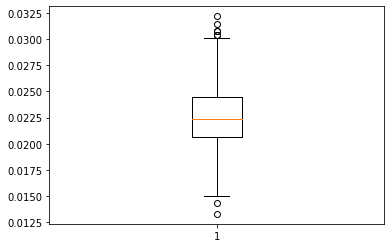

In [76]:
plt.boxplot(ps)

In [58]:
random_distr.shape

(465535,)

In [11]:
data_2bins = pd.read_csv('DataECAP//Data_2bins.txt', sep=' ', names=['p', '1-p'])

In [14]:
data_alloy['p'] = data_2bins['p']

In [148]:
data_2bins = np.loadtxt('DataECAP/Data_2bins.txt')
data_2bins_ref = np.loadtxt('DataECAP/Data_2bins_ref.txt')

In [147]:
nbins = [2, 5, 13, 32, 63]

In [152]:
H = {}
for n in nbins:
    Q = np.loadtxt(f'DataECAP/Data_{n}bins_ref.txt')
    Ps = np.loadtxt(f'DataECAP/Data_{n}bins.txt')
    H[n] = []
    for P in Ps:
        H[n].append(matutils._hellinger(P, Q))

In [158]:
Hs = []
for n in nbins:
    Hs.append(H[n])

In [166]:
Hs = np.column_stack(Hs)

In [11]:
data_5bins = pd.read_csv('DataECAP//Data_5bins.txt', sep=' ', names=['p', '1-p'])

In [167]:
Hs

array([[0.24983756, 0.27512161, 0.31257792, 0.31766146, 0.32064622],
       [0.2016506 , 0.22138694, 0.25009049, 0.25401375, 0.25578845],
       [0.16623657, 0.190621  , 0.21665629, 0.22016525, 0.22121365],
       ...,
       [0.02505357, 0.02956735, 0.03424023, 0.03546624, 0.035631  ],
       [0.02474345, 0.02912261, 0.0335995 , 0.03504958, 0.03527067],
       [0.02423802, 0.02861731, 0.03331667, 0.03473794, 0.03491962]])

In [168]:
data_alloy['H_2bins'] = Hs[:, 0]
data_alloy['H_5bins'] = Hs[:, 1]
data_alloy['H_13bins'] = Hs[:, 2]
data_alloy['H_32bins'] = Hs[:, 3]
data_alloy['H_63bins'] = Hs[:, 4]

In [169]:
data_alloy

,id,filename,alloy,pass,level,p,N_disangles,H_2bins,H_5bins,H_13bins,H_32bins,H_63bins
0,Cu_01Cr_01Zr_pass1_1,DataECAP/Cu_01Cr_01Zr/pass1/disangles1.txt,Cu_01Cr_01Zr,1,1,0.23548,2858,0.249838,0.275122,0.312578,0.317661,0.320646
1,Cu_01Cr_01Zr_pass1_2,DataECAP/Cu_01Cr_01Zr/pass1/disangles2.txt,Cu_01Cr_01Zr,1,2,0.17960,6598,0.201651,0.221387,0.250090,0.254014,0.255788
2,Cu_01Cr_01Zr_pass1_3,DataECAP/Cu_01Cr_01Zr/pass1/disangles3.txt,Cu_01Cr_01Zr,1,3,0.14252,11163,0.166237,0.190621,0.216656,0.220165,0.221214
3,Cu_01Cr_01Zr_pass1_4,DataECAP/Cu_01Cr_01Zr/pass1/disangles4.txt,Cu_01Cr_01Zr,1,4,0.13200,15992,0.155497,0.181072,0.200042,0.202618,0.203285
4,Cu_01Cr_01Zr_pass1_5,DataECAP/Cu_01Cr_01Zr/pass1/disangles5.txt,Cu_01Cr_01Zr,1,5,0.11212,20647,0.134122,0.159668,0.178905,0.181700,0.182066
...,...,...,...,...,...,...,...,...,...,...,...,...
218,Cu_Mg_pass8_16,DataECAP/Cu_Mg/pass8/disangles16.txt,Cu_Mg,8,16,0.03398,591422,0.023985,0.028759,0.033238,0.034697,0.034902
219,Cu_Mg_pass8_17,DataECAP/Cu_Mg/pass8/disangles17.txt,Cu_Mg,8,17,0.03417,621442,0.024355,0.028707,0.033127,0.034633,0.034859
220,Cu_Mg_pass8_18,DataECAP/Cu_Mg/pass8/disangles18.txt,Cu_Mg,8,18,0.03453,649145,0.025054,0.029567,0.034240,0.035466,0.035631
221,Cu_Mg_pass8_19,DataECAP/Cu_Mg/pass8/disangles19.txt,Cu_Mg,8,19,0.03437,675629,0.024743,0.029123,0.033600,0.035050,0.035271


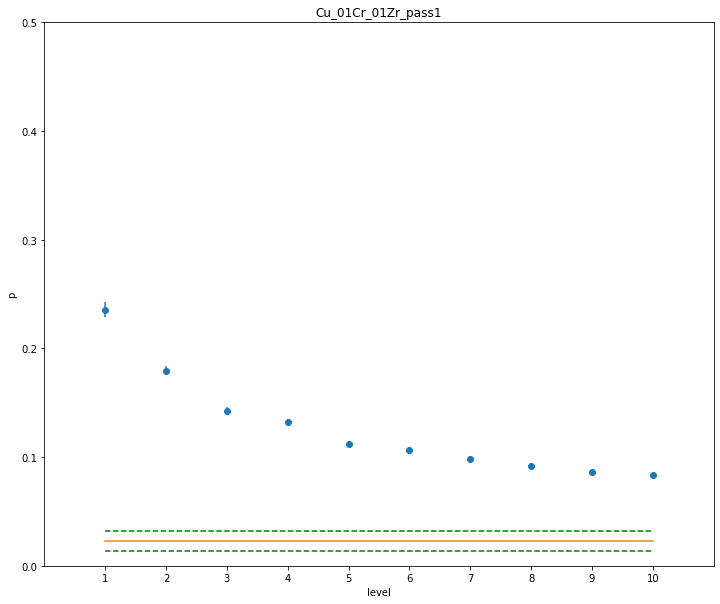

In [126]:
plt.figure(figsize=(12,10))
alloy = 'Cu_01Cr_01Zr'
pass_ = 1
x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'p'].tolist()
Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
plt.scatter(x[:10], y[:10], labels=)
plt.errorbar(x[:10], y[:10], yerr=[2.56*stds[N_disangles] for N_disangles in Ns[:10]], linestyle='')
plt.plot(x[:10], [0.02277]*10)
plt.title(alloy + f'_pass{pass_}, ' + str())
plt.xlim([0, 11])
plt.xticks([*range(1,11)])
plt.xlabel('level')
plt.ylim([0, 0.5])
plt.ylabel('p')
plt.show()

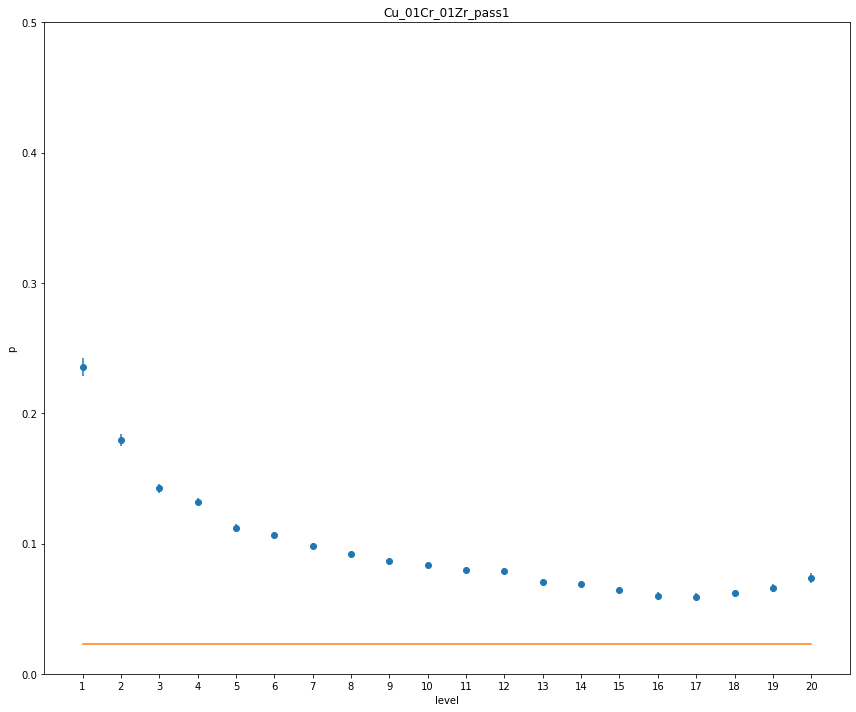

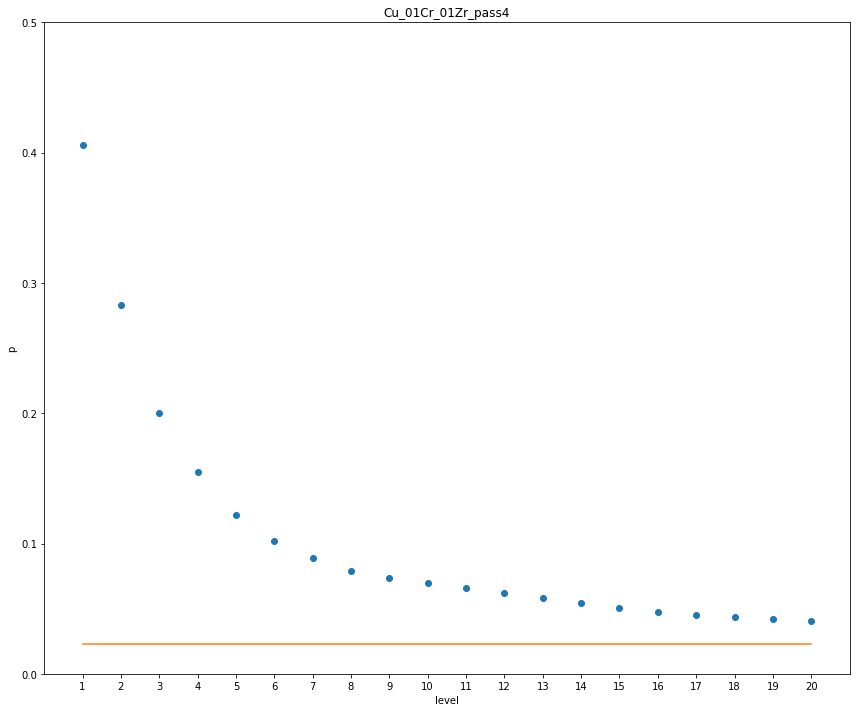

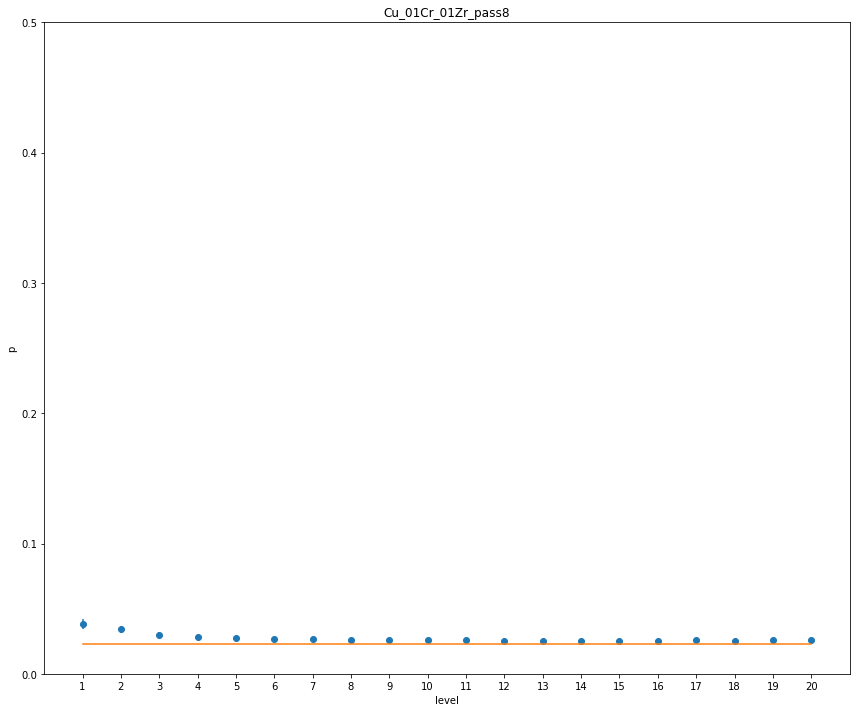

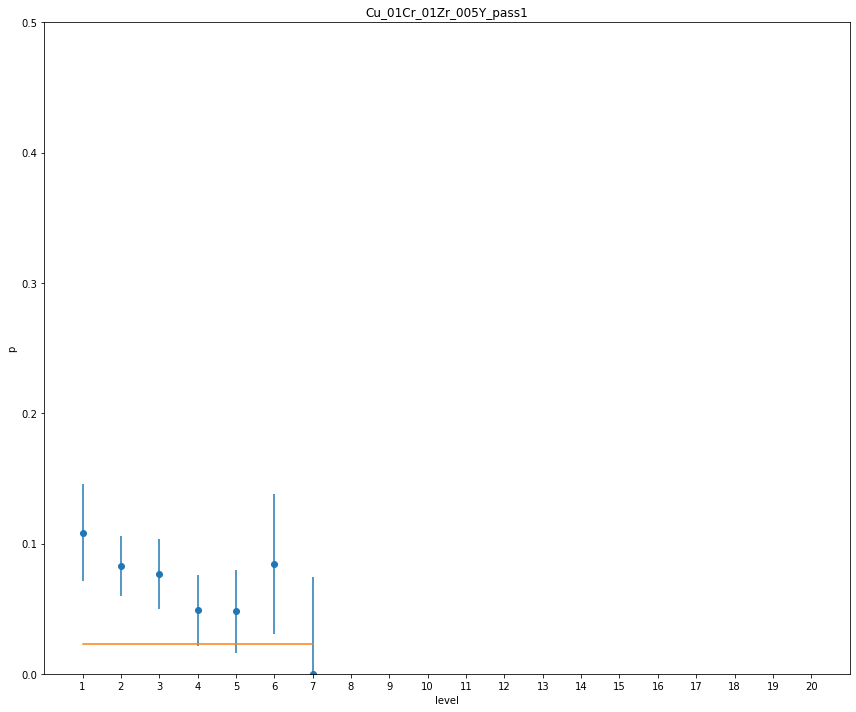

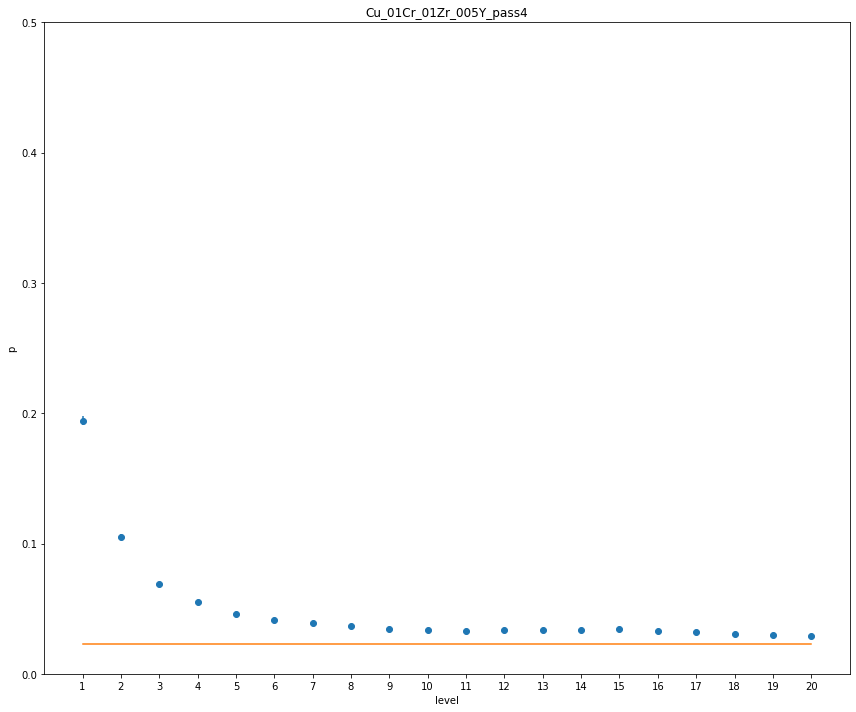

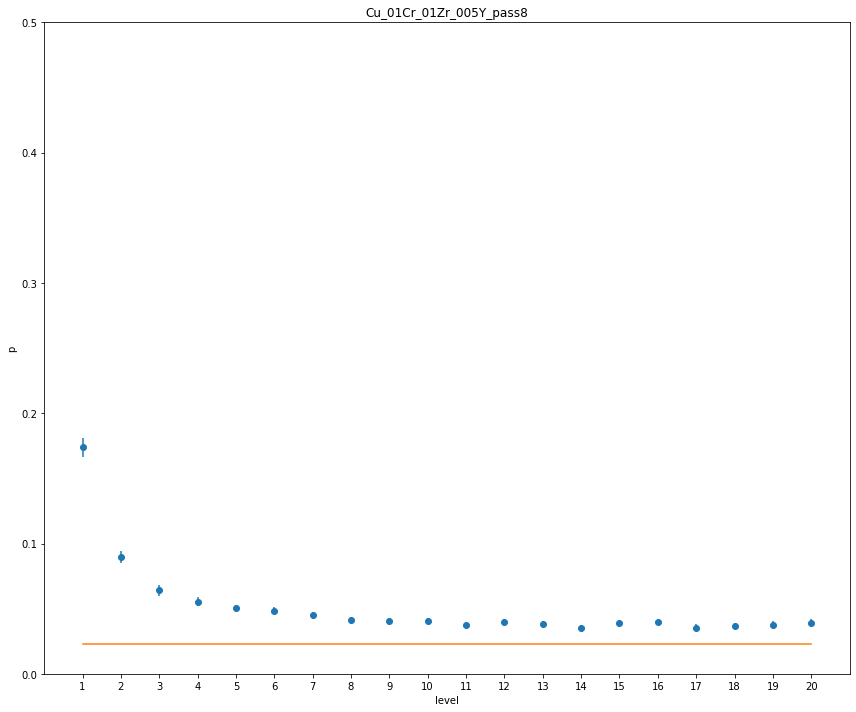

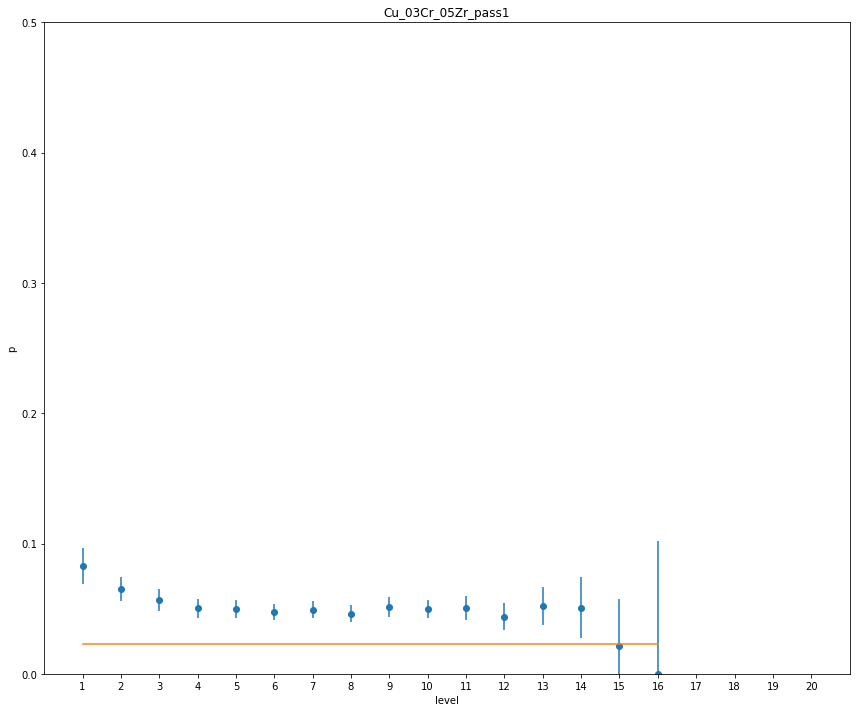

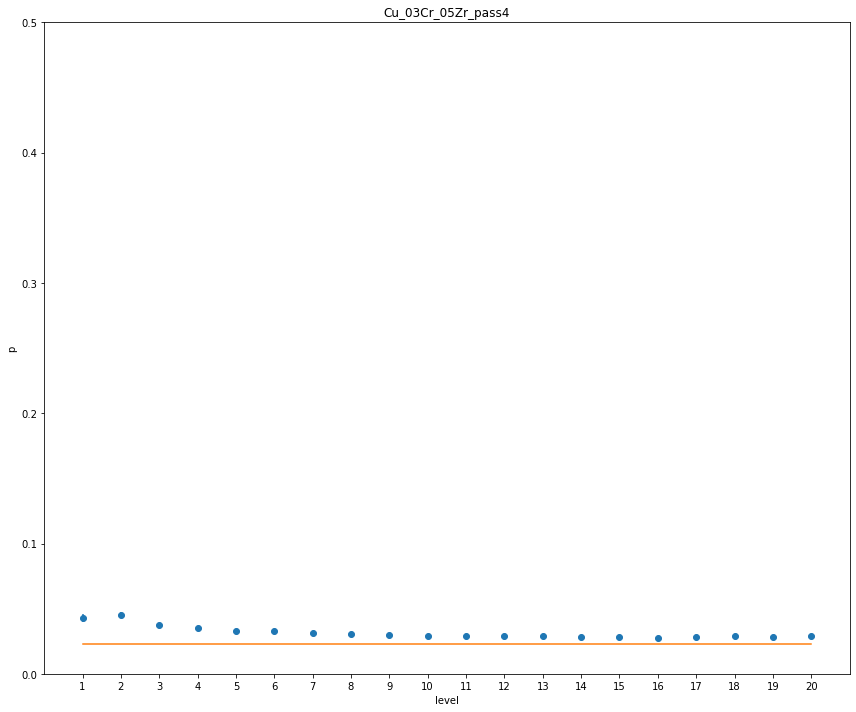

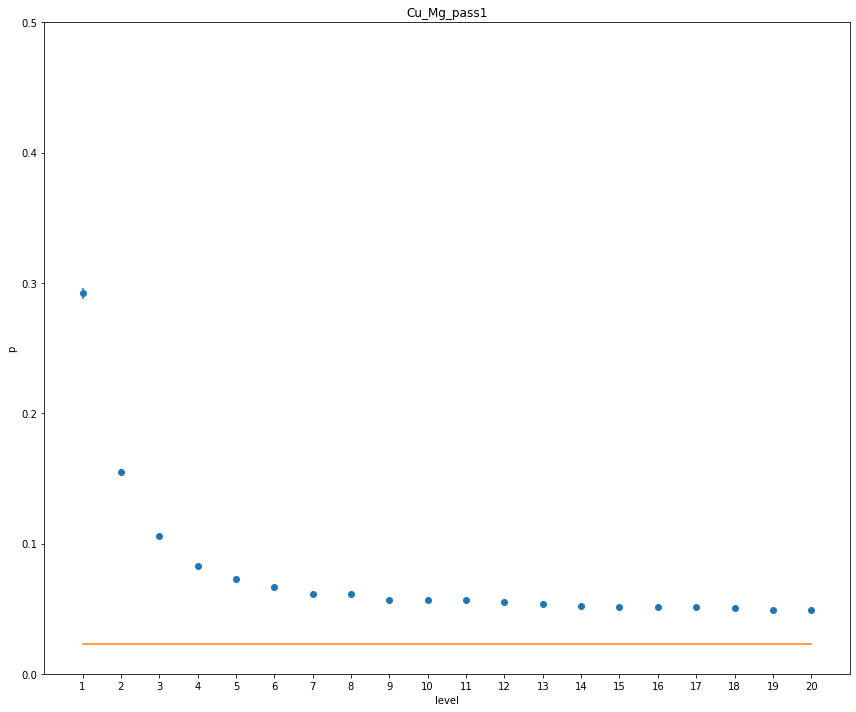

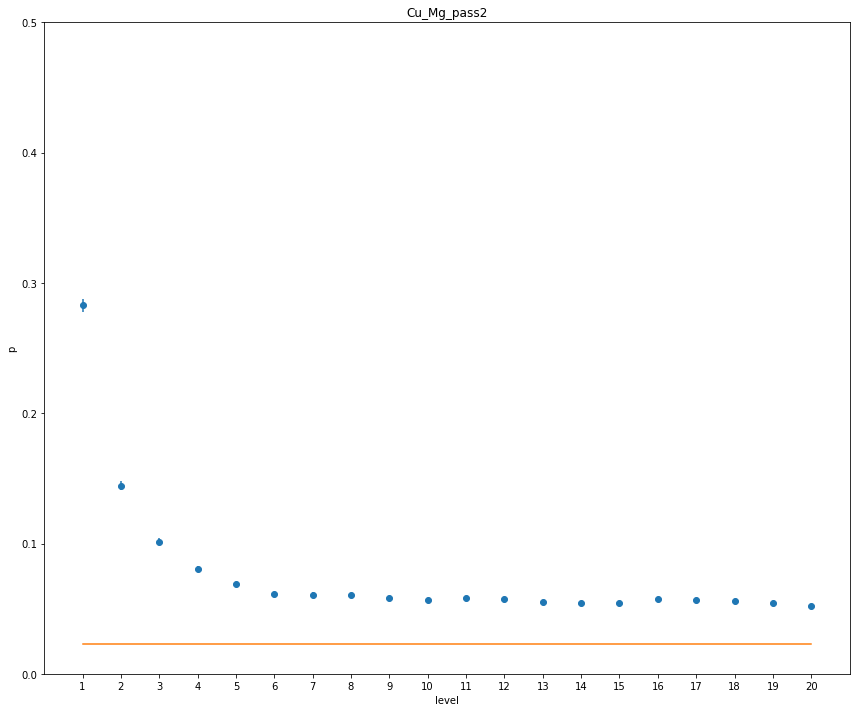

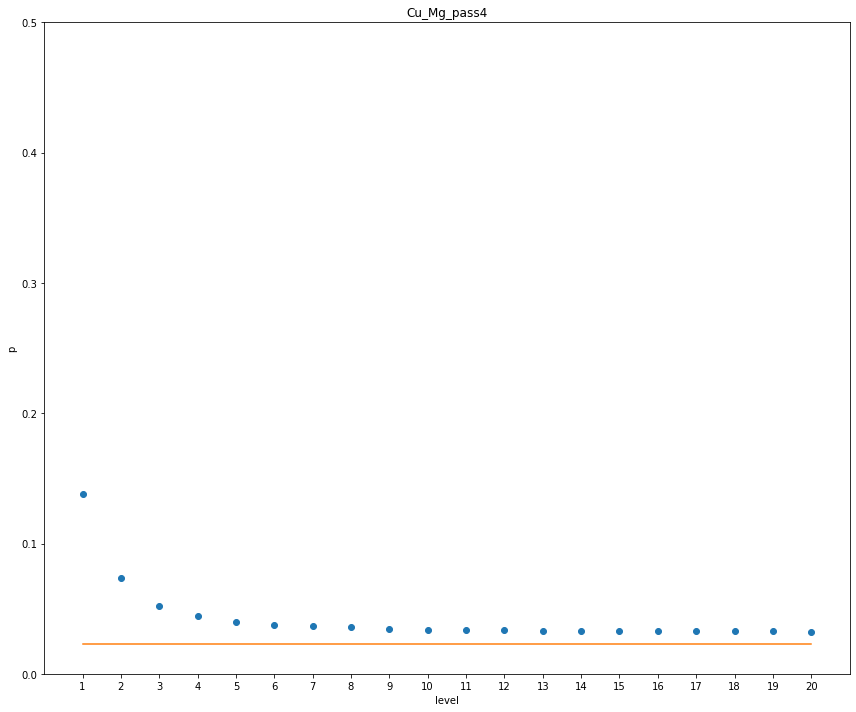

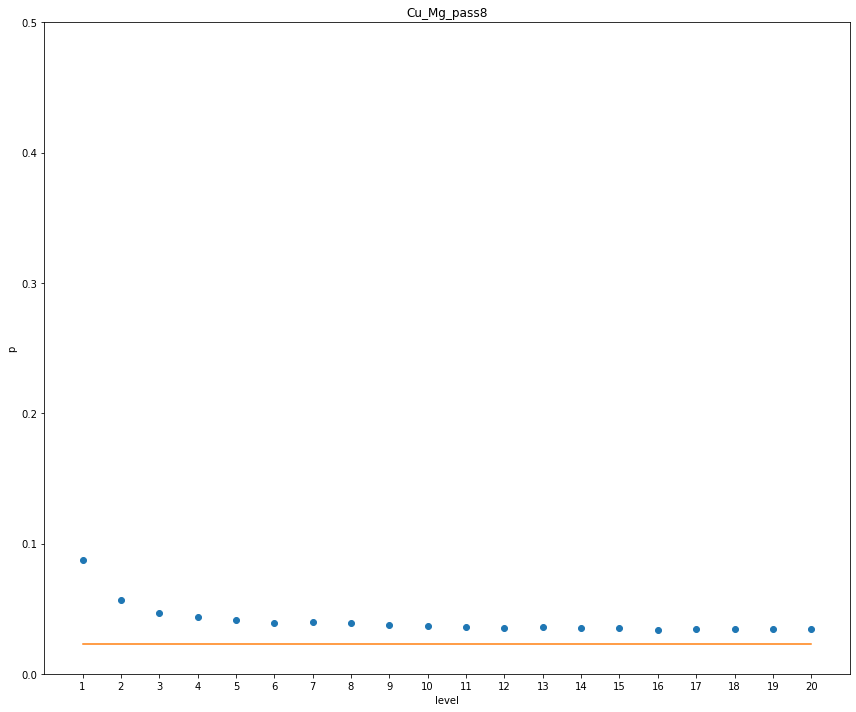

In [137]:
for alloy in data_alloy['alloy'].unique().tolist():
    for pass_ in [1, 2, 4, 8]:
        #plt.figure(figsize=(12,10))
        x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
        y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'p'].tolist()
        Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
        if x:
            fig, ax = plt.subplots(figsize=(12,10), tight_layout=True)
            ax.scatter(x, y)
            ax.errorbar(x, y, yerr=[2.56*stds[N_disangles] if N_disangles < 100000 else 0.0005 for N_disangles in Ns ], linestyle='')
            ax.plot(x, [0.02277]*len(x))
            ax.set_title(alloy + f'_pass{pass_}')
            ax.set_xlim([0, 21])
            ax.set_xticks([*range(1,21)])
            ax.set_xlabel('level')
            ax.set_ylim([0, 0.5])
            ax.set_ylabel('p')
            plt.savefig('p_' + alloy + f'_pass{pass_}.jpg')
            plt.show()

In [200]:
all_stds[100000] = {}

In [201]:
all_stds[100000]['p'] = 0.0005

In [213]:
all_stds[100000]['H_2bins'] = 0.0006
all_stds[100000]['H_5bins'] = 0.001
all_stds[100000]['H_13bins'] = 0.001
all_stds[100000]['H_32bins'] = 0.001
all_stds[100000]['H_63bins'] = 0.001

In [212]:
sorted(all_stds.items(), reverse=True)

[(100000, {'p': 0.0005}),
 (99614,
  {'p': 0.0005187487079559776,
   'H_2bins': 0.0006543092954099779,
   'H_5bins': 0.0008137524414478617,
   'H_13bins': 0.001079931847853367,
   'H_32bins': 0.0010111679024486881,
   'H_63bins': 0.0009127730838180895}),
 (98583,
  {'p': 0.0004924444953052003,
   'H_2bins': 0.0006739064453633001,
   'H_5bins': 0.0009308815914958591,
   'H_13bins': 0.0008254859662228659,
   'H_32bins': 0.001032638447235501,
   'H_63bins': 0.0009352956827292912}),
 (96822,
  {'p': 0.0005010596129624338,
   'H_2bins': 0.0007493775041976901,
   'H_5bins': 0.0007940886575204002,
   'H_13bins': 0.0009921225373105524,
   'H_32bins': 0.0010146202469984939,
   'H_63bins': 0.0008181130564201736}),
 (94680,
  {'p': 0.0004911956419759427,
   'H_2bins': 0.0006732239865277776,
   'H_5bins': 0.0009243175163479002,
   'H_13bins': 0.0009058769115699017,
   'H_32bins': 0.0010327307343109904,
   'H_63bins': 0.0008316914094780038}),
 (91899,
  {'p': 0.0004781135955801903,
   'H_2bins': 0.

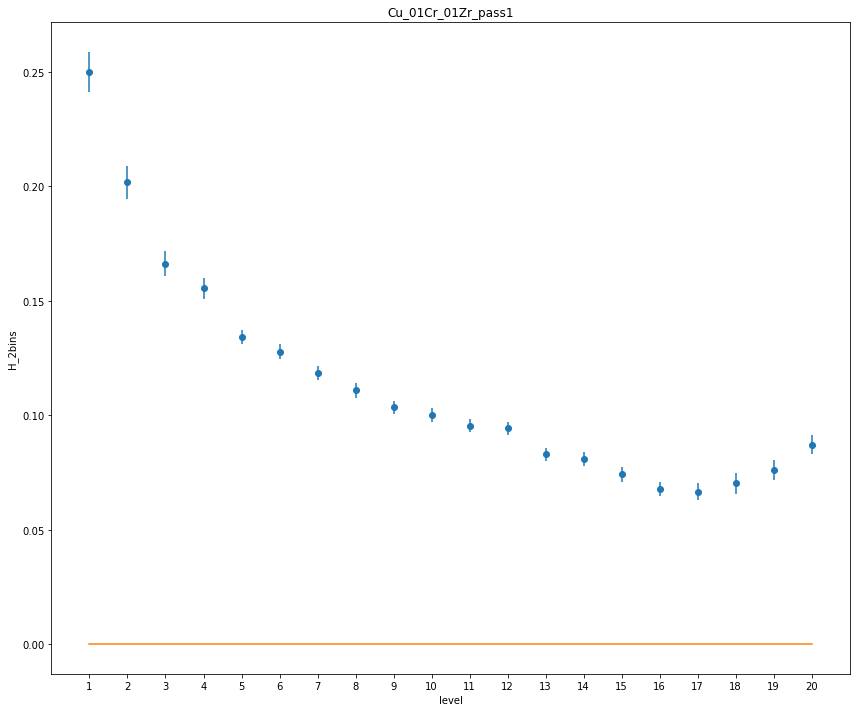

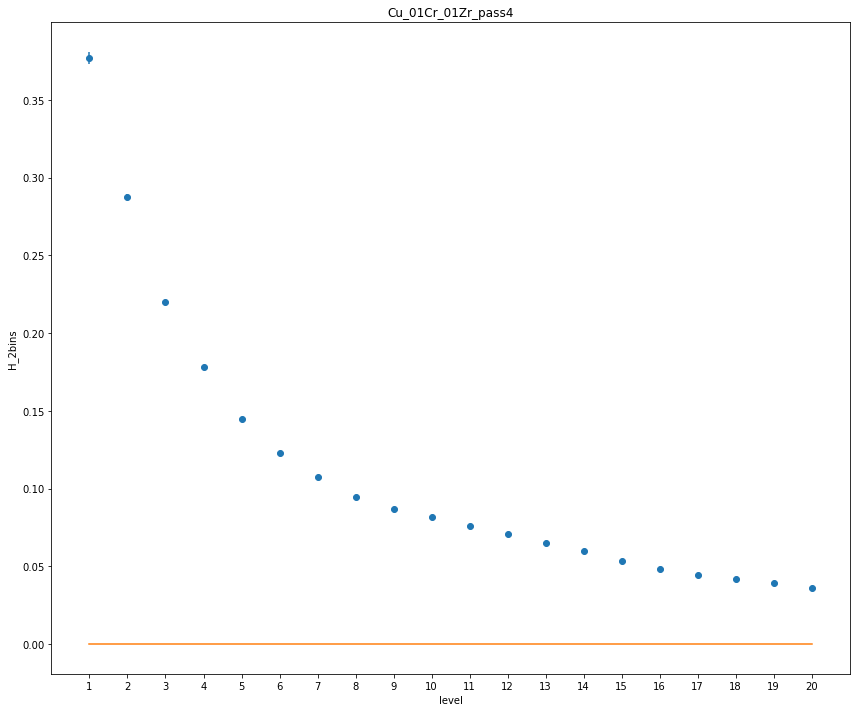

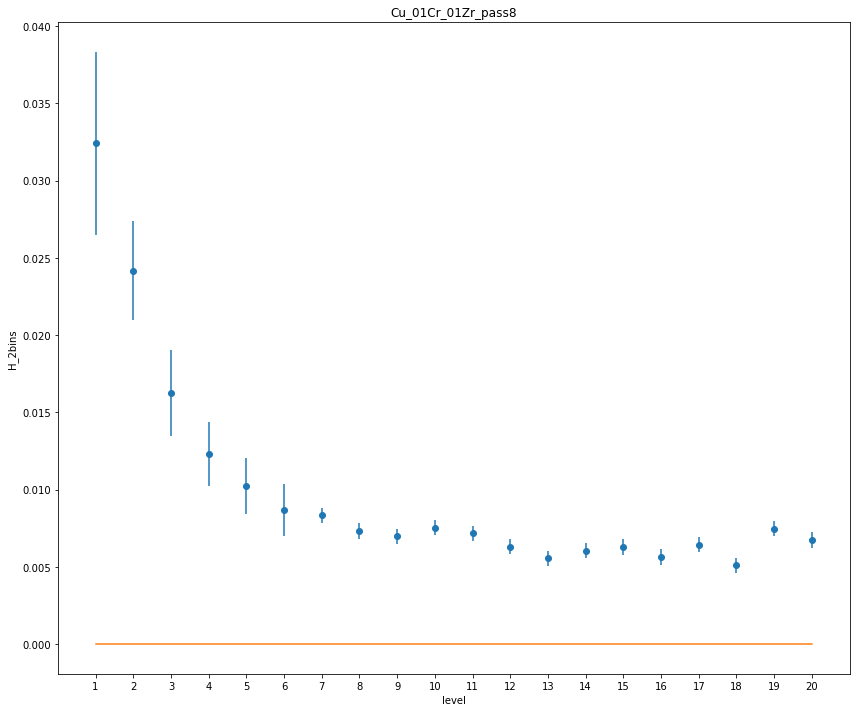

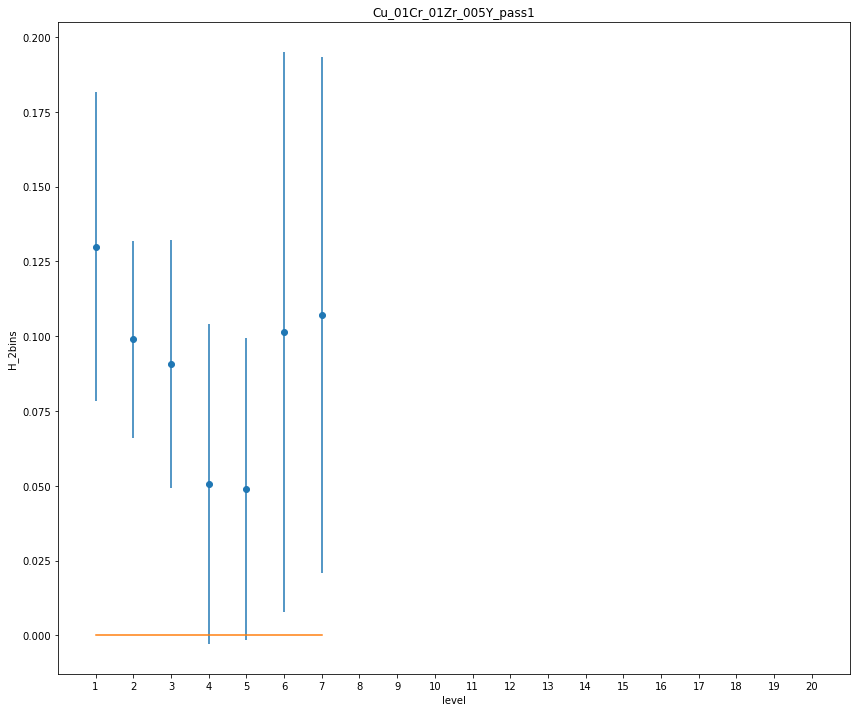

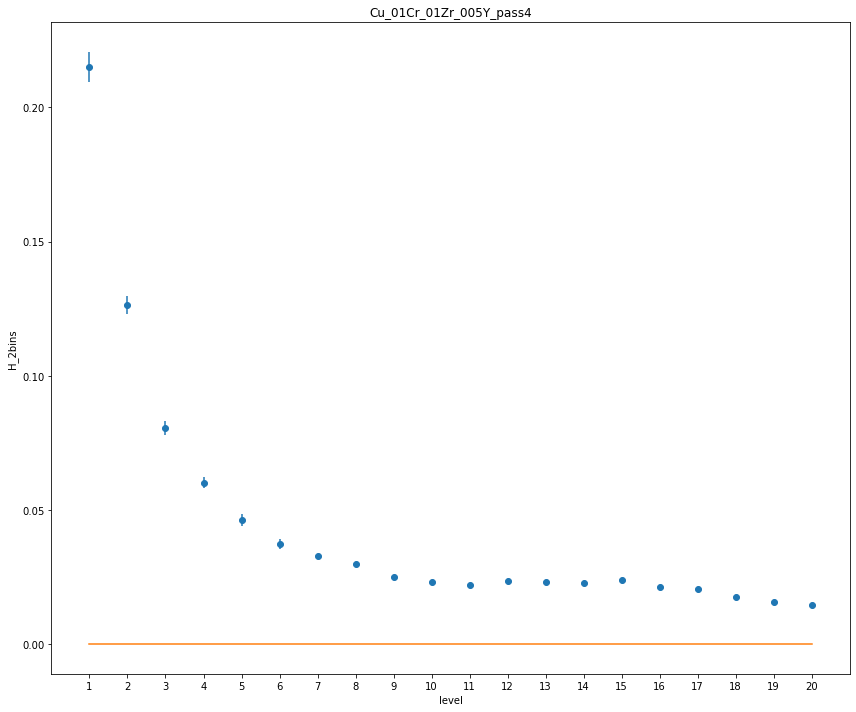

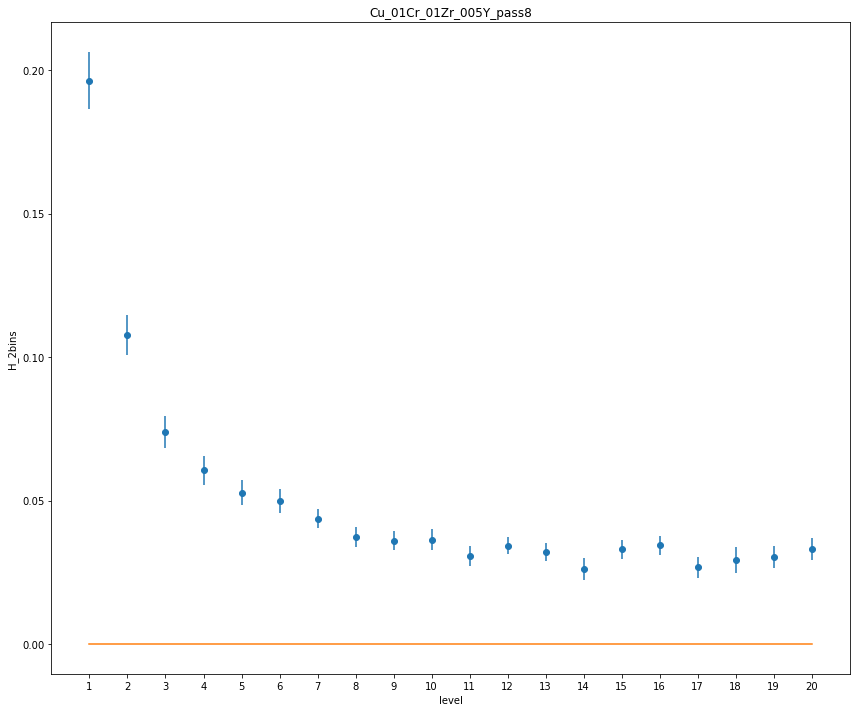

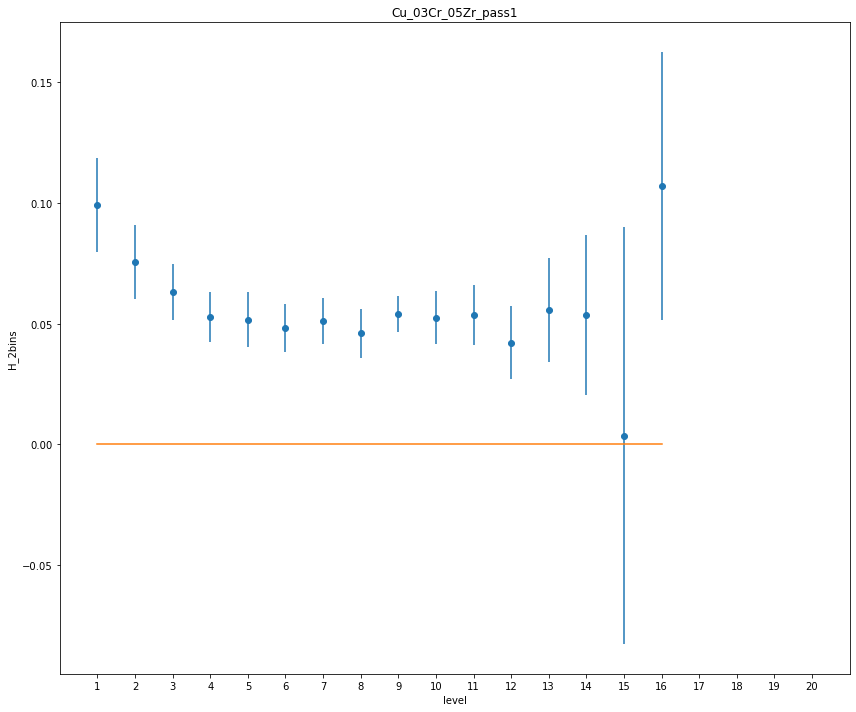

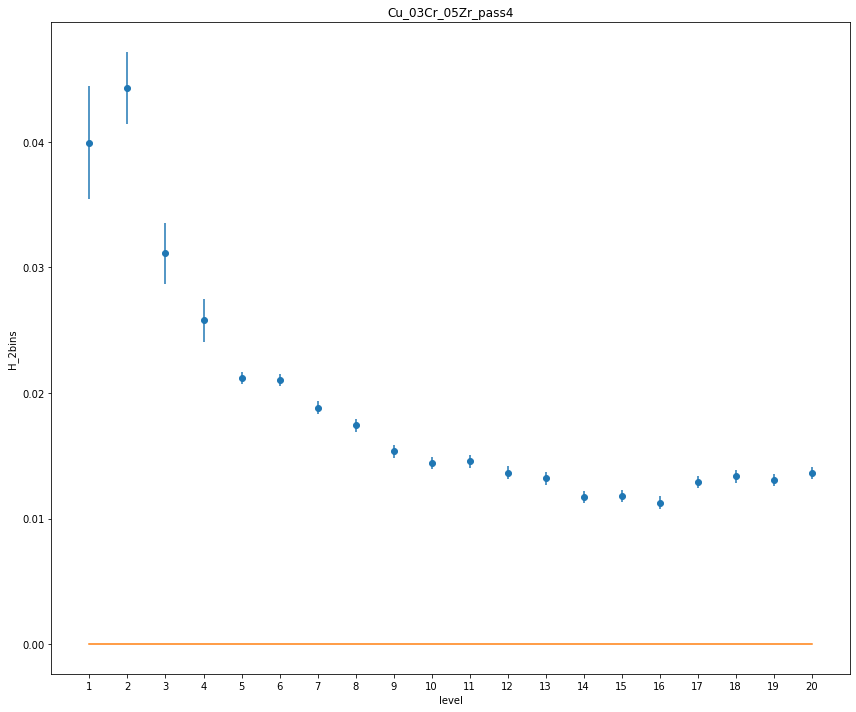

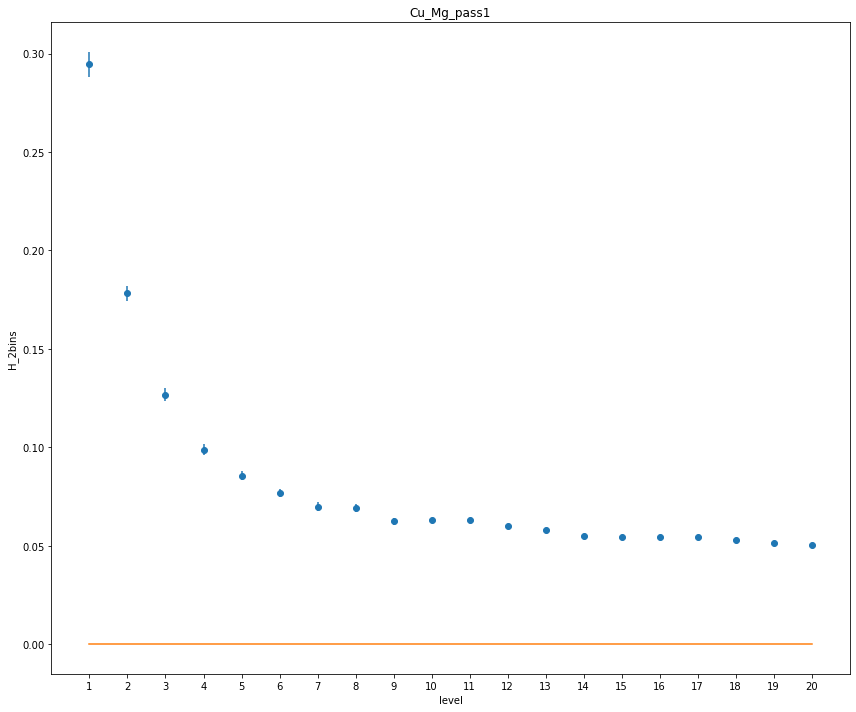

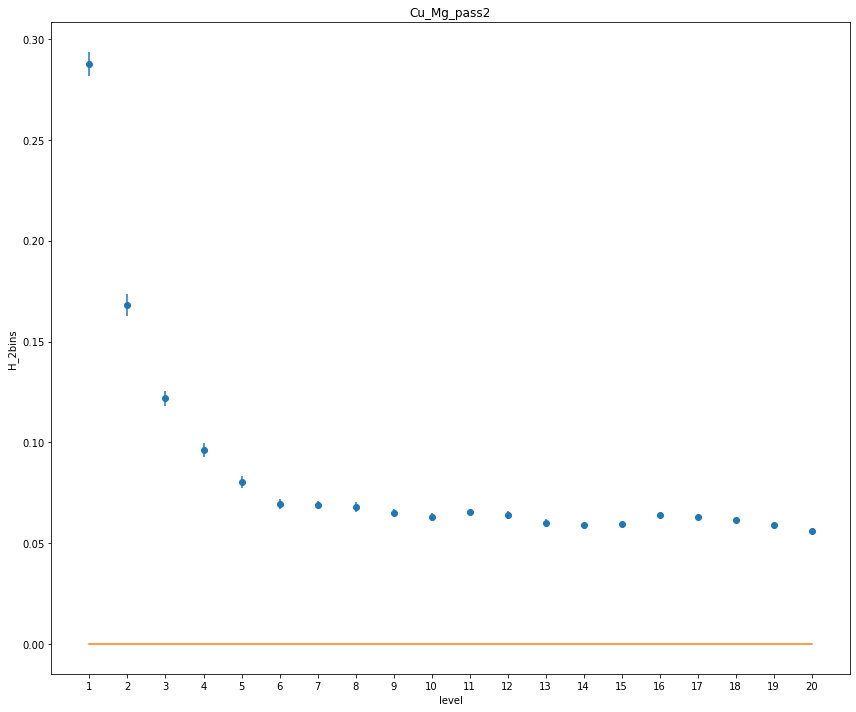

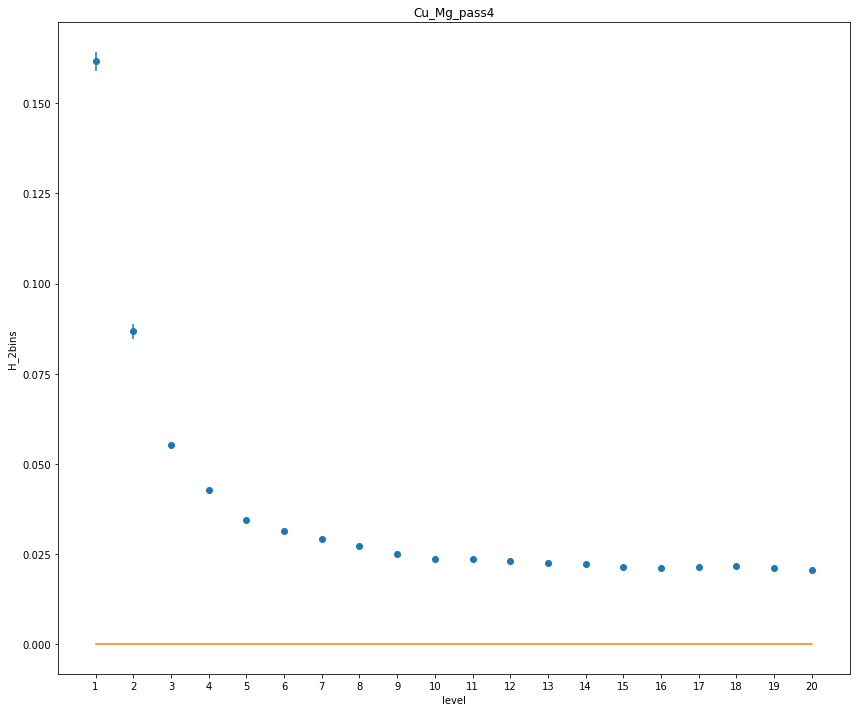

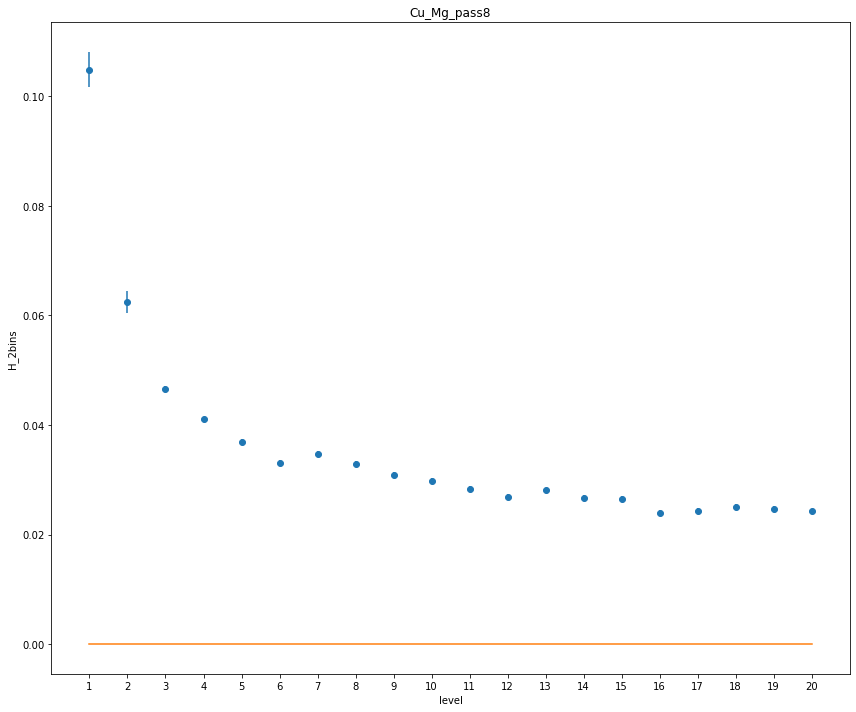

In [184]:
feature = 'H_2bins'

for alloy in data_alloy['alloy'].unique().tolist():
    for pass_ in [1, 2, 4, 8]:
        #plt.figure(figsize=(12,10))
        x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
        y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), feature].tolist()
        Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
        if x:
            fig, ax = plt.subplots(figsize=(12,10), tight_layout=True)
            ax.scatter(x, y)
            y_random = [all_means[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns]
            ax.errorbar(x, y_random, yerr=[2.56*all_stds[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns], color='C1', linestyle='')
            ax.plot(x, y_random, color='C1')
            ax.set_title(alloy + f'_pass{pass_}')
            ax.set_xlim([0, 21])
            ax.set_xticks([*range(1,21)])
            ax.set_xlabel('level')
            #ax.set_ylim([0, 0.5])
            ax.set_ylabel(feature)
            #plt.savefig(feature + '_' + alloy + f'_pass{pass_}.jpg')
            plt.show()

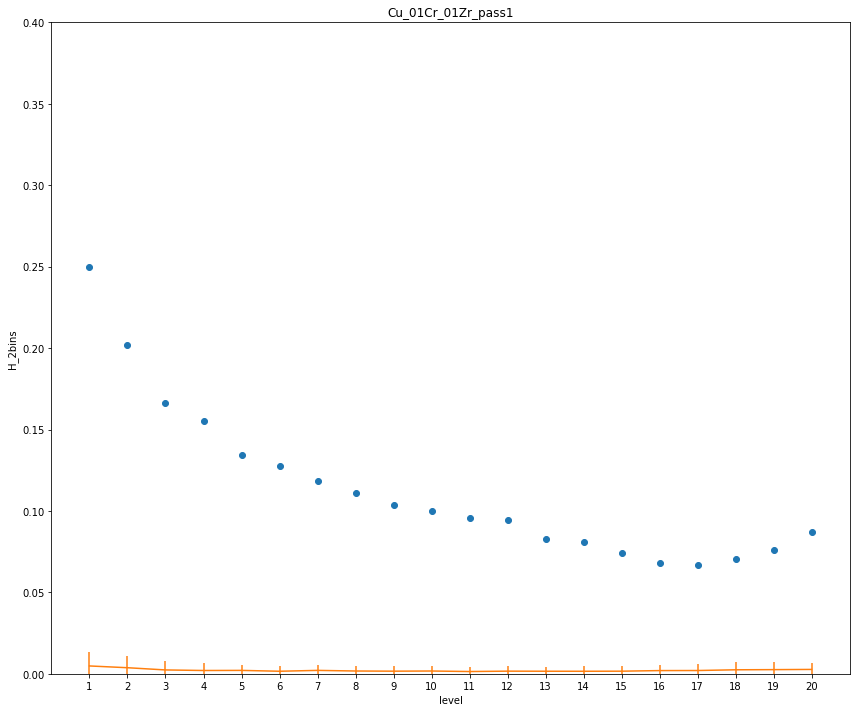

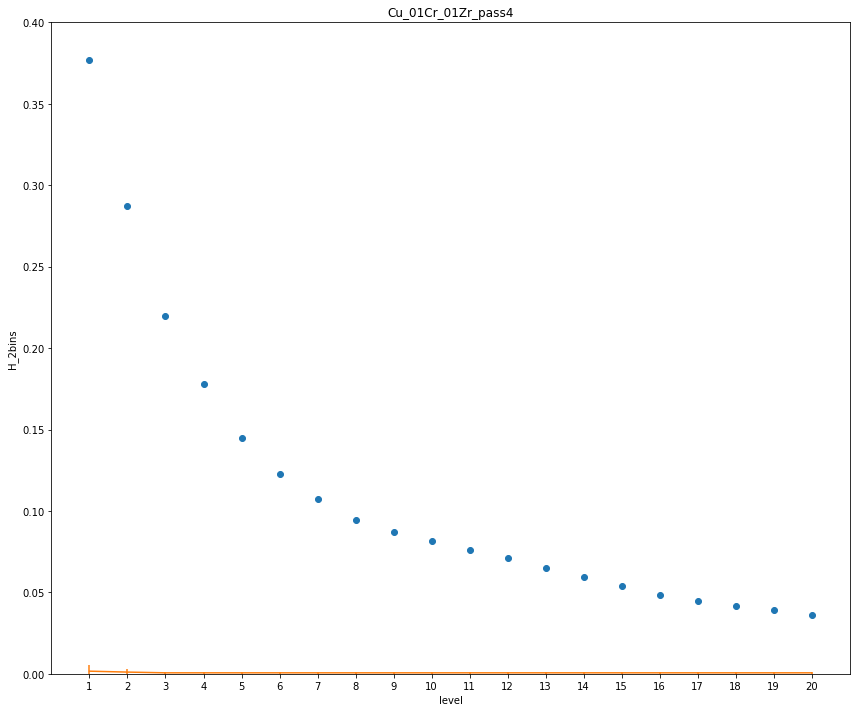

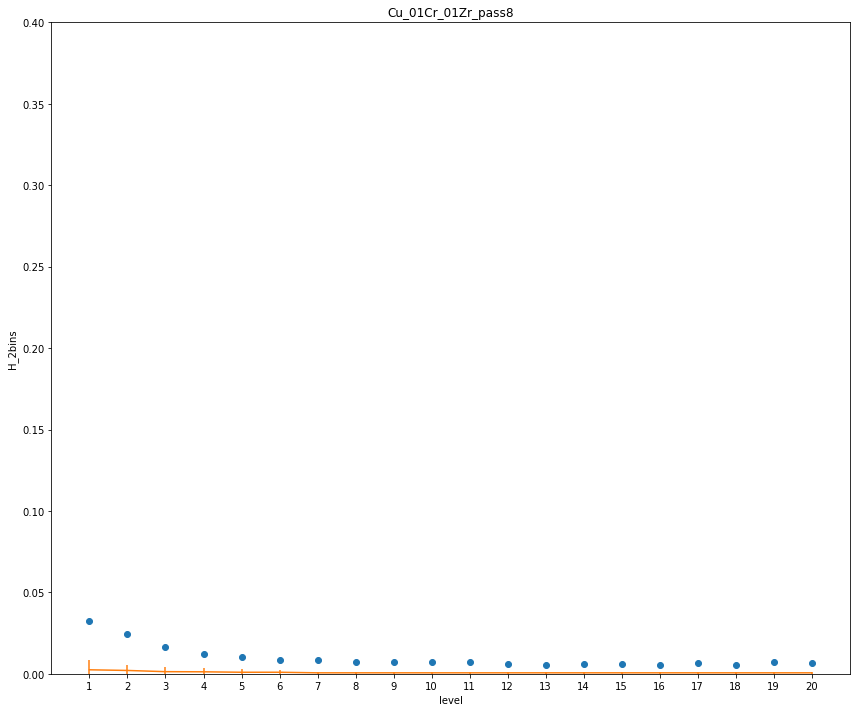

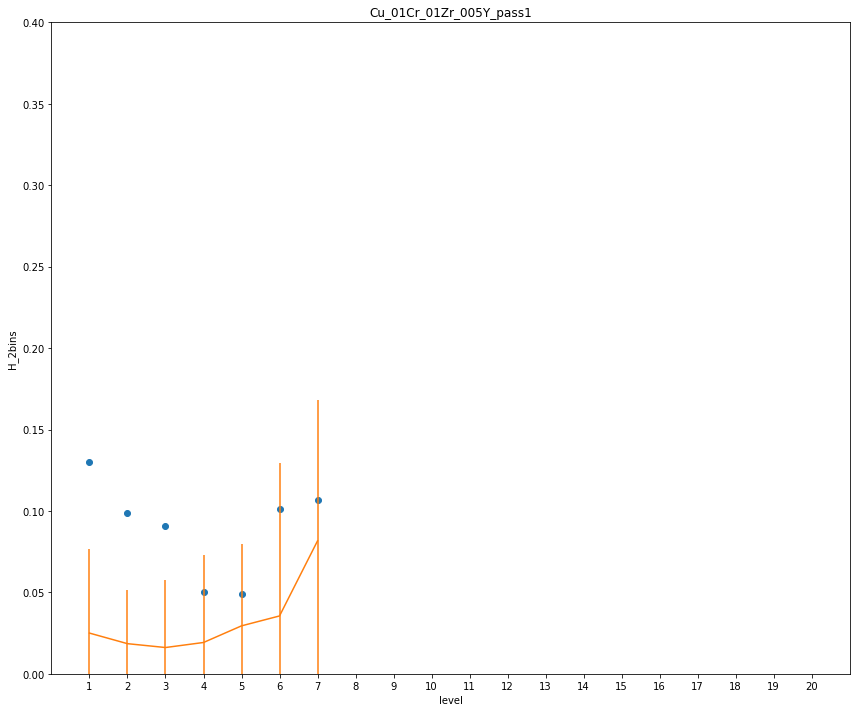

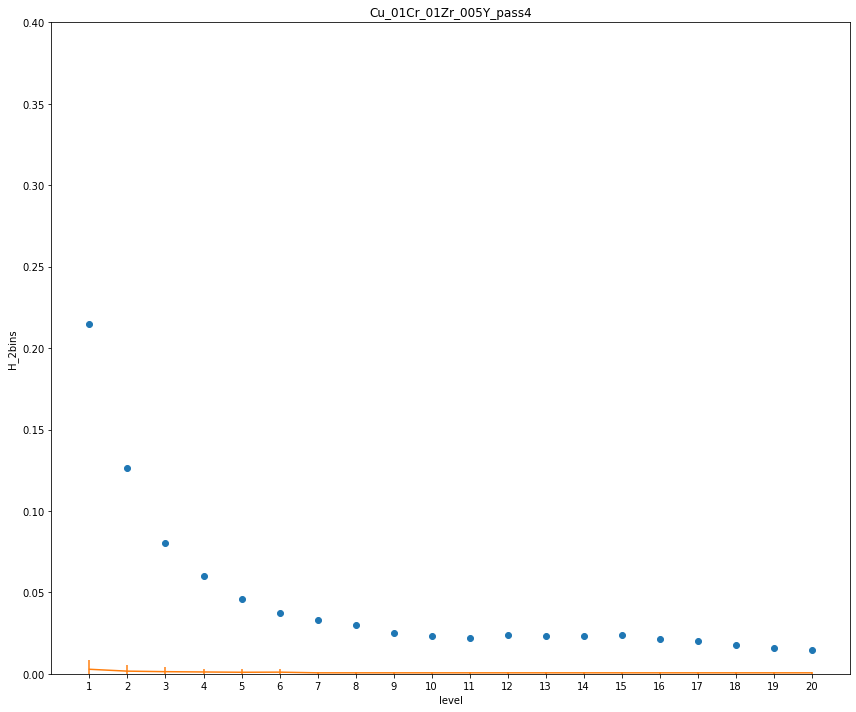

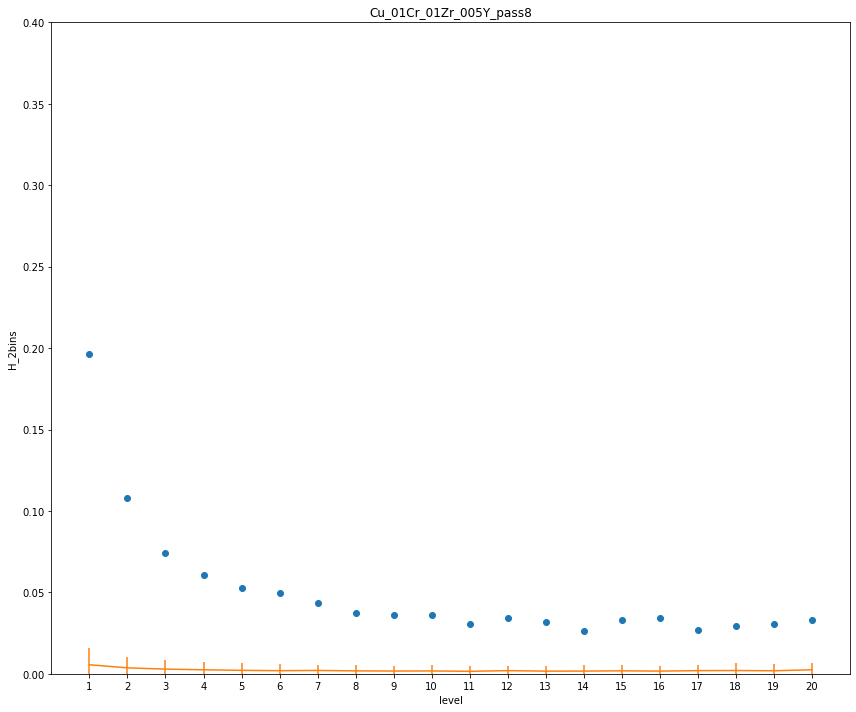

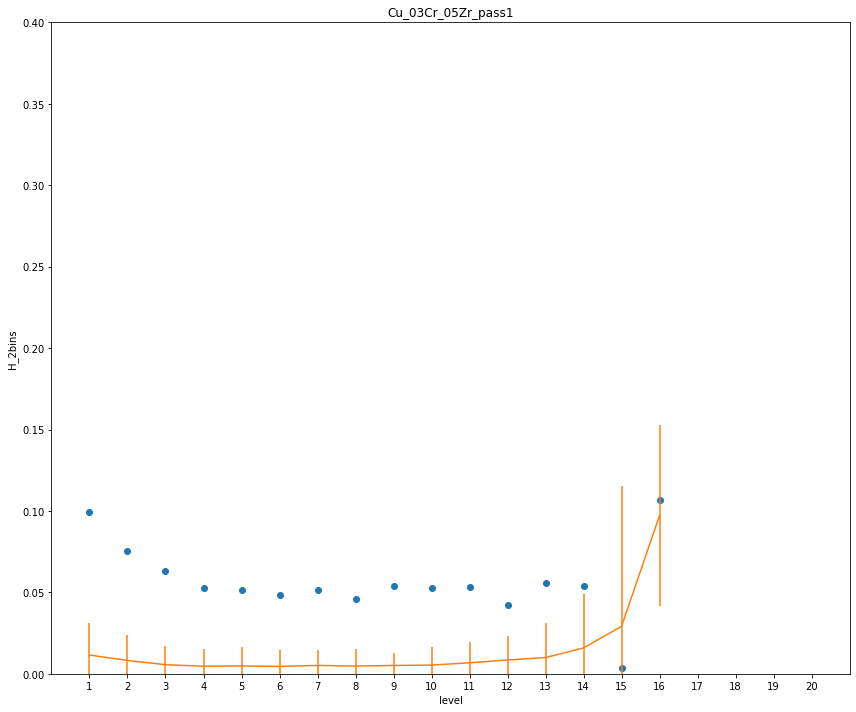

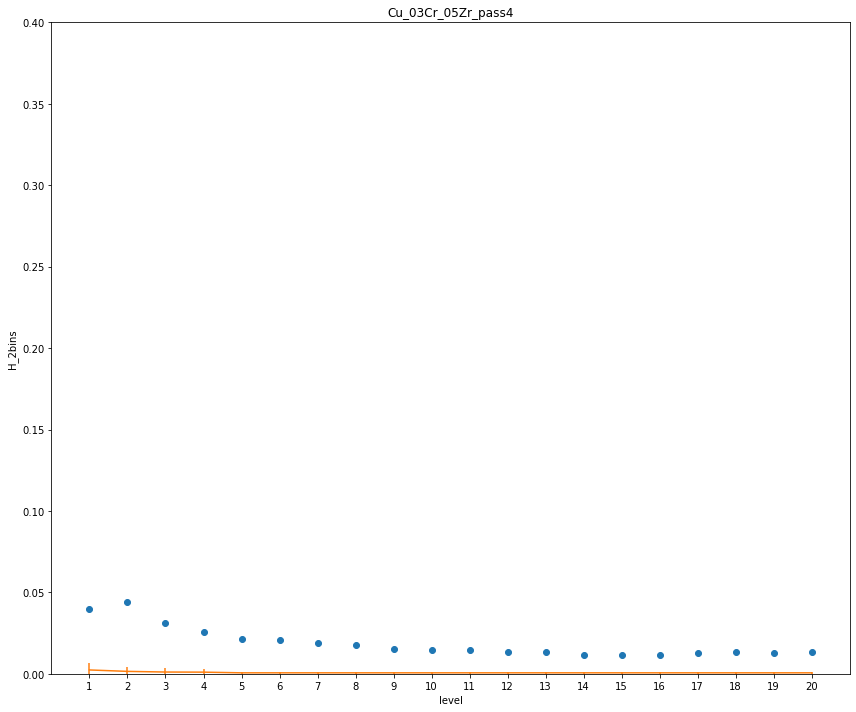

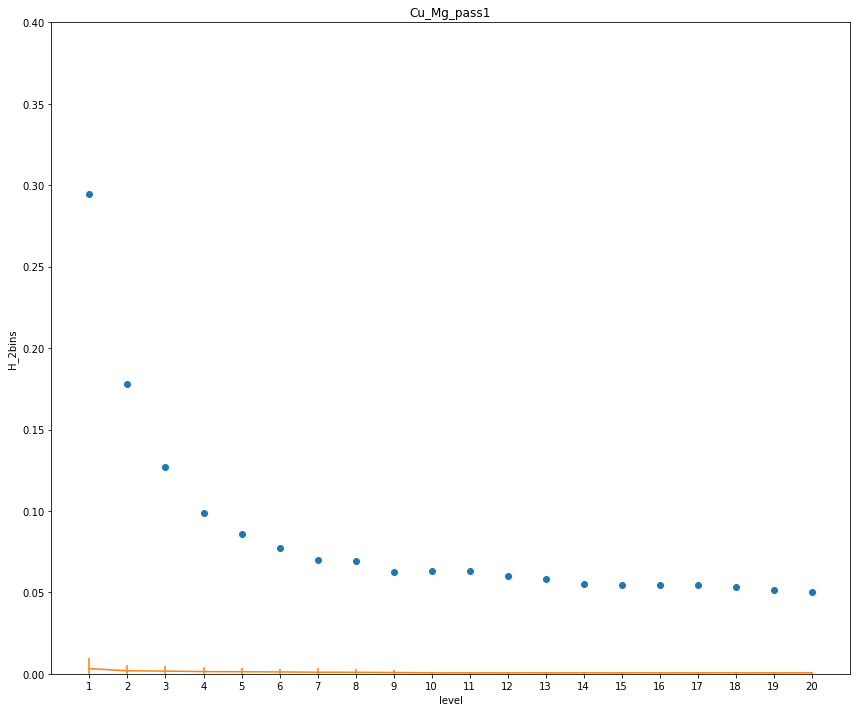

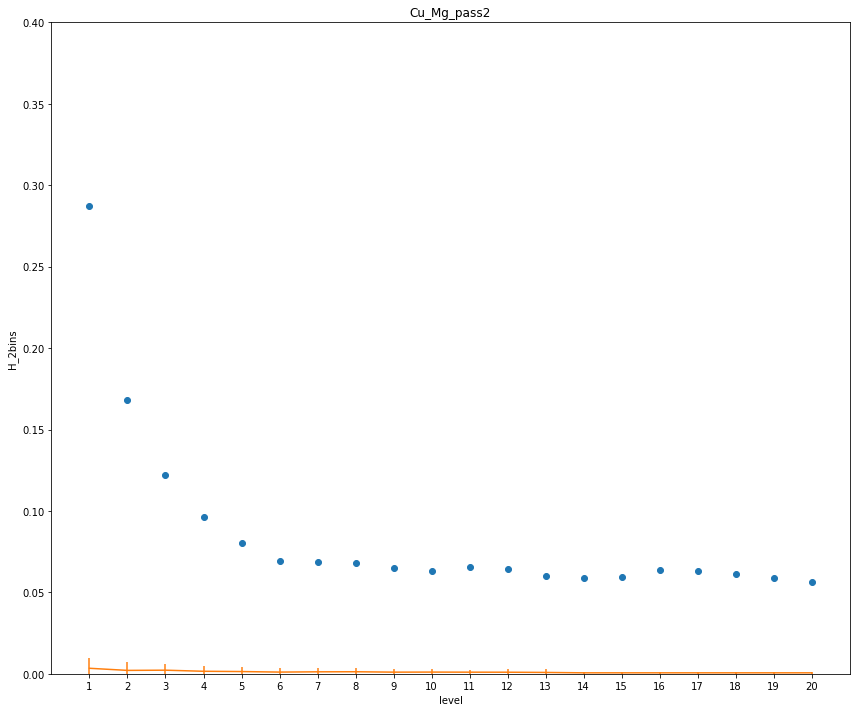

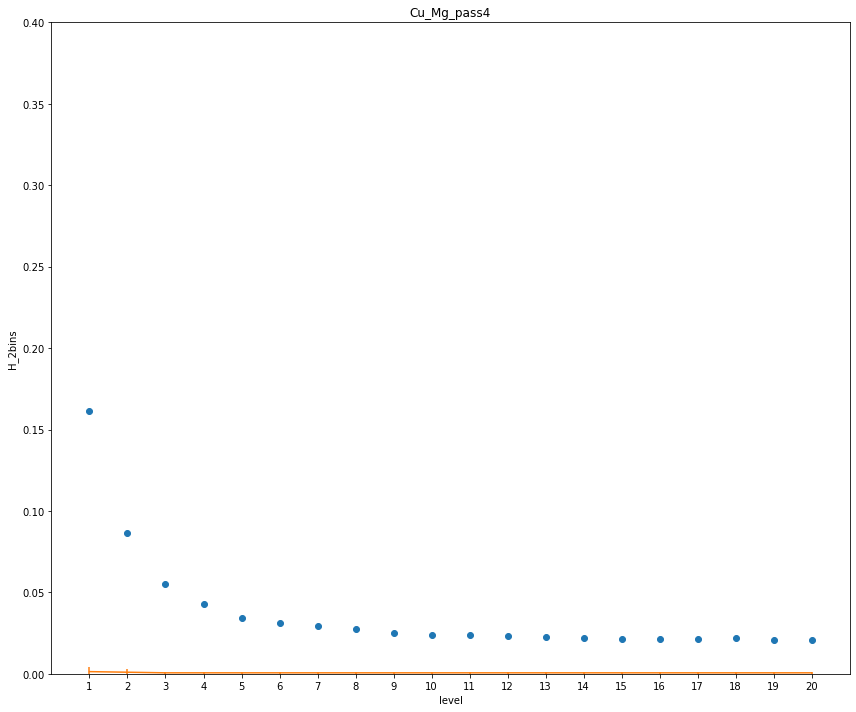

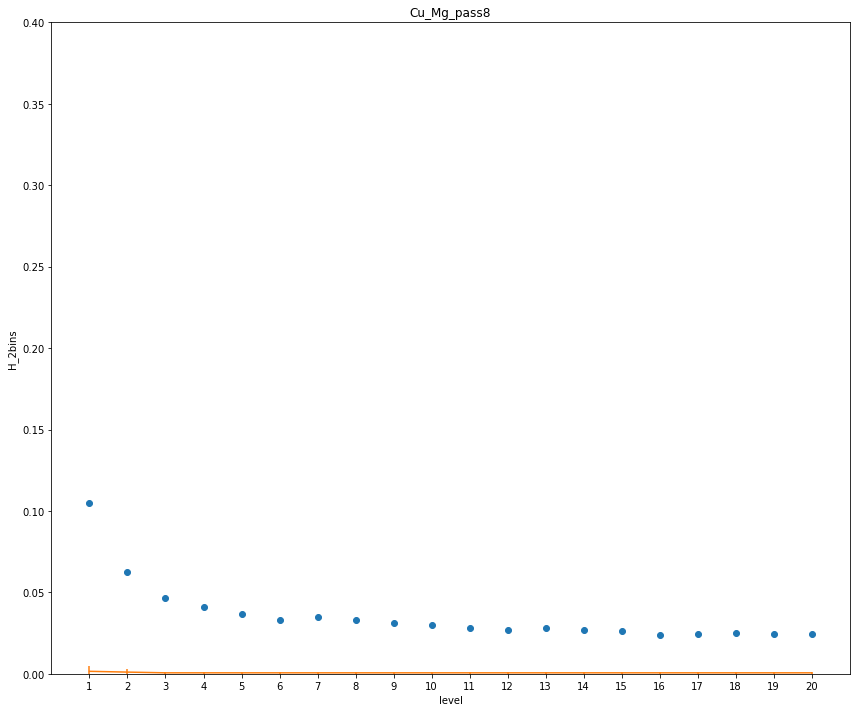

In [216]:
feature = 'H_2bins'

for alloy in data_alloy['alloy'].unique().tolist():
    for pass_ in [1, 2, 4, 8]:
        #plt.figure(figsize=(12,10))
        x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
        y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), feature].tolist()
        Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
        if x:
            fig, ax = plt.subplots(figsize=(12,10), tight_layout=True)
            ax.scatter(x, y)
            y_random = [all_means[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns]
            ax.errorbar(x, y_random, yerr=[2.56*all_stds[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns], color='C1', linestyle='')
            ax.plot(x, y_random, color='C1')
            ax.set_title(alloy + f'_pass{pass_}')
            ax.set_xlim([0, 21])
            ax.set_xticks([*range(1,21)])
            ax.set_xlabel('level')
            ax.set_ylim([0, 0.4])
            ax.set_ylabel(feature)
            plt.savefig(feature + '_' + alloy + f'_pass{pass_}.jpg')
            plt.show()

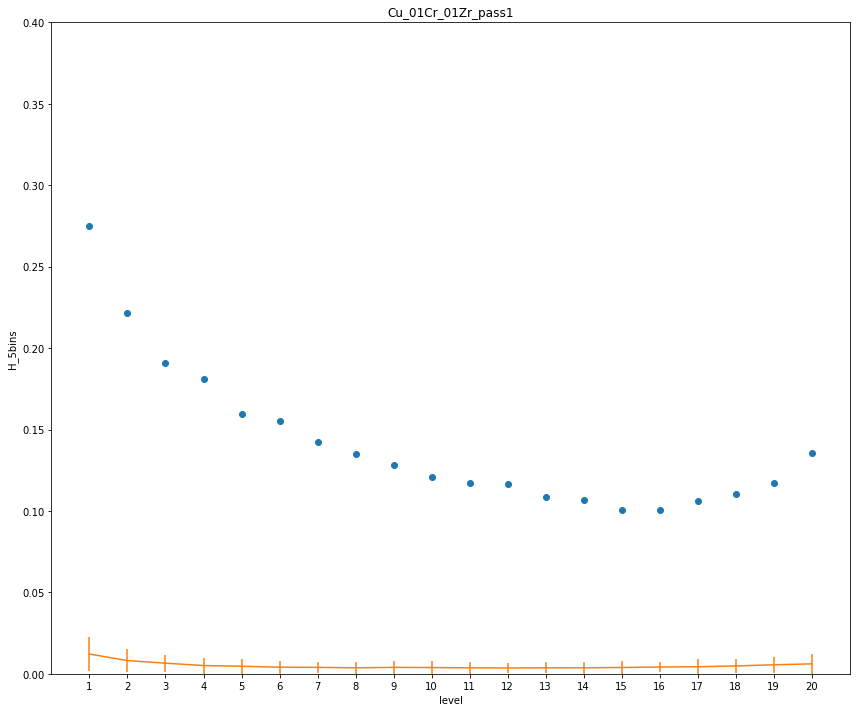

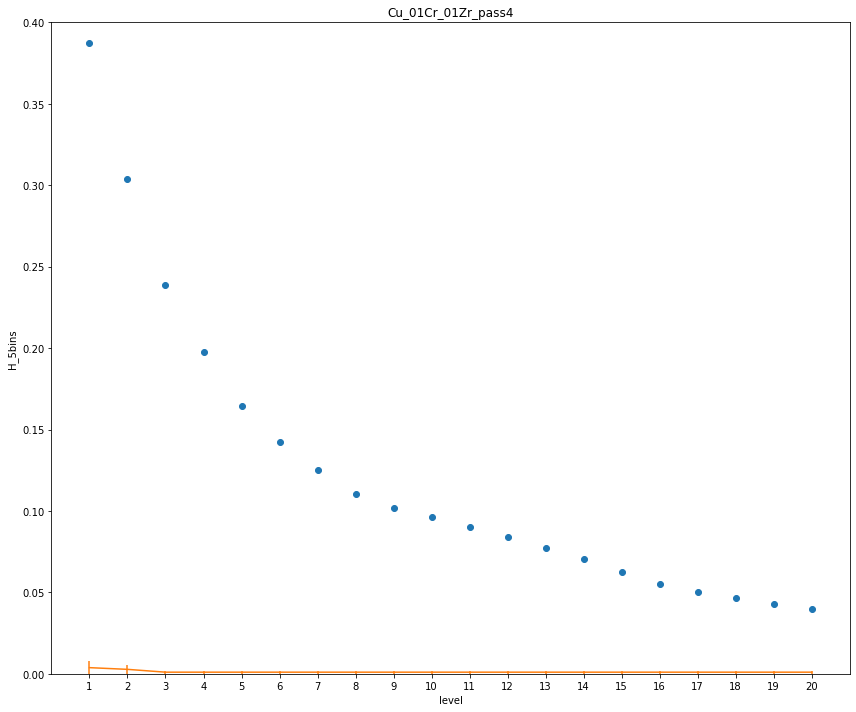

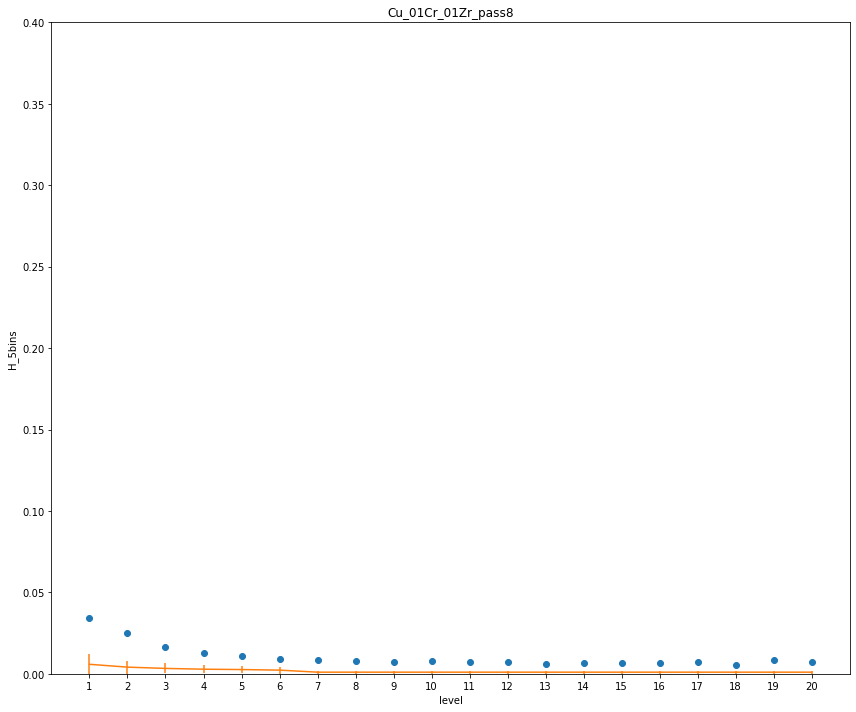

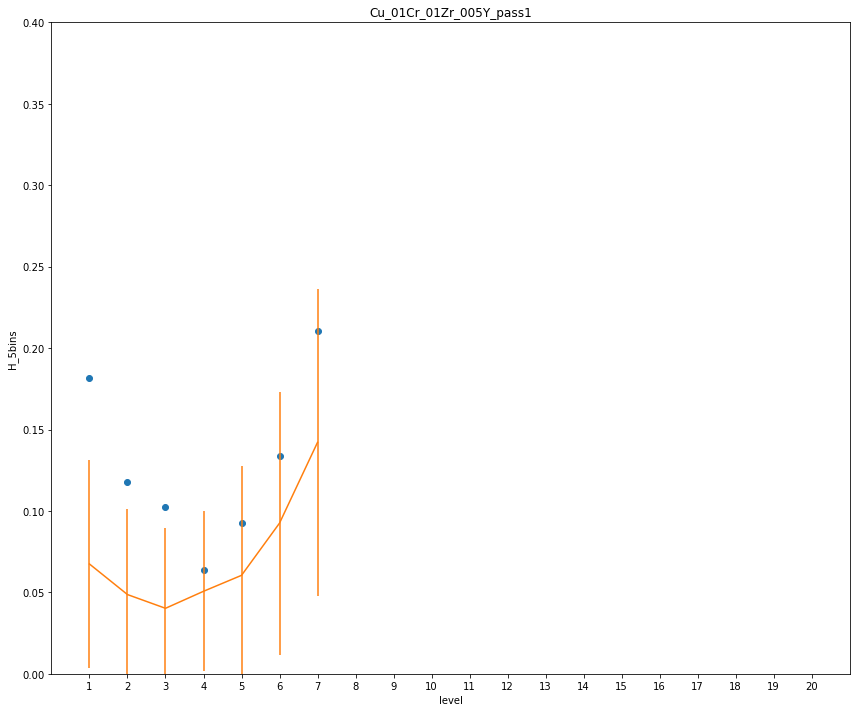

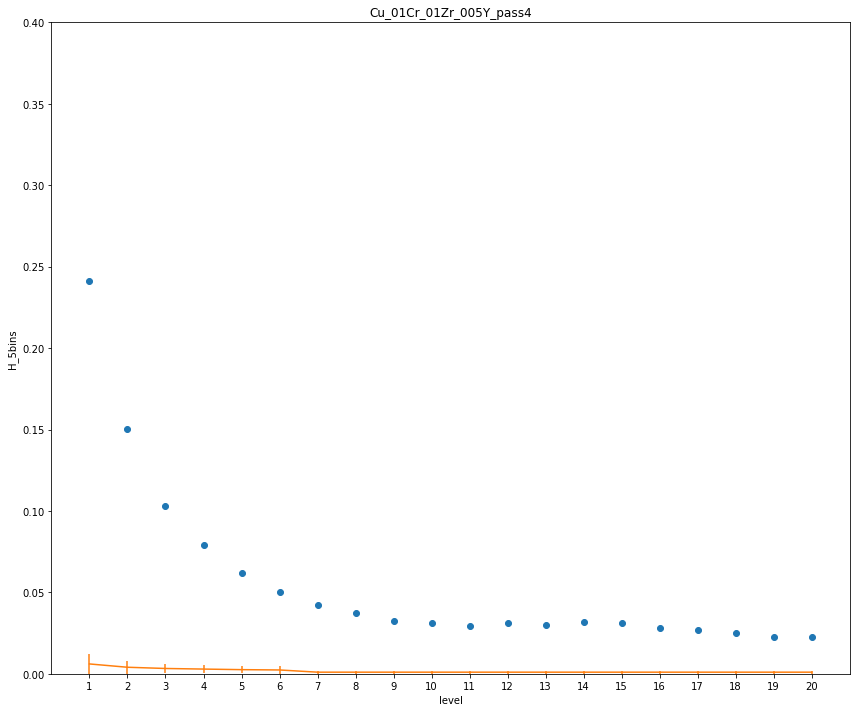

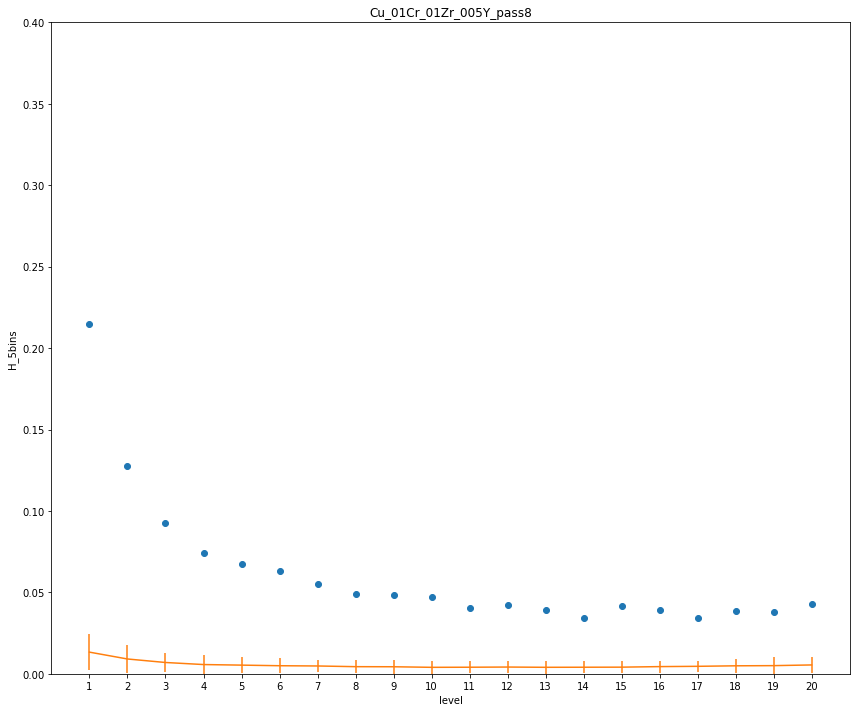

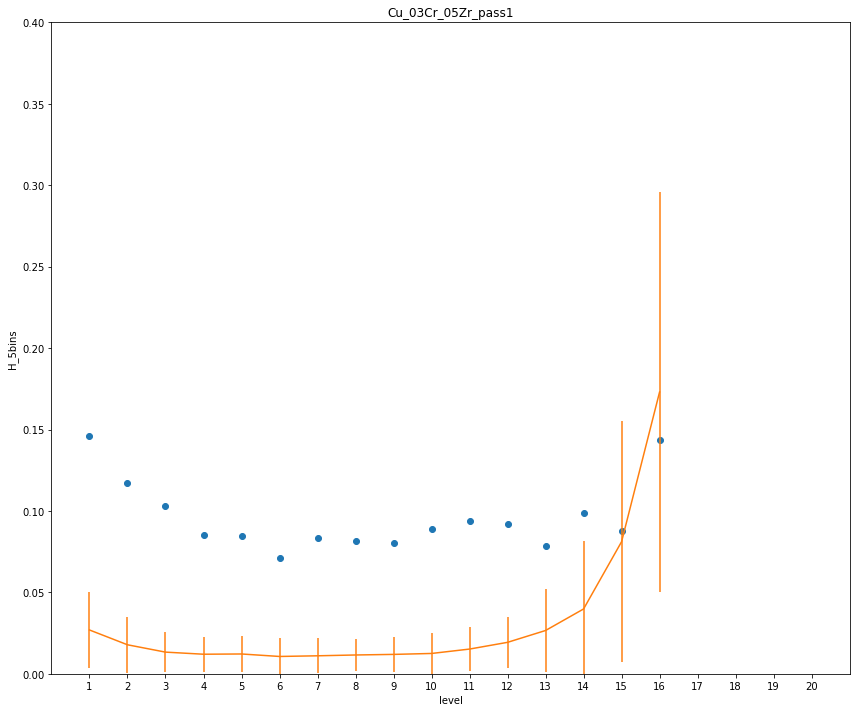

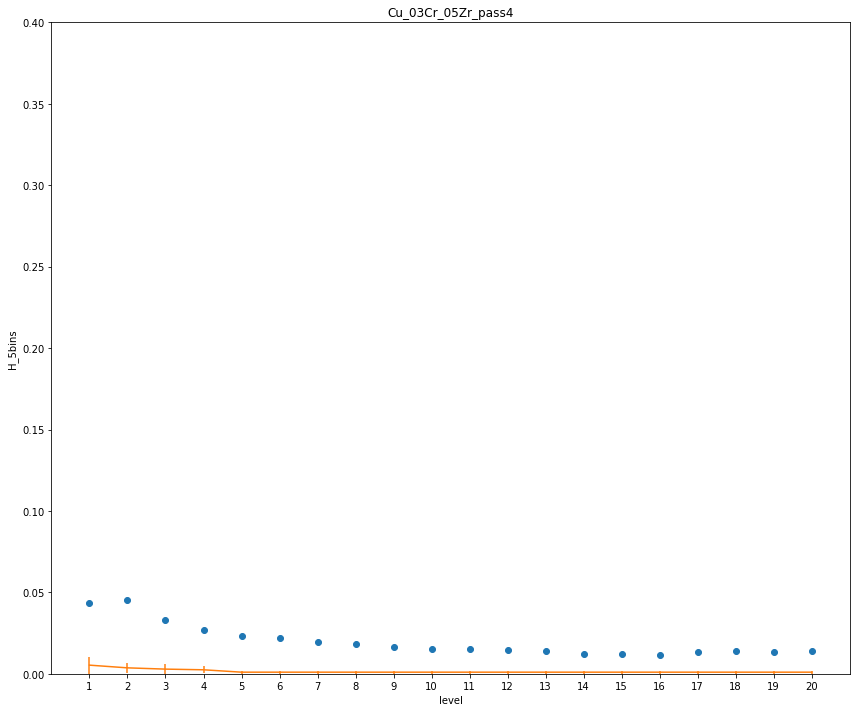

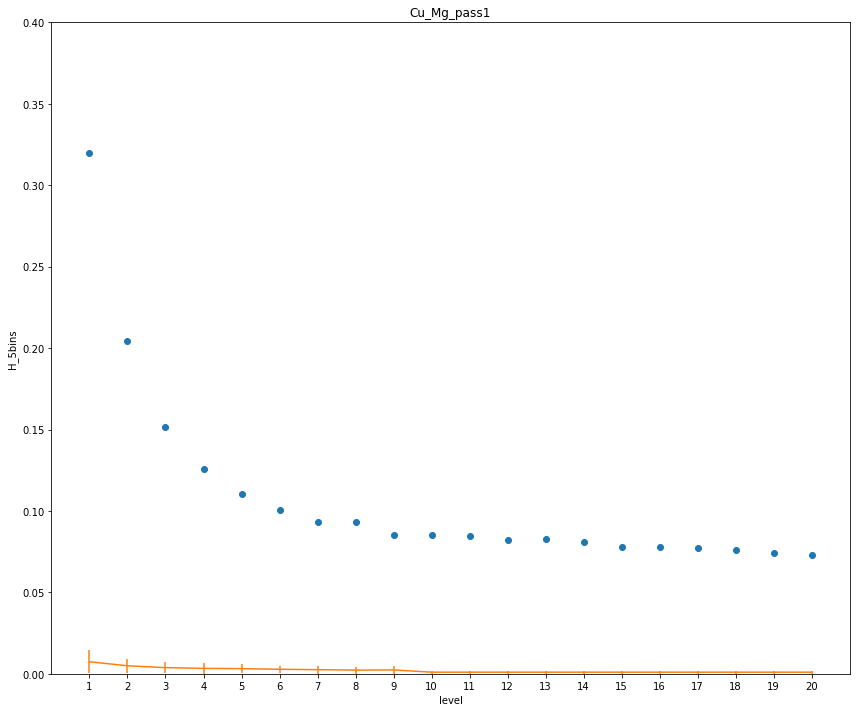

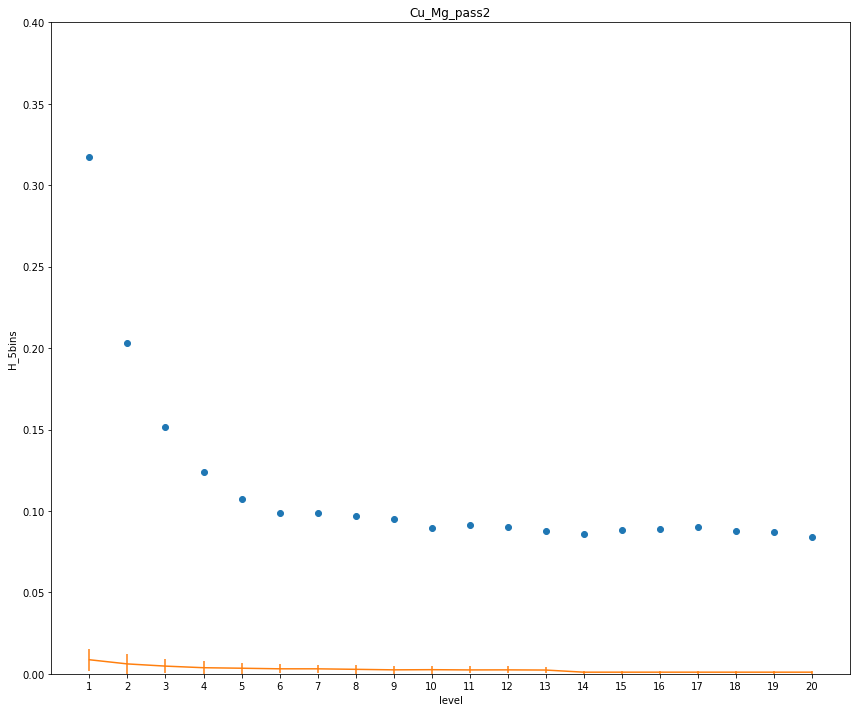

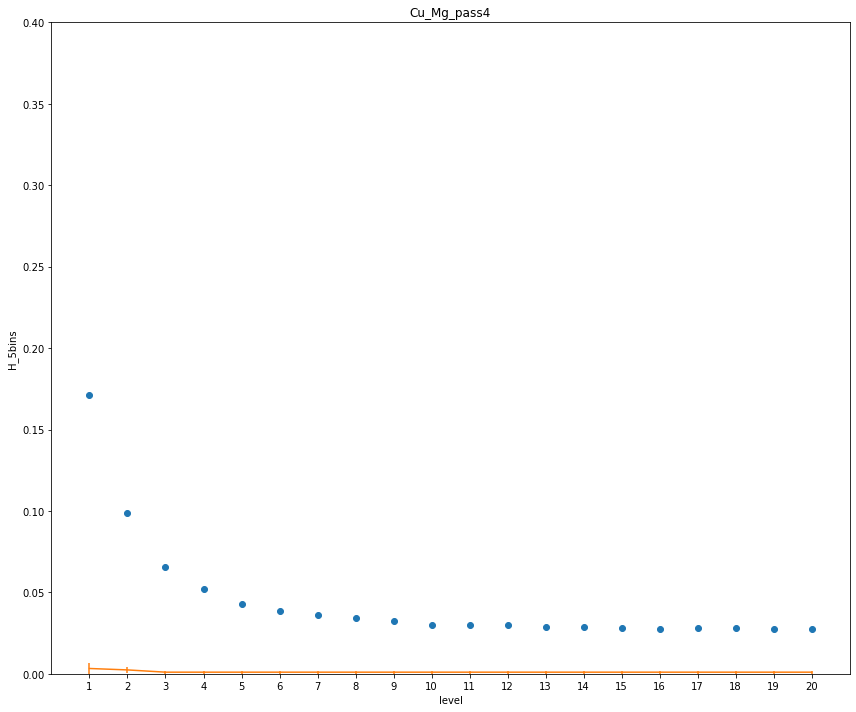

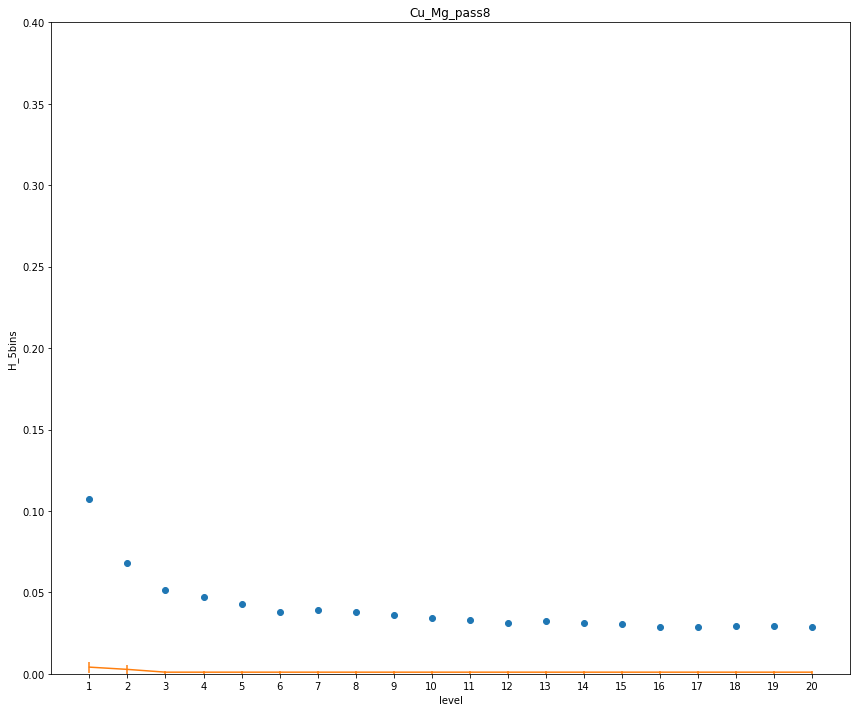

In [218]:
feature = 'H_5bins'

for alloy in data_alloy['alloy'].unique().tolist():
    for pass_ in [1, 2, 4, 8]:
        #plt.figure(figsize=(12,10))
        x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
        y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), feature].tolist()
        Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
        if x:
            fig, ax = plt.subplots(figsize=(12,10), tight_layout=True)
            ax.scatter(x, y)
            y_random = [all_means[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns]
            ax.errorbar(x, y_random, yerr=[2.56*all_stds[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns], color='C1', linestyle='')
            ax.plot(x, y_random, color='C1')
            ax.set_title(alloy + f'_pass{pass_}')
            ax.set_xlim([0, 21])
            ax.set_xticks([*range(1,21)])
            ax.set_xlabel('level')
            ax.set_ylim([0, 0.4])
            ax.set_ylabel(feature)
            plt.savefig(feature + '_' + alloy + f'_pass{pass_}.jpg')
            plt.show()

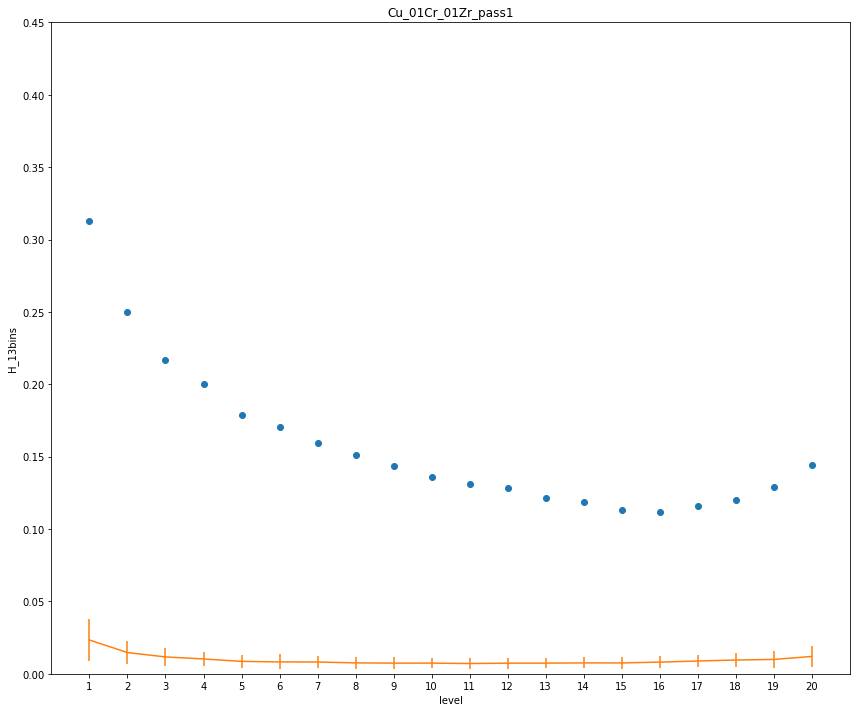

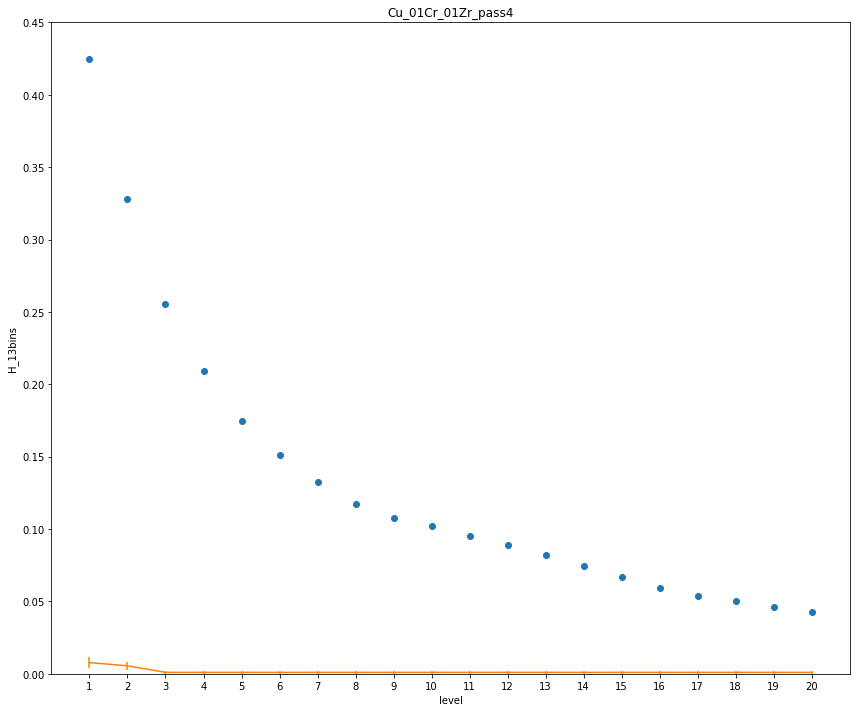

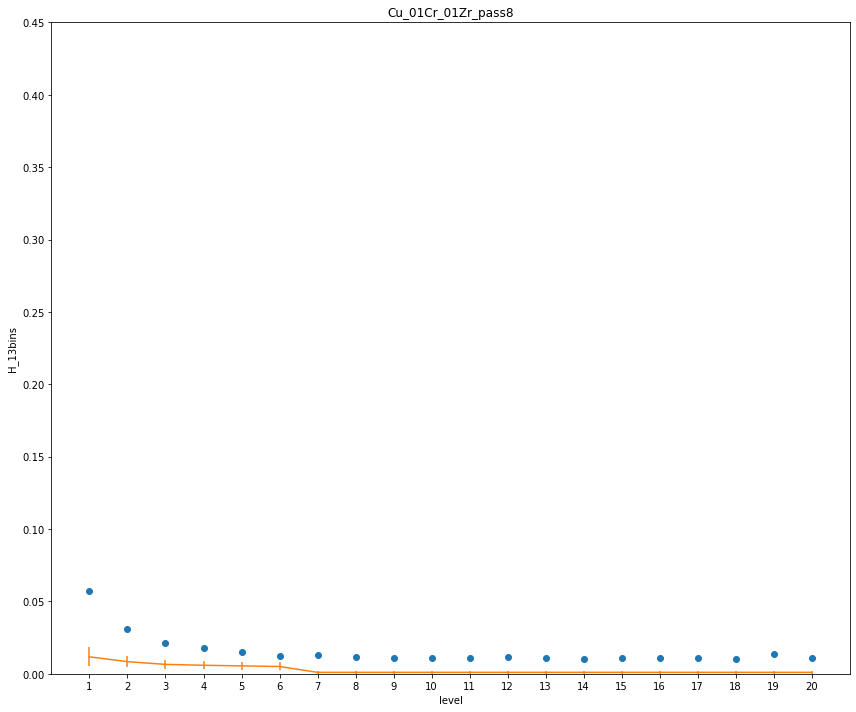

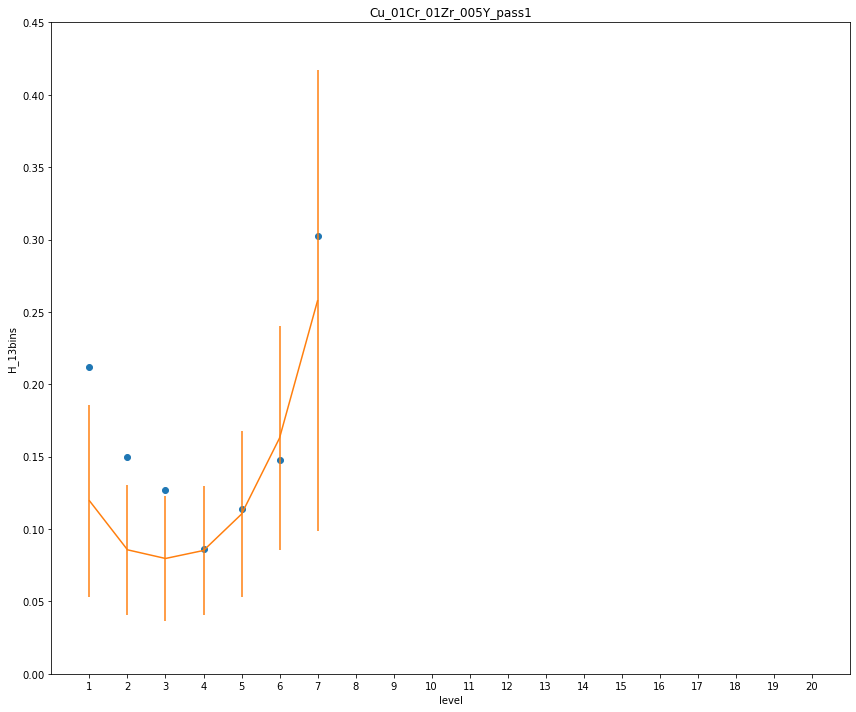

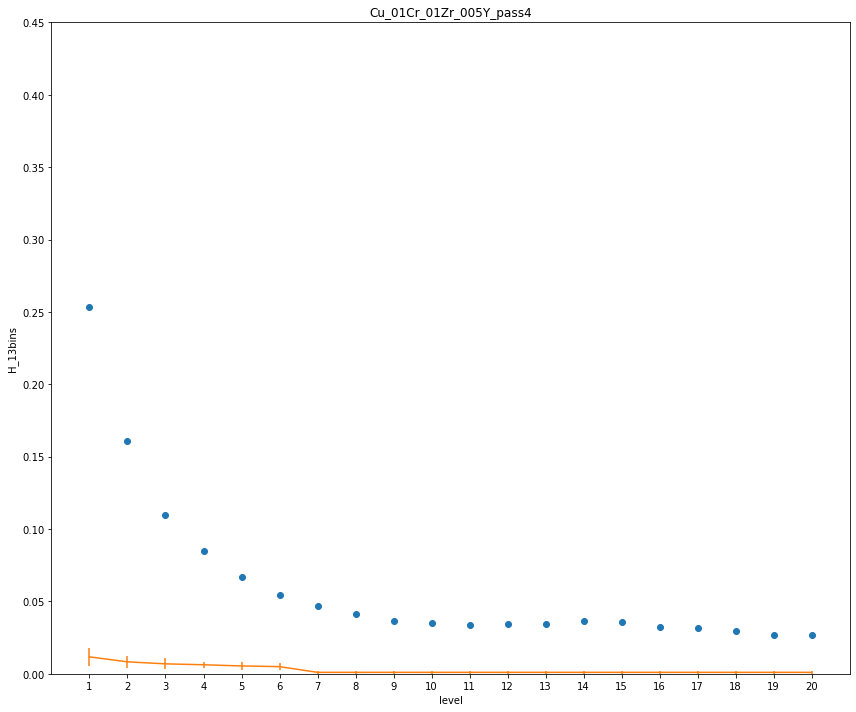

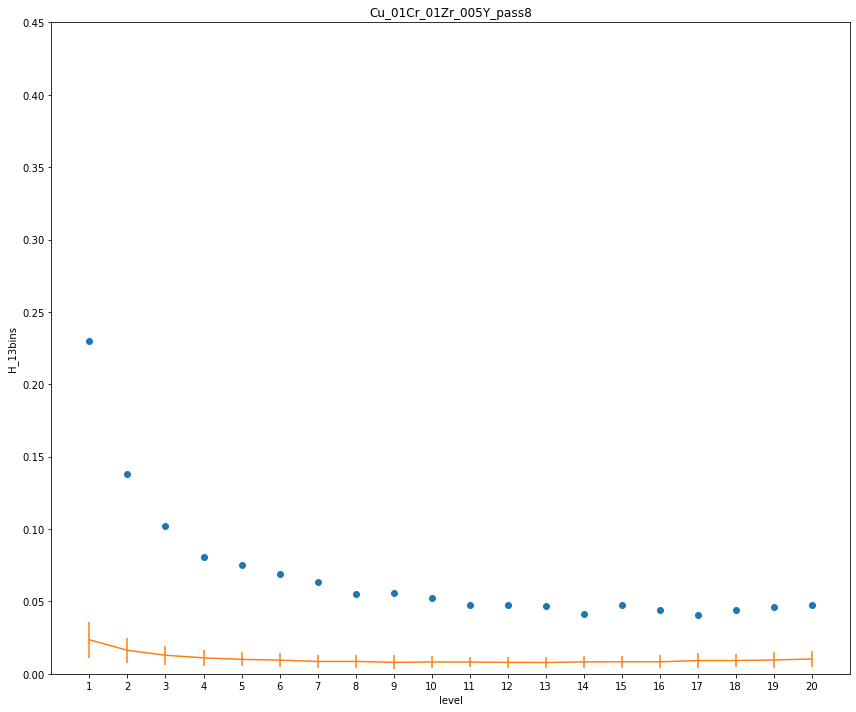

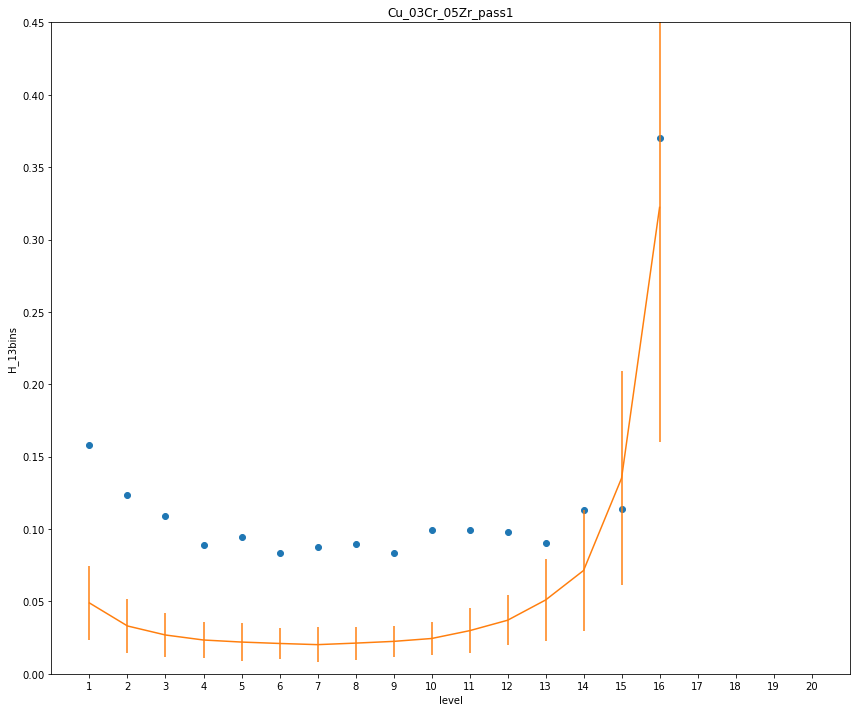

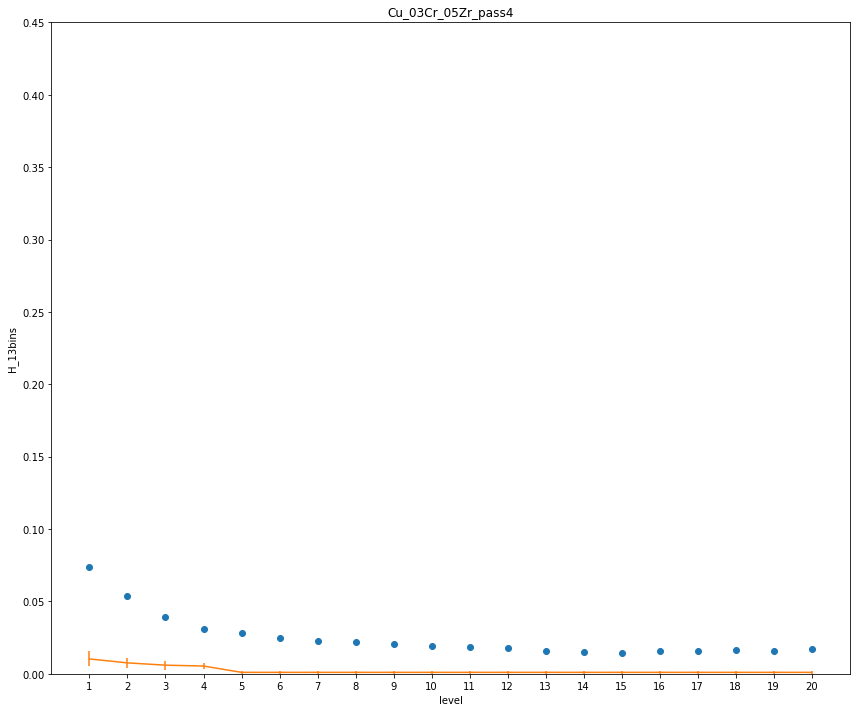

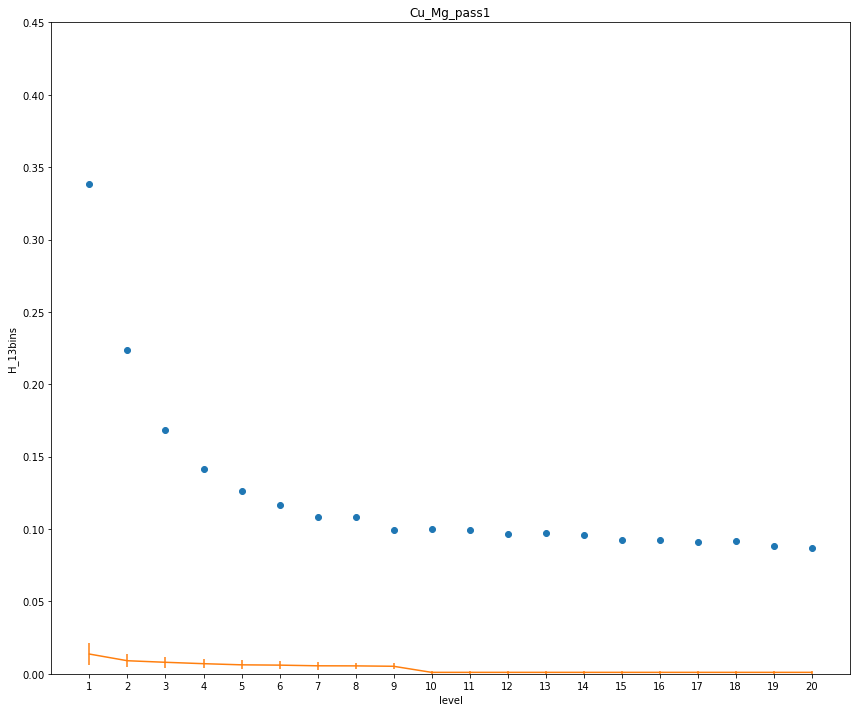

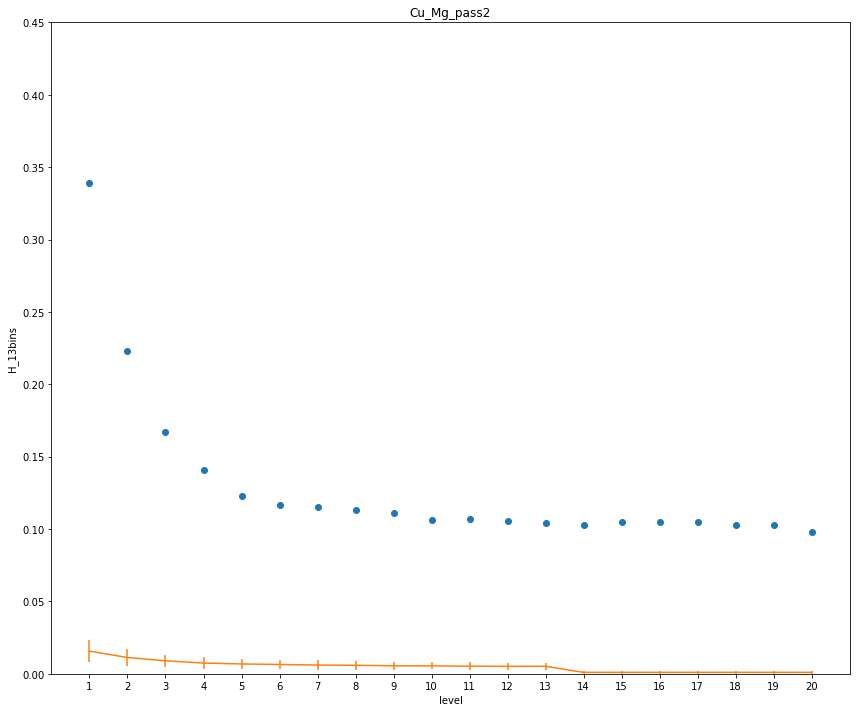

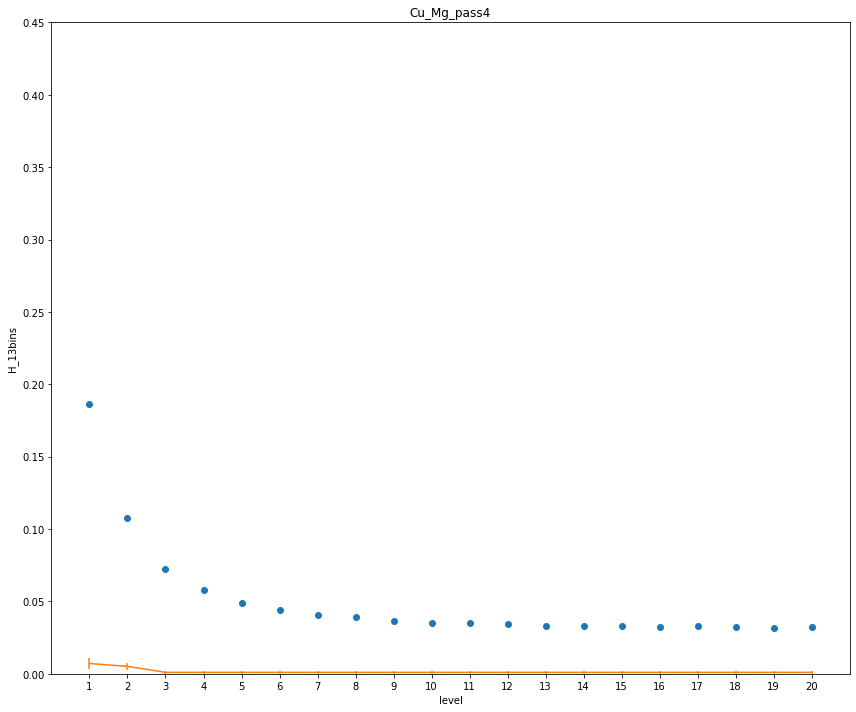

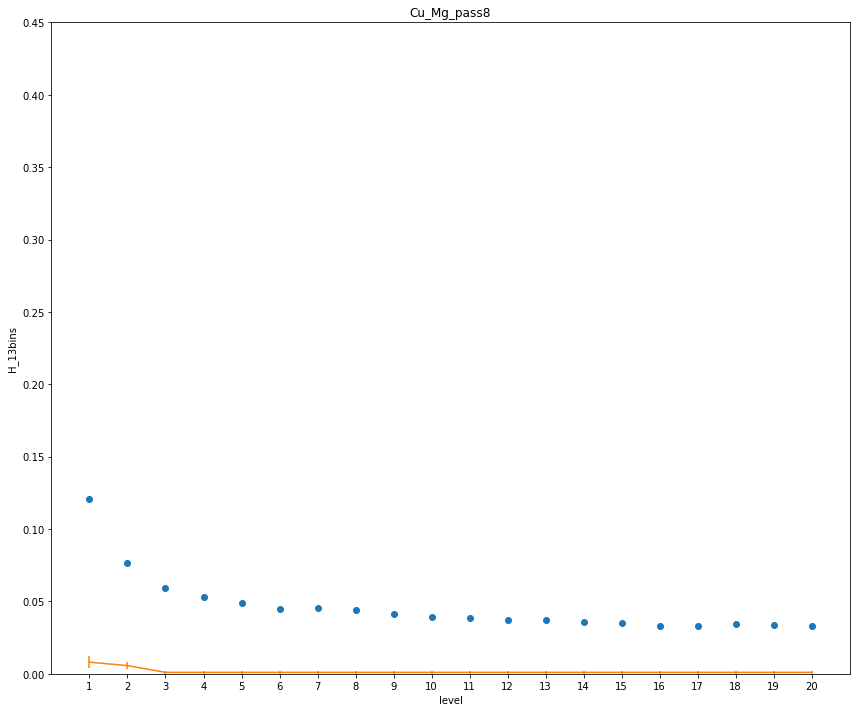

In [224]:
feature = 'H_13bins'

for alloy in data_alloy['alloy'].unique().tolist():
    for pass_ in [1, 2, 4, 8]:
        #plt.figure(figsize=(12,10))
        x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
        y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), feature].tolist()
        Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
        if x:
            fig, ax = plt.subplots(figsize=(12,10), tight_layout=True)
            ax.scatter(x, y)
            y_random = [all_means[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns]
            ax.errorbar(x, y_random, yerr=[2.56*all_stds[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns], color='C1', linestyle='')
            ax.plot(x, y_random, color='C1')
            ax.set_title(alloy + f'_pass{pass_}')
            ax.set_xlim([0, 21])
            ax.set_xticks([*range(1,21)])
            ax.set_xlabel('level')
            ax.set_ylim([0, 0.45])
            ax.set_ylabel(feature)
            plt.savefig(feature + '_' + alloy + f'_pass{pass_}.jpg')
            plt.show()

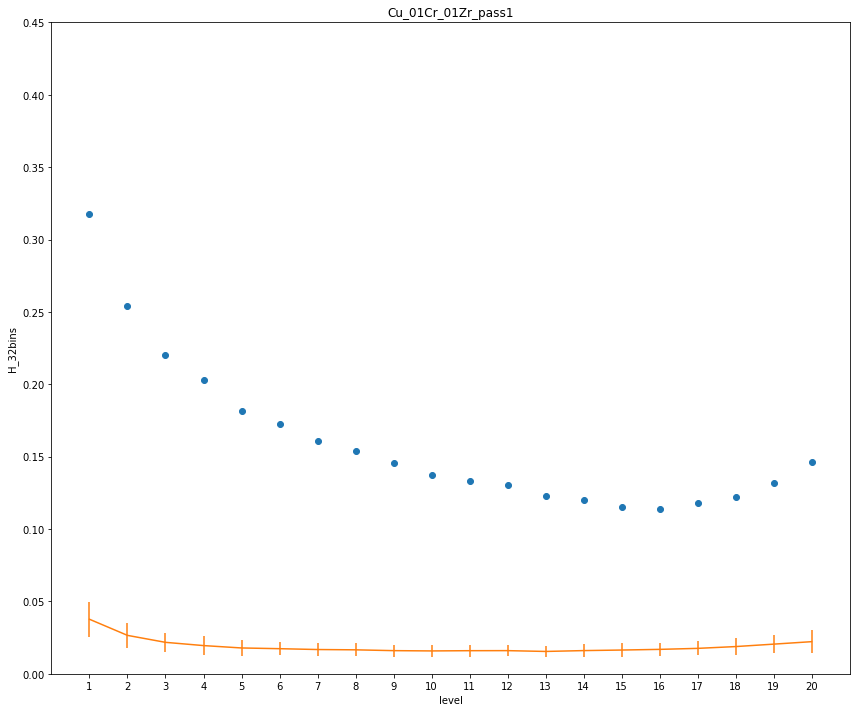

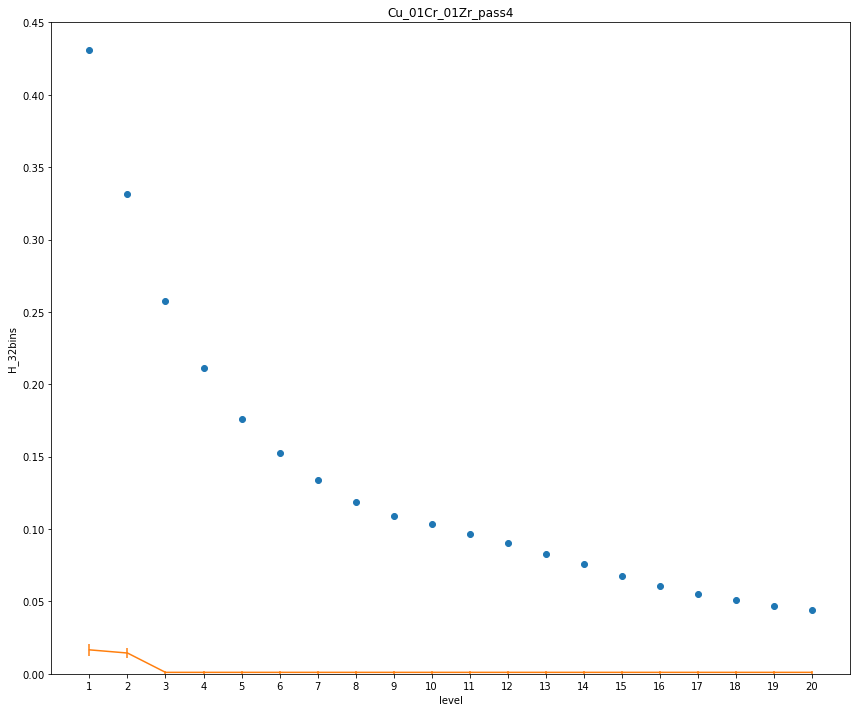

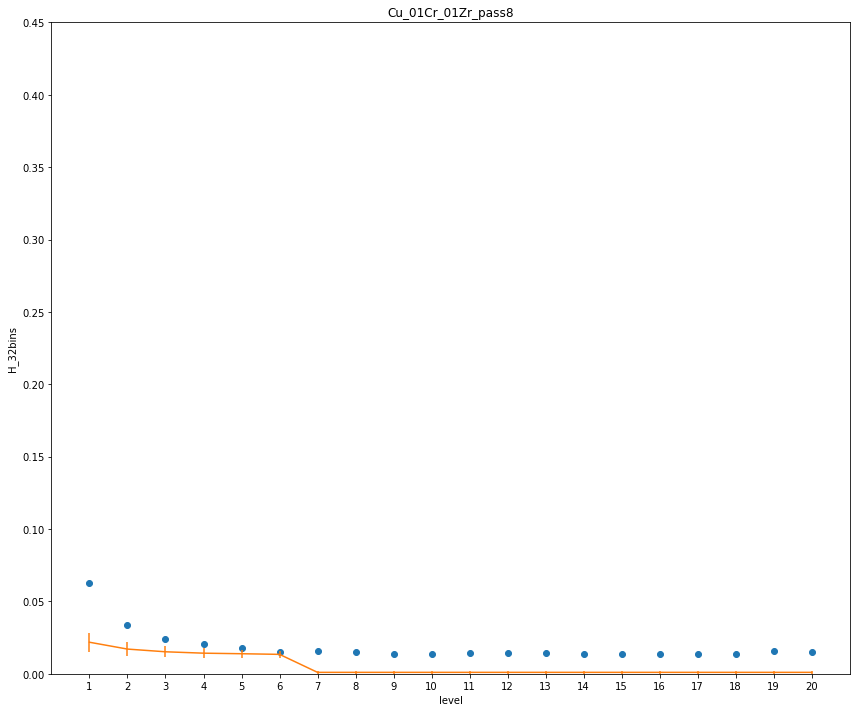

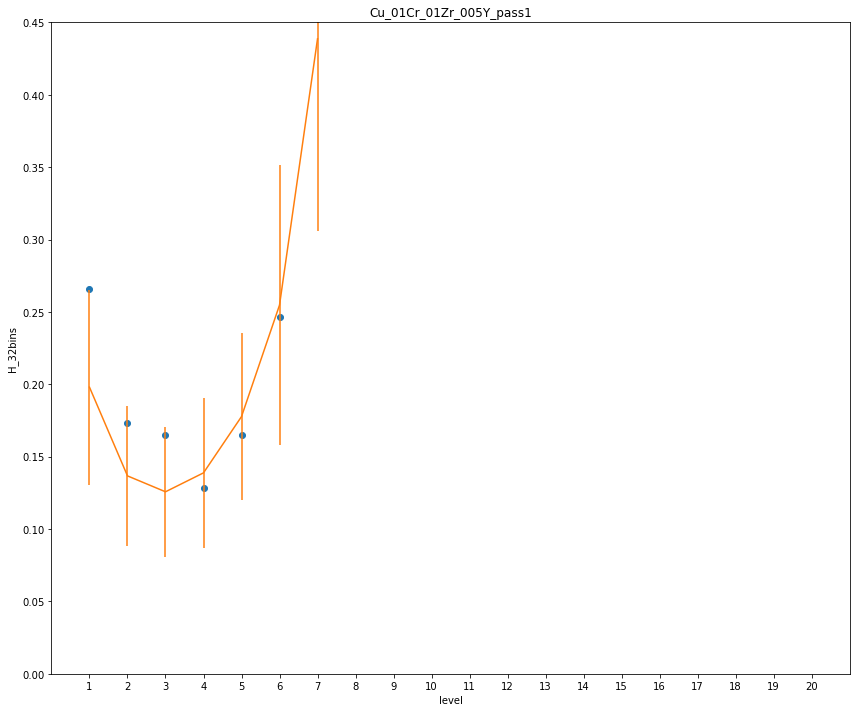

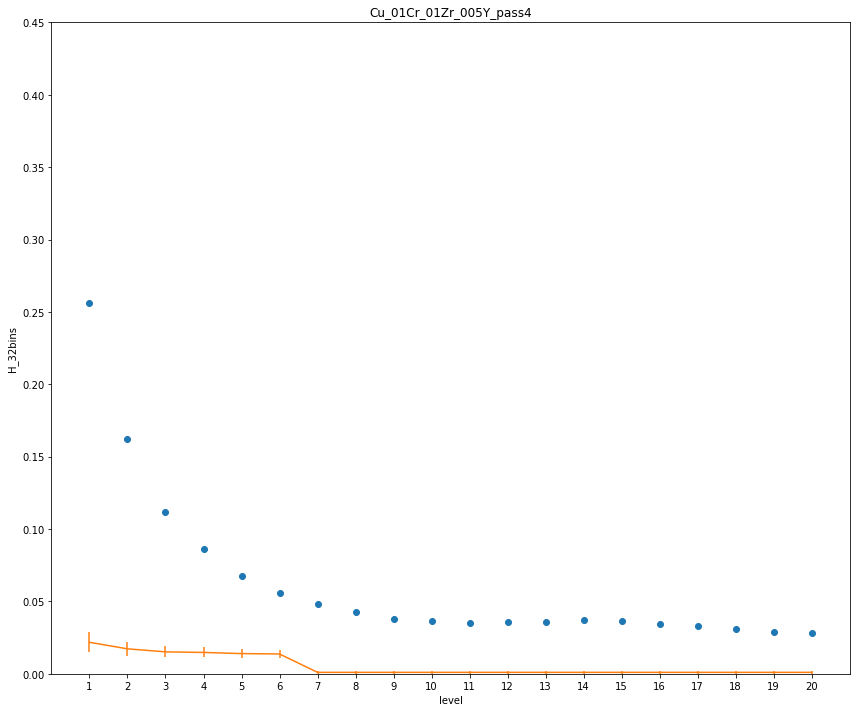

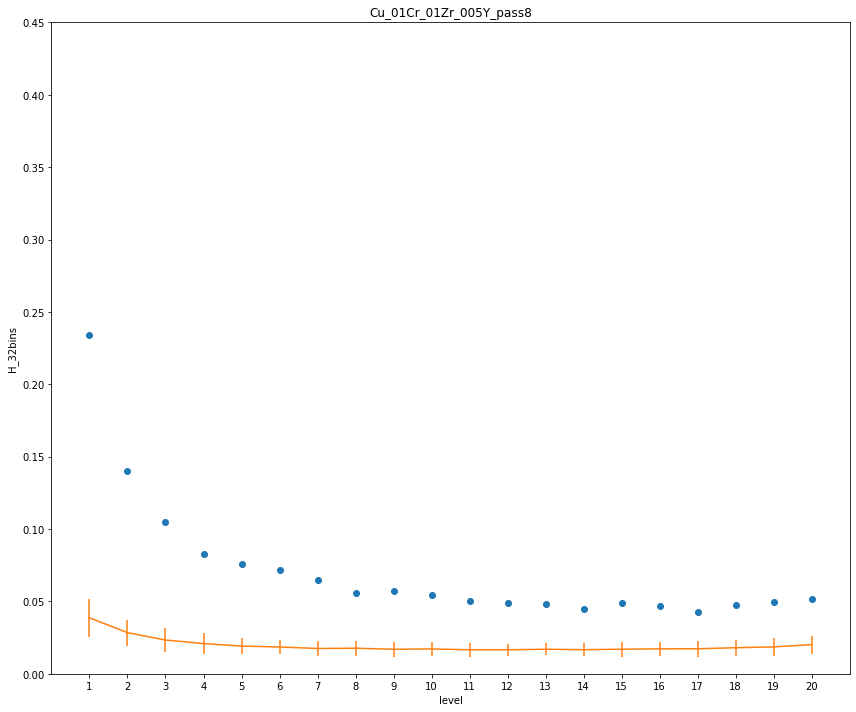

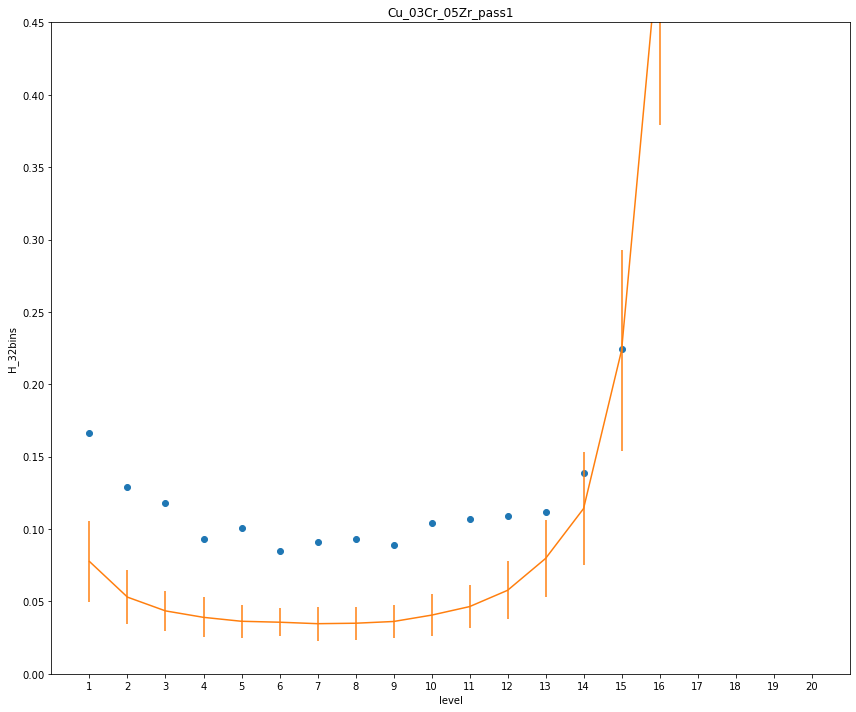

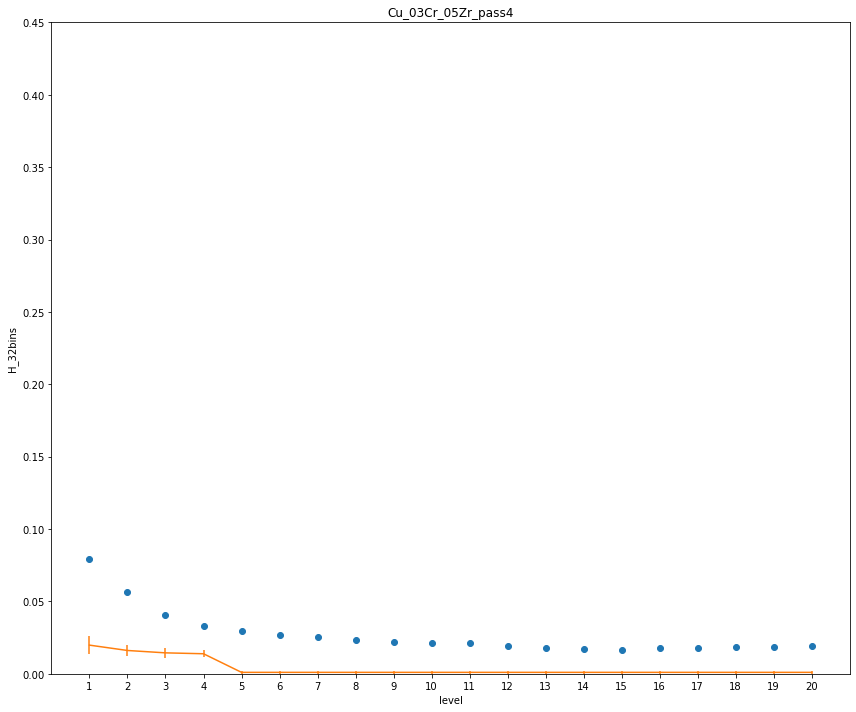

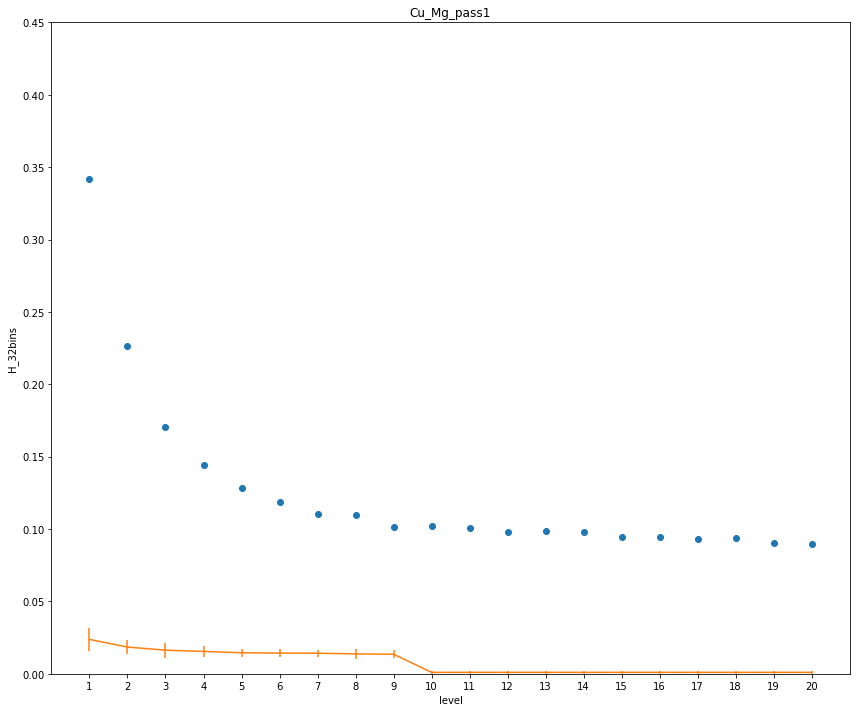

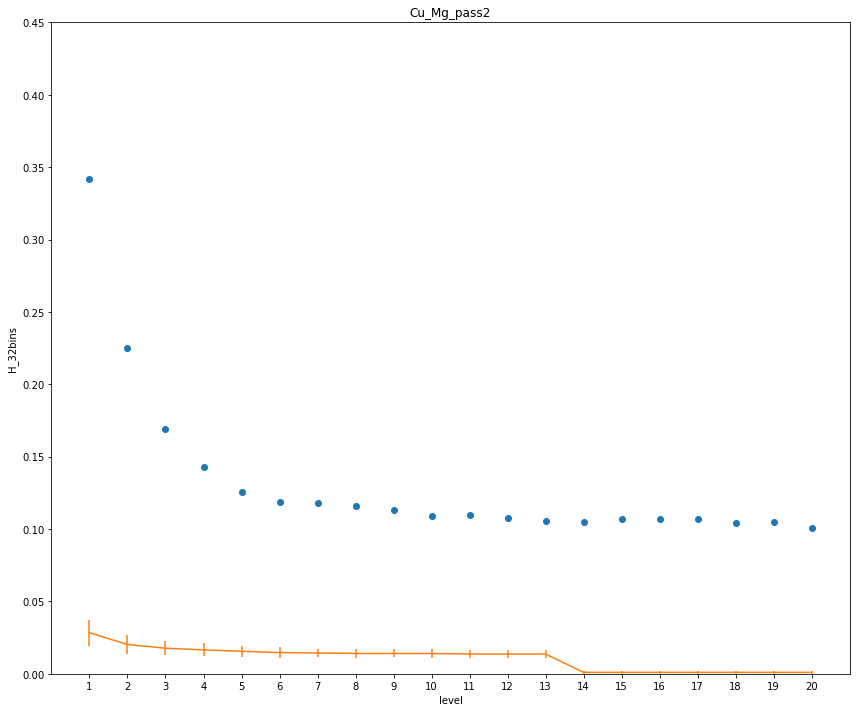

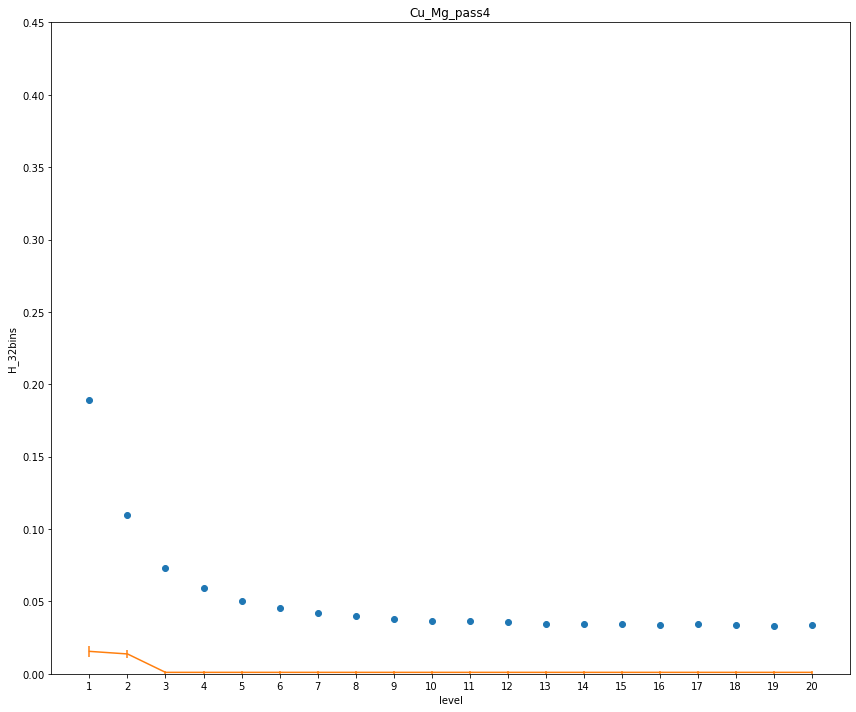

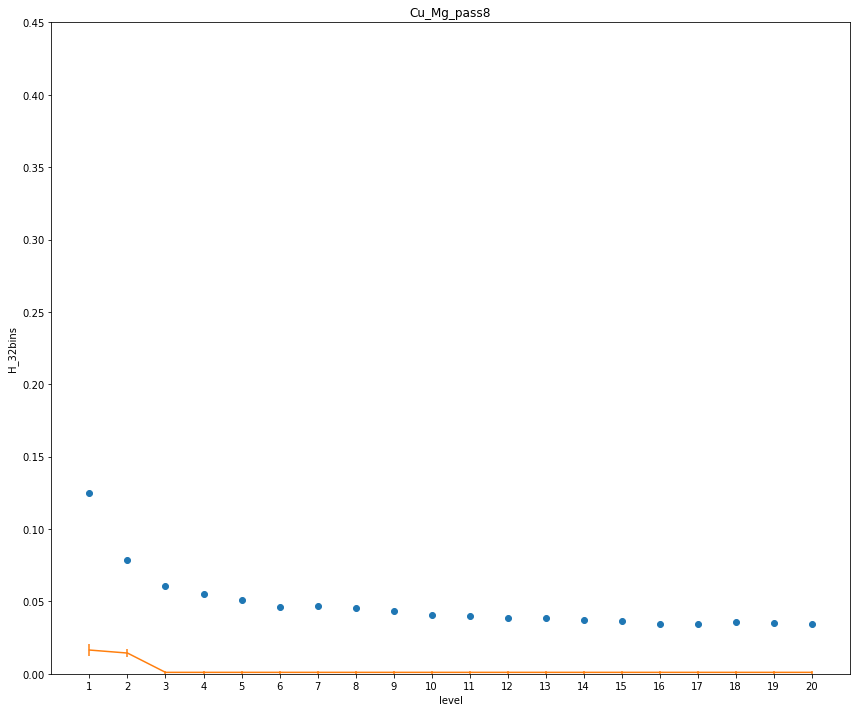

In [226]:
feature = 'H_32bins'

for alloy in data_alloy['alloy'].unique().tolist():
    for pass_ in [1, 2, 4, 8]:
        #plt.figure(figsize=(12,10))
        x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
        y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), feature].tolist()
        Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
        if x:
            fig, ax = plt.subplots(figsize=(12,10), tight_layout=True)
            ax.scatter(x, y)
            y_random = [all_means[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns]
            ax.errorbar(x, y_random, yerr=[2.56*all_stds[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns], color='C1', linestyle='')
            ax.plot(x, y_random, color='C1')
            ax.set_title(alloy + f'_pass{pass_}')
            ax.set_xlim([0, 21])
            ax.set_xticks([*range(1,21)])
            ax.set_xlabel('level')
            ax.set_ylim([0, 0.45])
            ax.set_ylabel(feature)
            plt.savefig(feature + '_' + alloy + f'_pass{pass_}.jpg')
            plt.show()

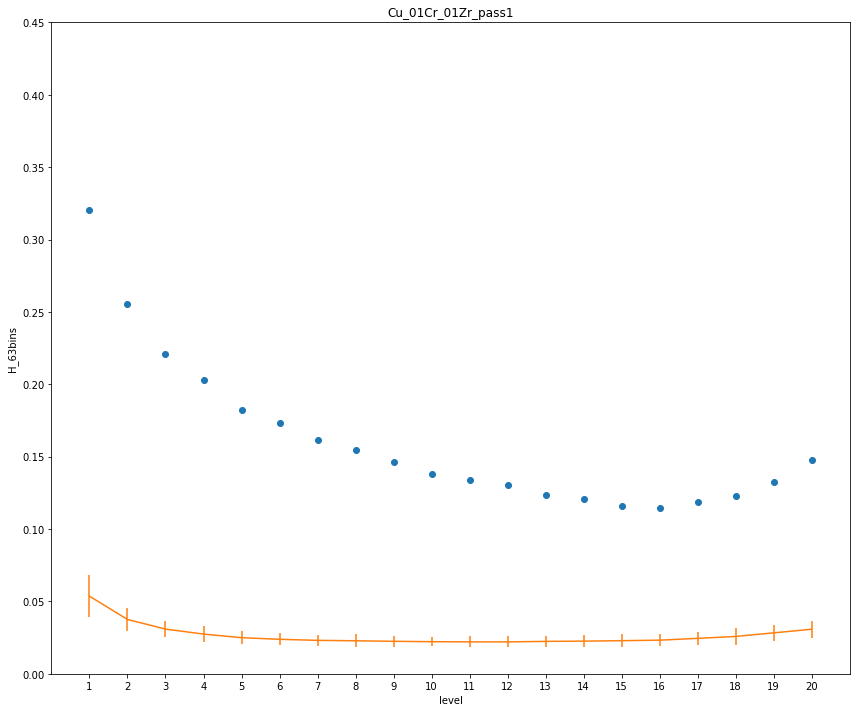

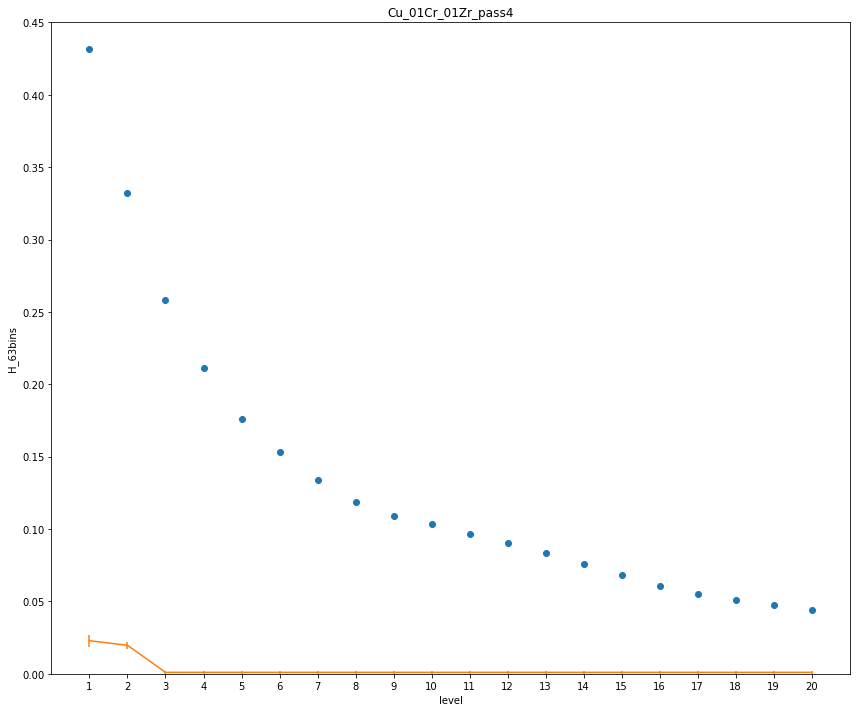

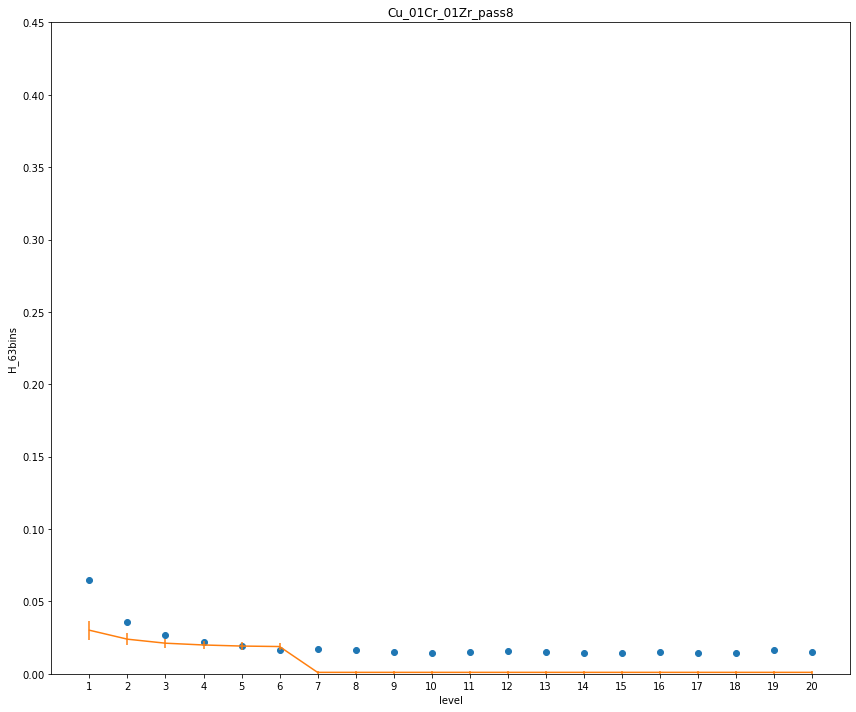

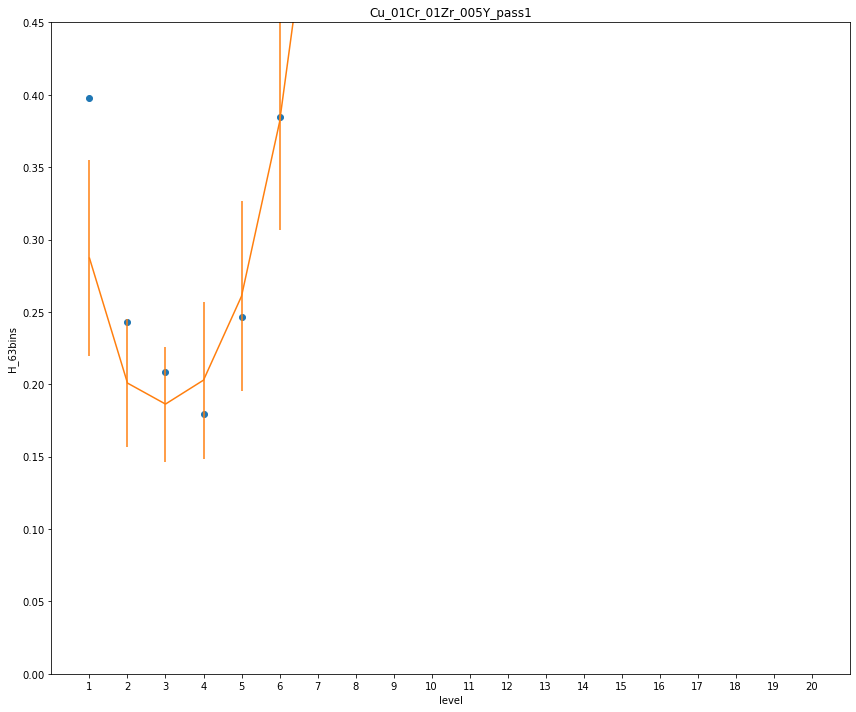

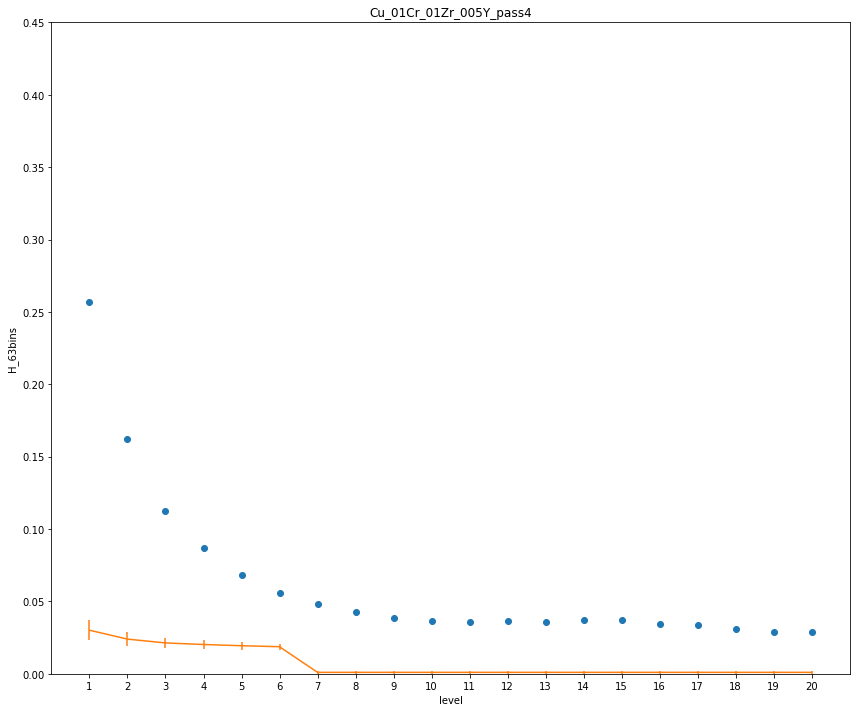

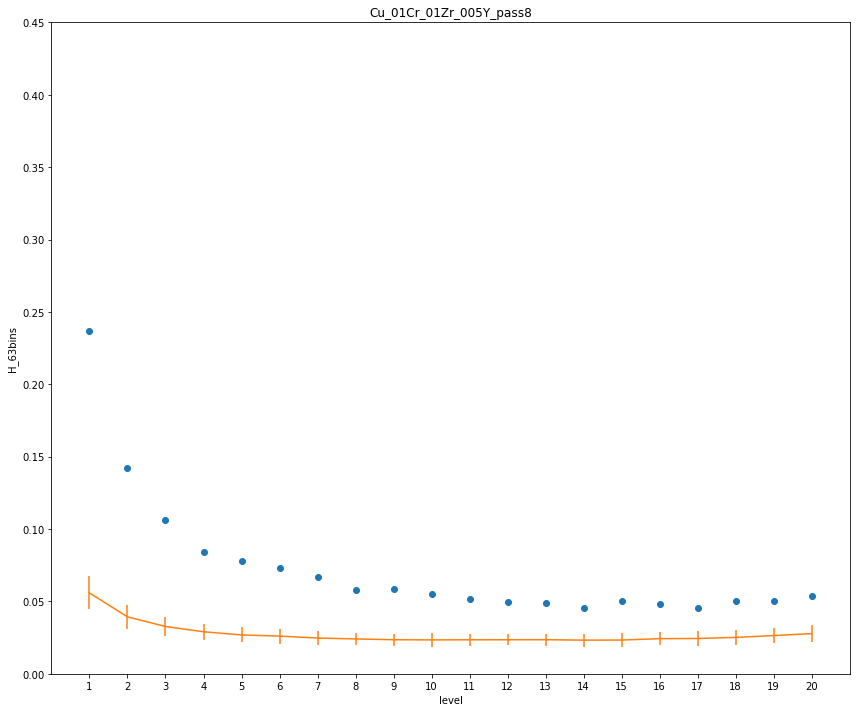

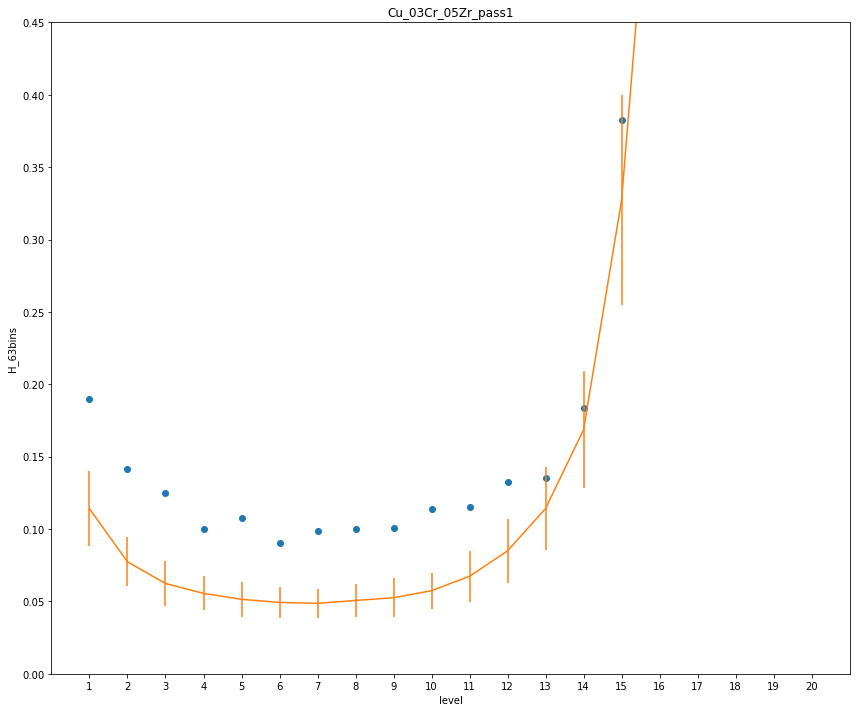

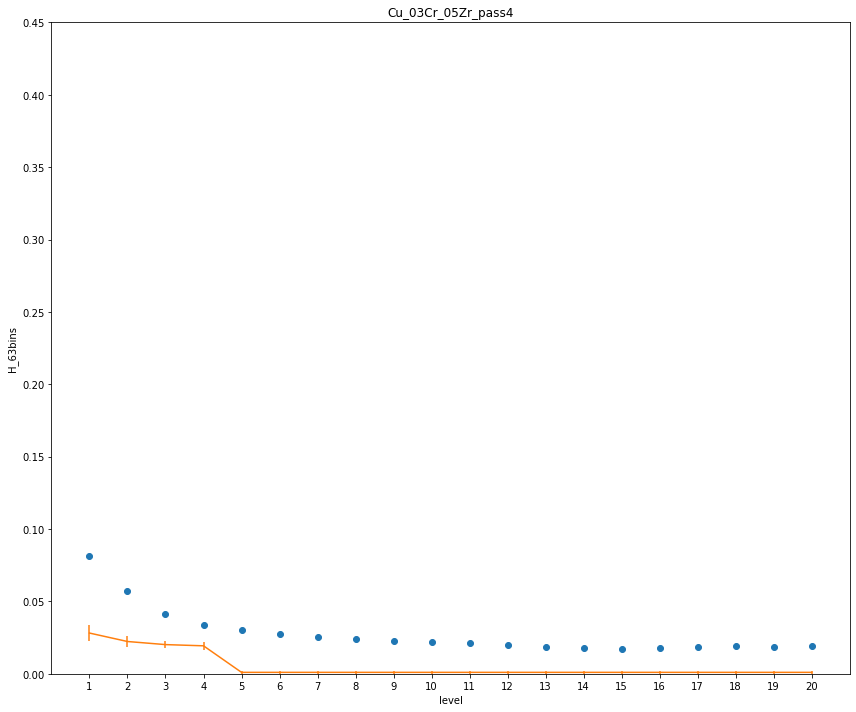

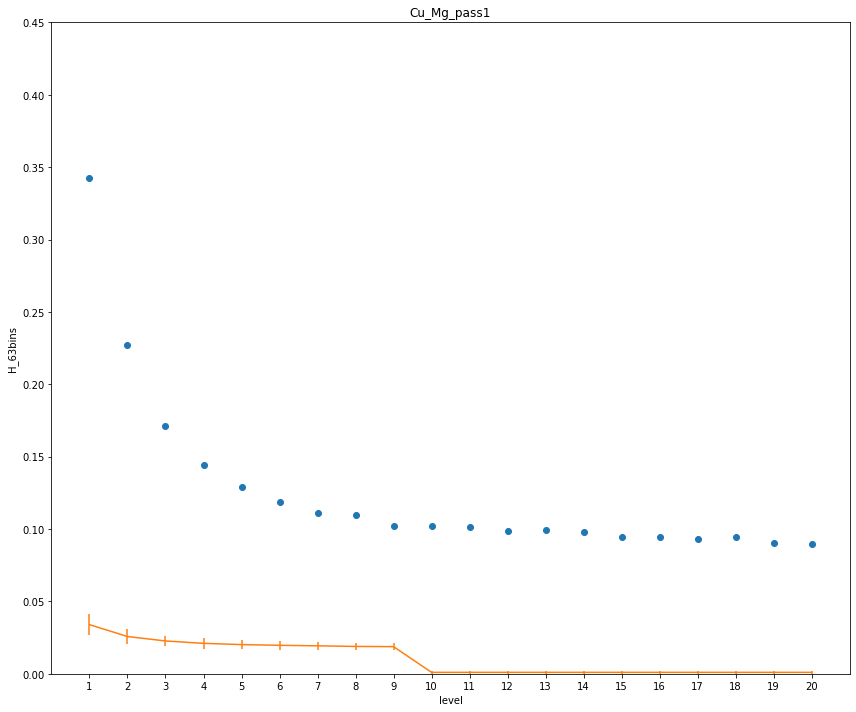

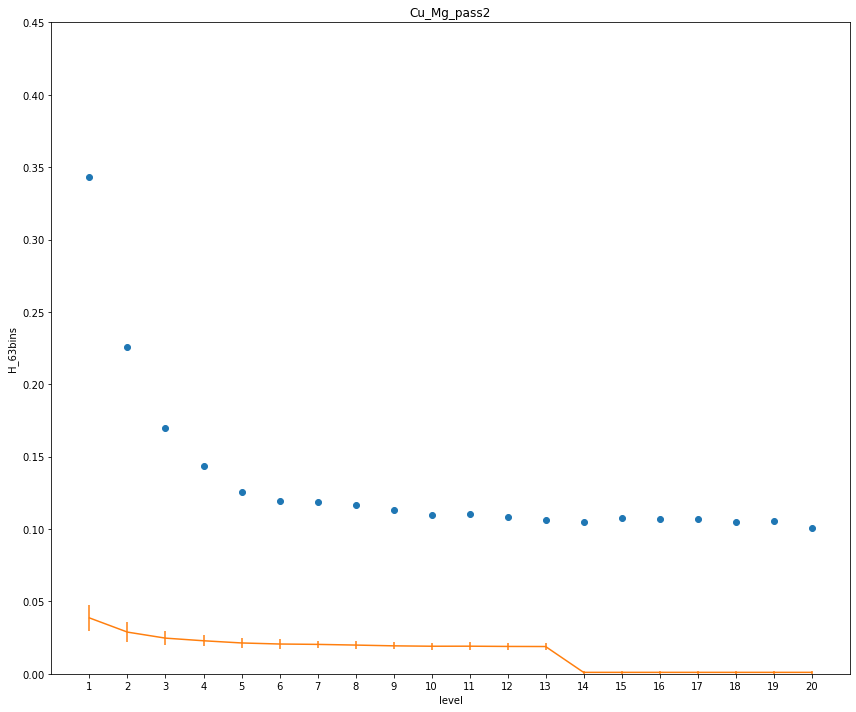

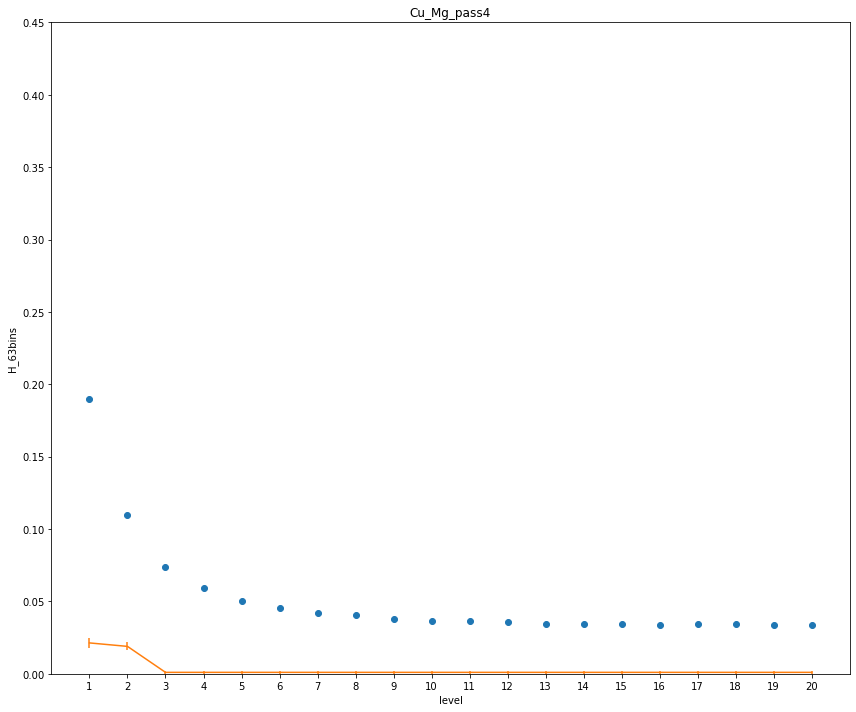

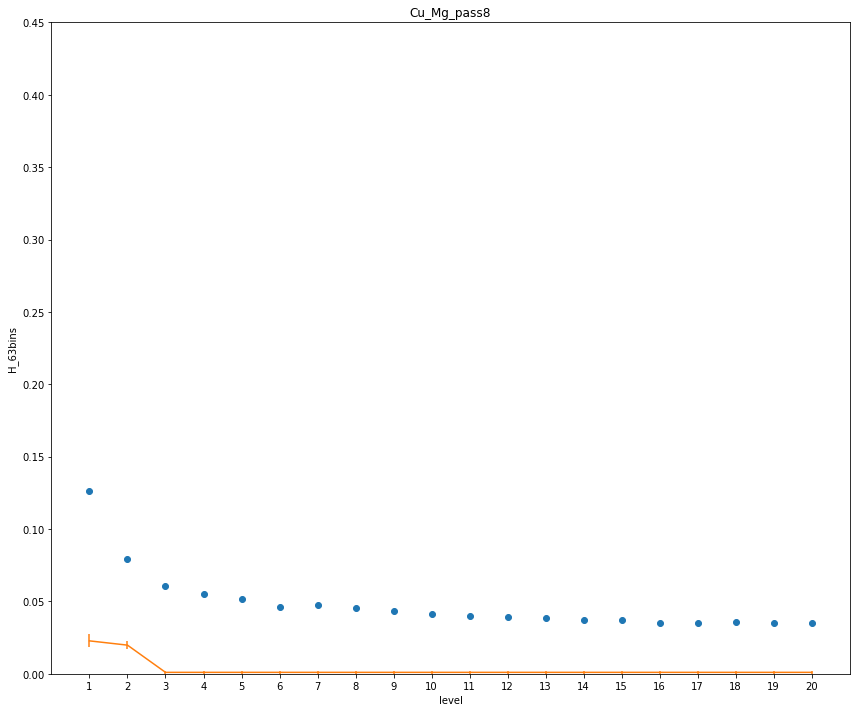

In [229]:
feature = 'H_63bins'

for alloy in data_alloy['alloy'].unique().tolist():
    for pass_ in [1, 2, 4, 8]:
        #plt.figure(figsize=(12,10))
        x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
        y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), feature].tolist()
        Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
        if x:
            fig, ax = plt.subplots(figsize=(12,10), tight_layout=True)
            ax.scatter(x, y)
            y_random = [all_means[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns]
            ax.errorbar(x, y_random, yerr=[2.56*all_stds[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns], color='C1', linestyle='')
            ax.plot(x, y_random, color='C1')
            ax.set_title(alloy + f'_pass{pass_}')
            ax.set_xlim([0, 21])
            ax.set_xticks([*range(1,21)])
            ax.set_xlabel('level')
            ax.set_ylim([0, 0.45])
            ax.set_ylabel(feature)
            plt.savefig(feature + '_' + alloy + f'_pass{pass_}.jpg')
            plt.show()

In [231]:
data_alloy.to_csv('alloy_upd2.csv', index=False)

In [233]:
import seaborn as sns

In [235]:
mpl.rcParams['lines.markersize'] = 10

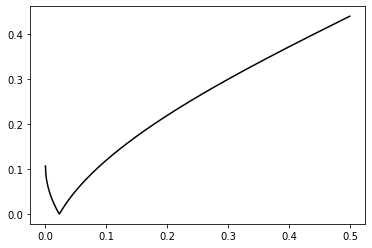

In [239]:
Q = np.array([0.02277, 0.9774])
p_array = np.arange(0, 0.5, 0.001)
P_array = [np.array([p, 1 - p]) for p in p_array] 
x = [P[0] for P in P_array]
y = [matutils._hellinger(P,Q) for P in P_array]
plt.plot(x, y, 'k')

plt.show()

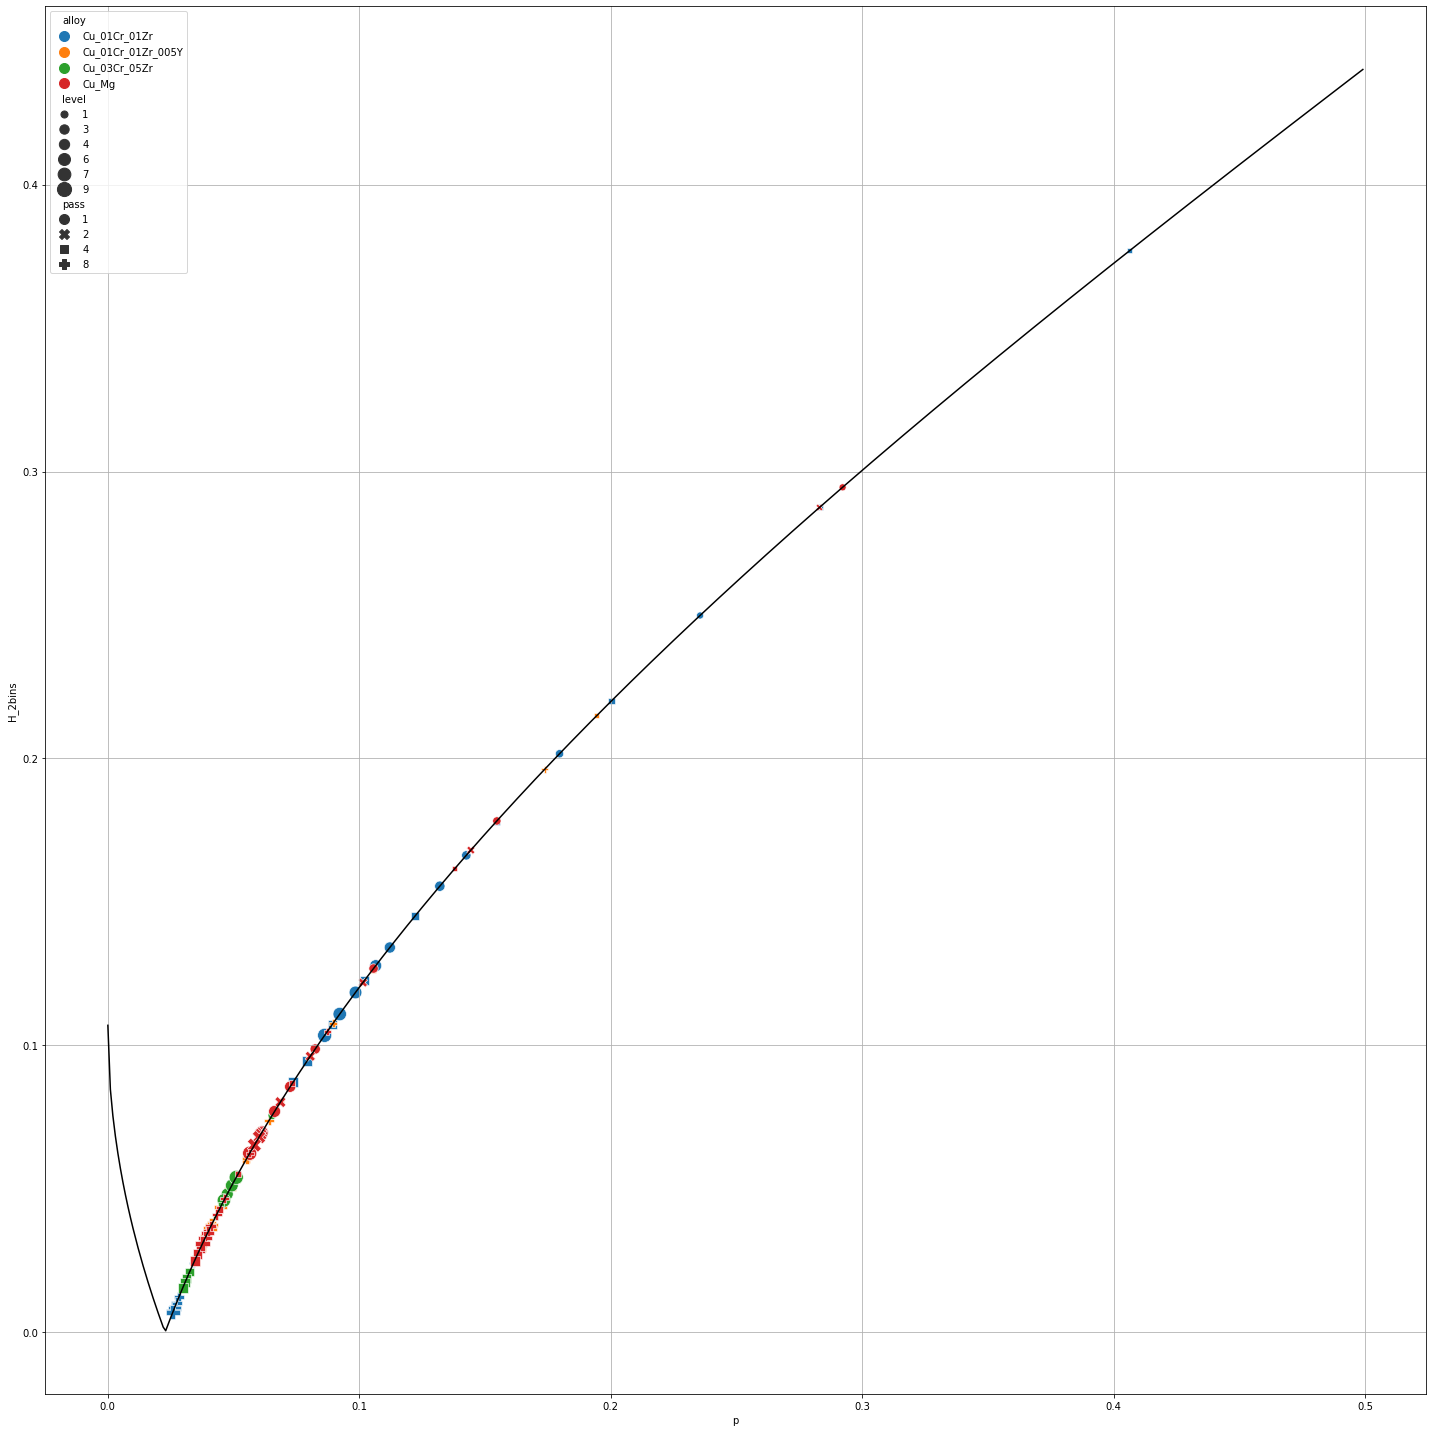

In [258]:
plt.figure(figsize=(20, 20), tight_layout=True)
sns.scatterplot(data=data_alloy[filt], x='p', y='H_2bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
plt.grid()
plt.savefig('H_2bins_vs_p_filt.jpg', dpi=600)

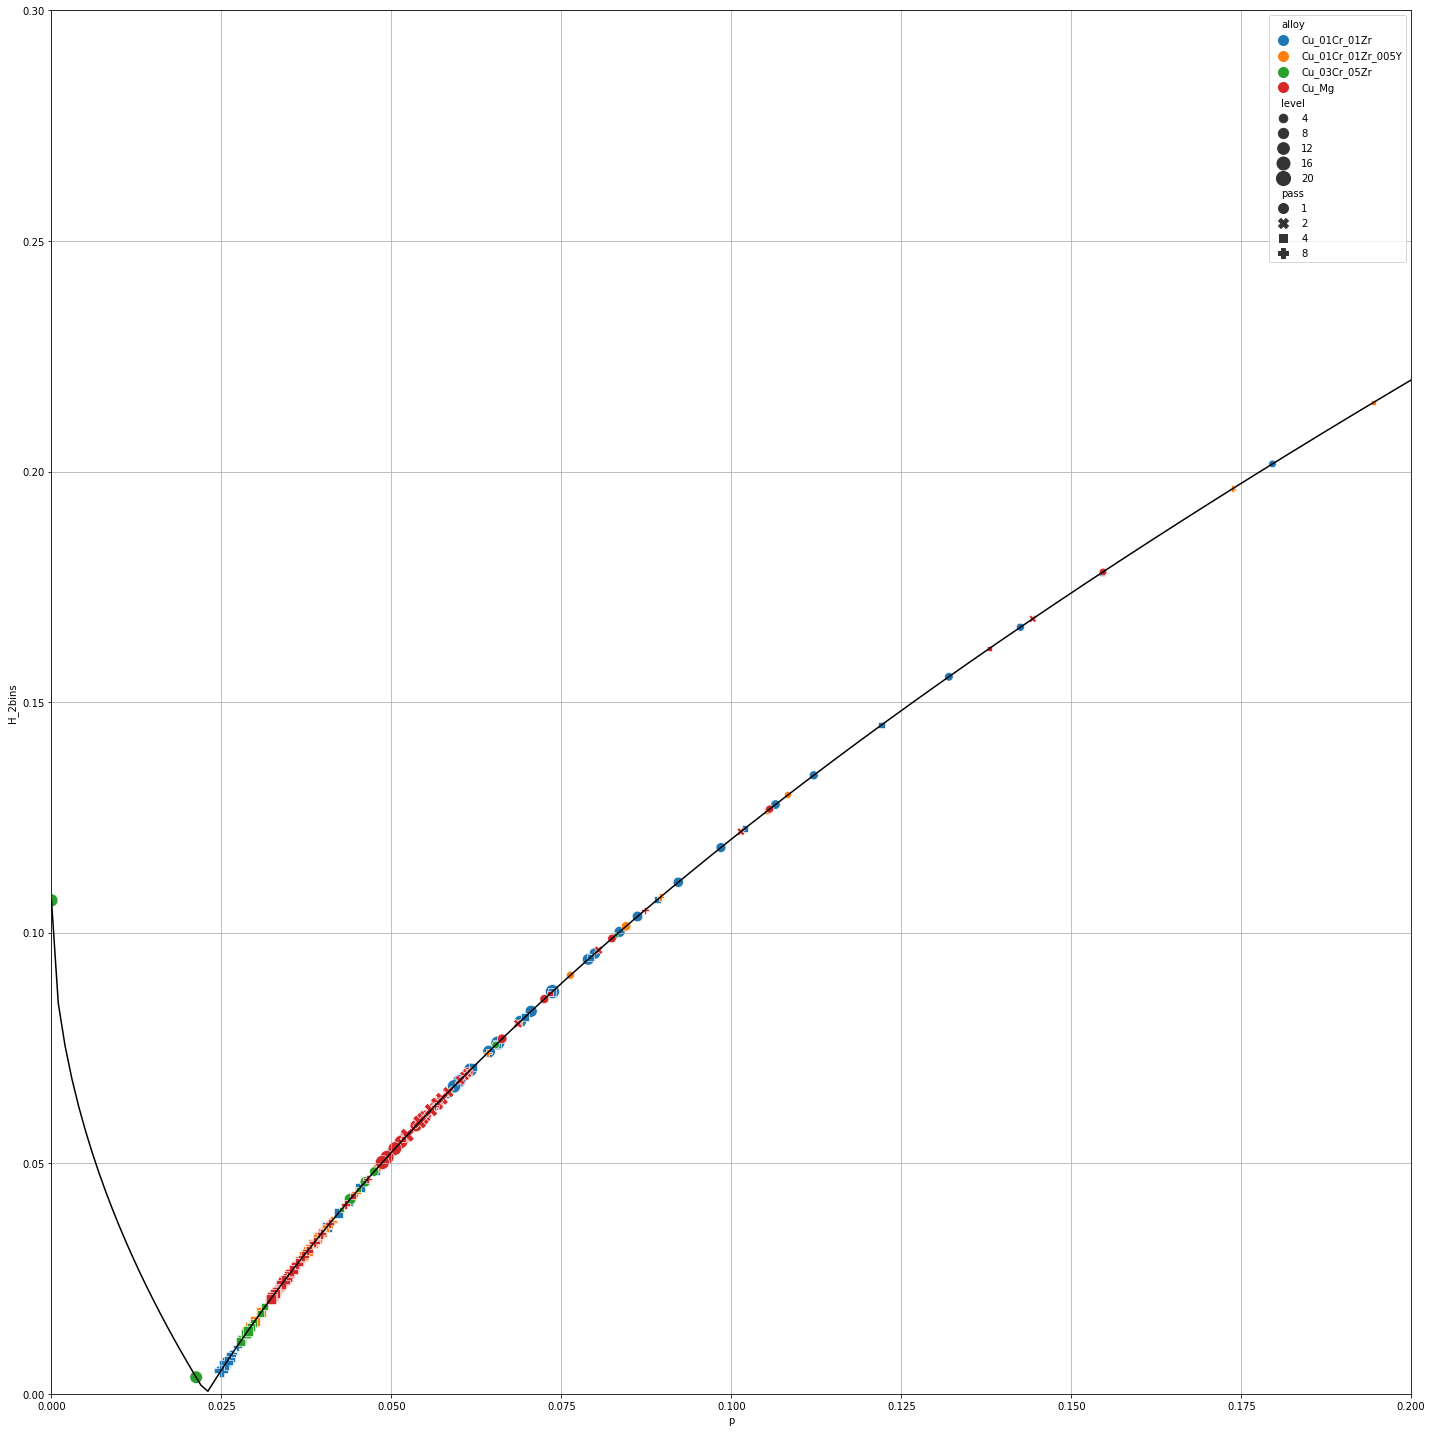

In [259]:
plt.figure(figsize=(20, 20), tight_layout=True)
sns.scatterplot(data=data_alloy, x='p', y='H_2bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
plt.xlim([0, 0.2])
plt.ylim([0, 0.3])
plt.grid()
plt.savefig('H_2bins_vs_p_filt2.jpg', dpi=300)

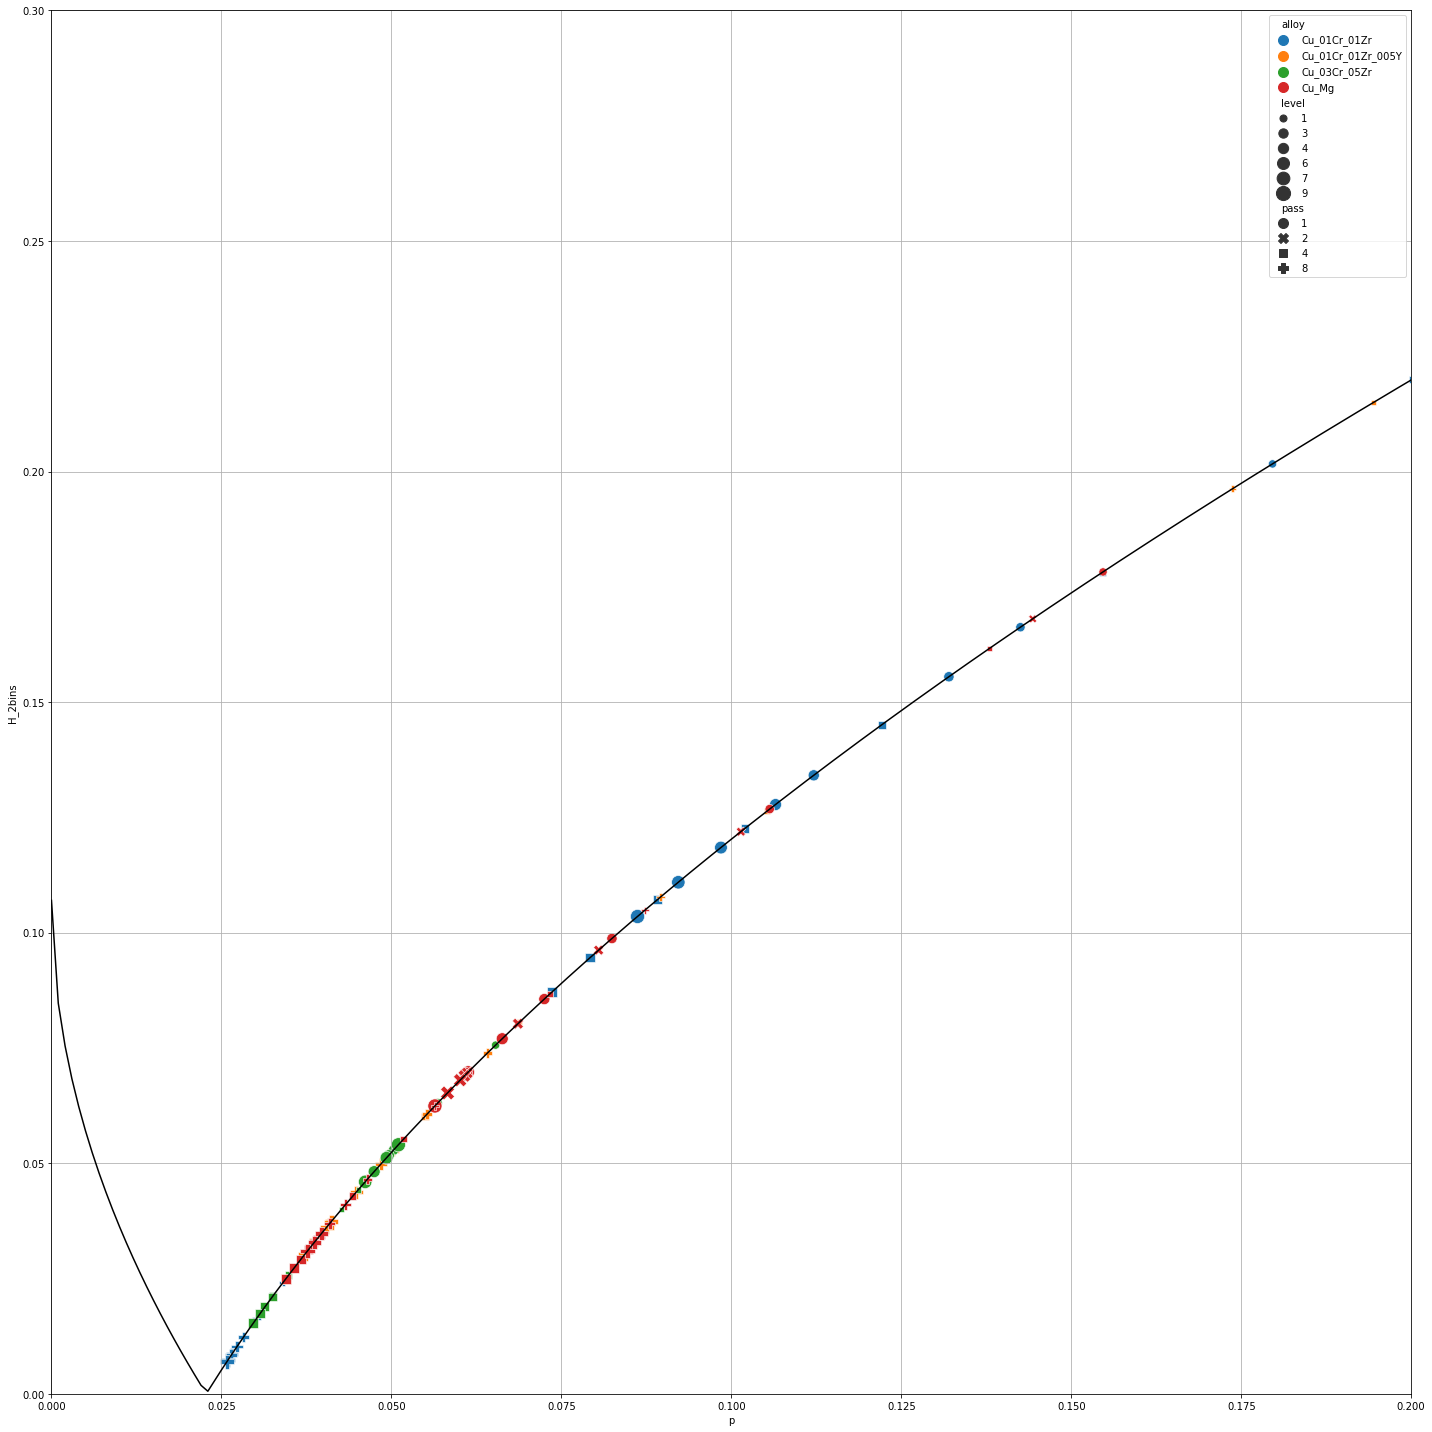

In [260]:
plt.figure(figsize=(20, 20), tight_layout=True)
sns.scatterplot(data=data_alloy[filt], x='p', y='H_2bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
plt.xlim([0, 0.2])
plt.ylim([0, 0.3])
plt.grid()
plt.savefig('H_2bins_vs_p_filt2.jpg', dpi=300)

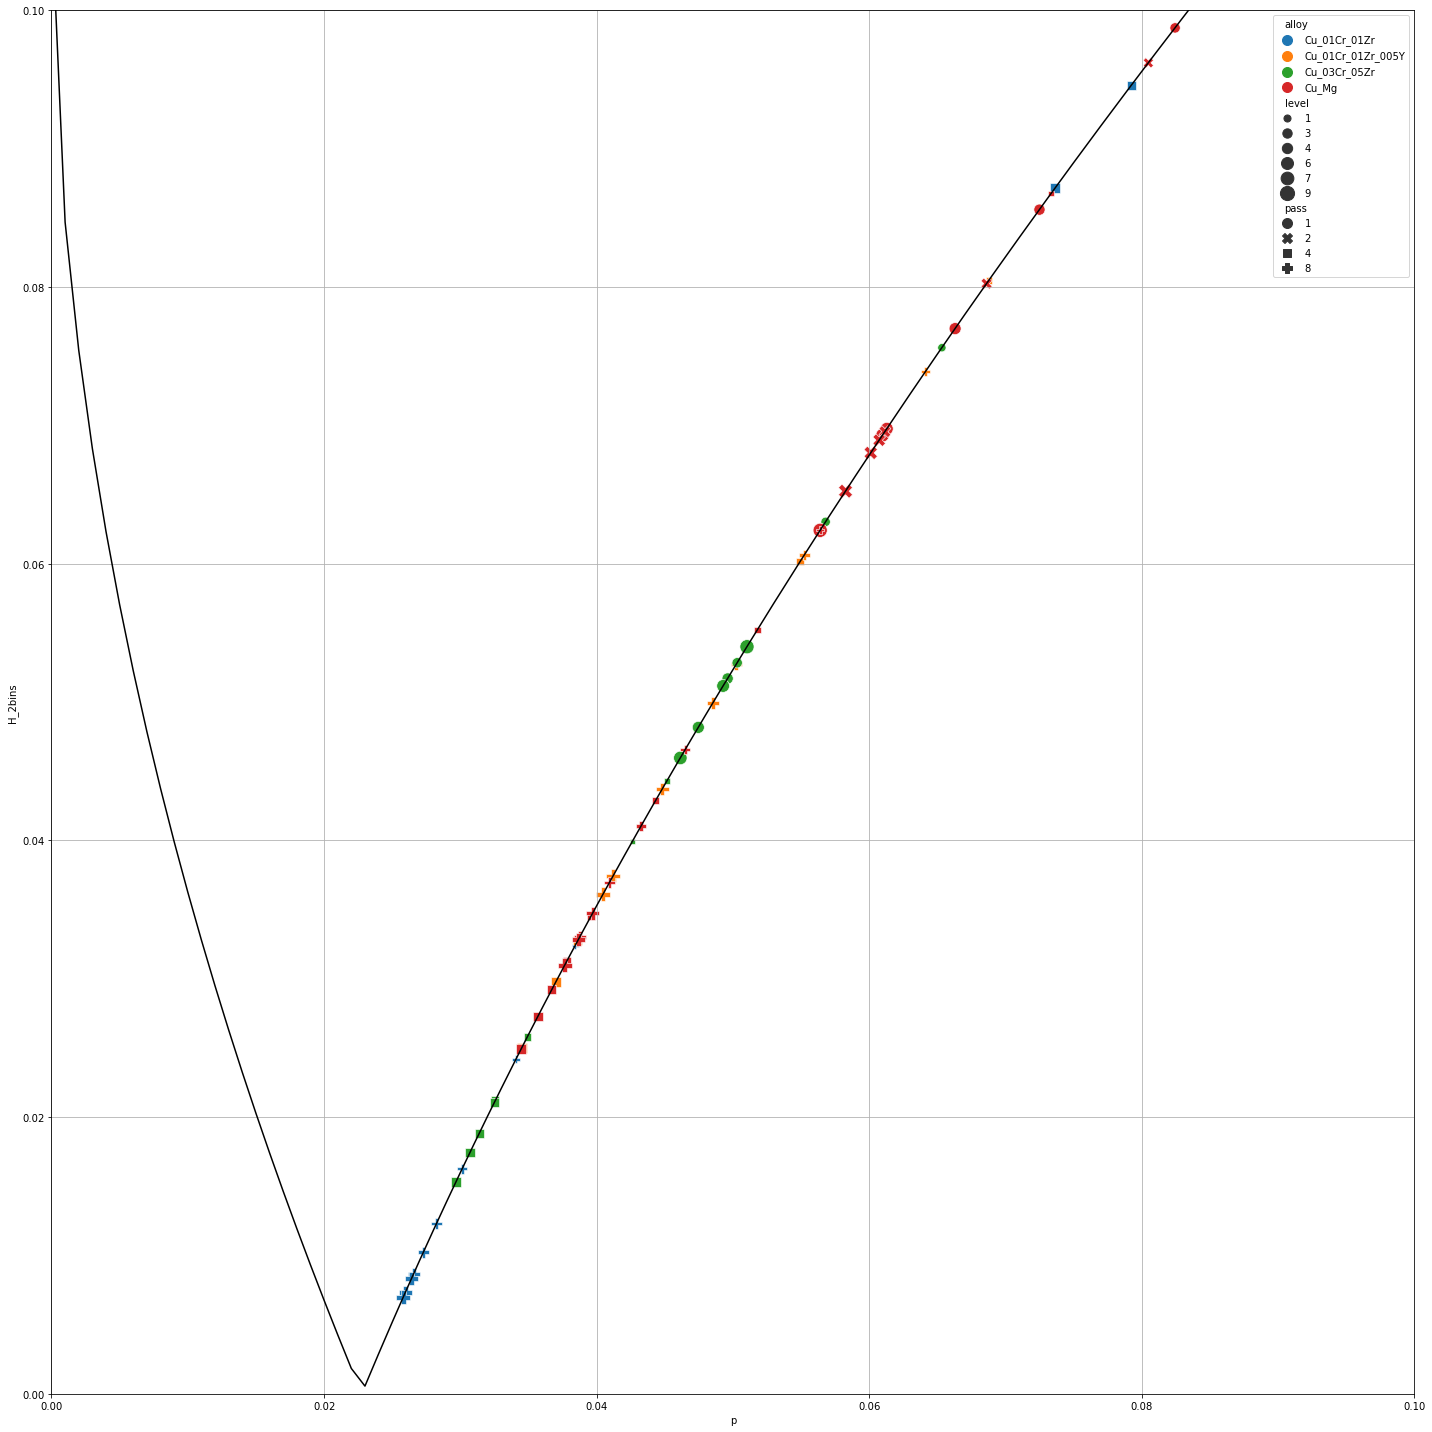

In [261]:
plt.figure(figsize=(20, 20), tight_layout=True)
sns.scatterplot(data=data_alloy[filt], x='p', y='H_2bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
plt.xlim([0, 0.1])
plt.ylim([0, 0.1])
plt.grid()
plt.savefig('H_2bins_vs_p_filt3.jpg', dpi=300)

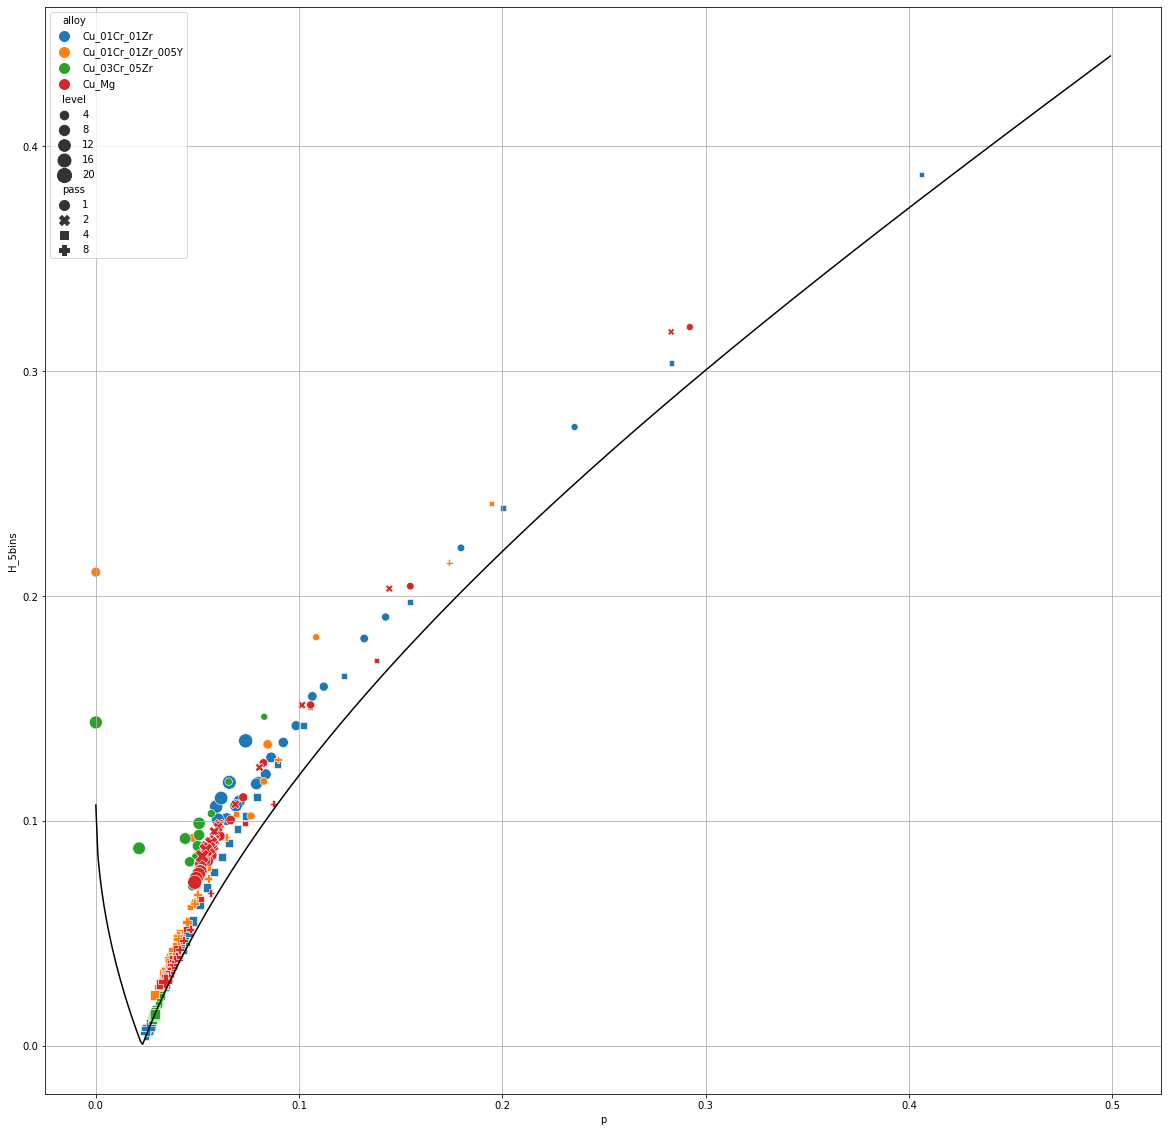

In [244]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=data_alloy, x='p', y='H_5bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
# plt.xlim([0, 0.2])
# plt.ylim([0, 0.3])
plt.grid()

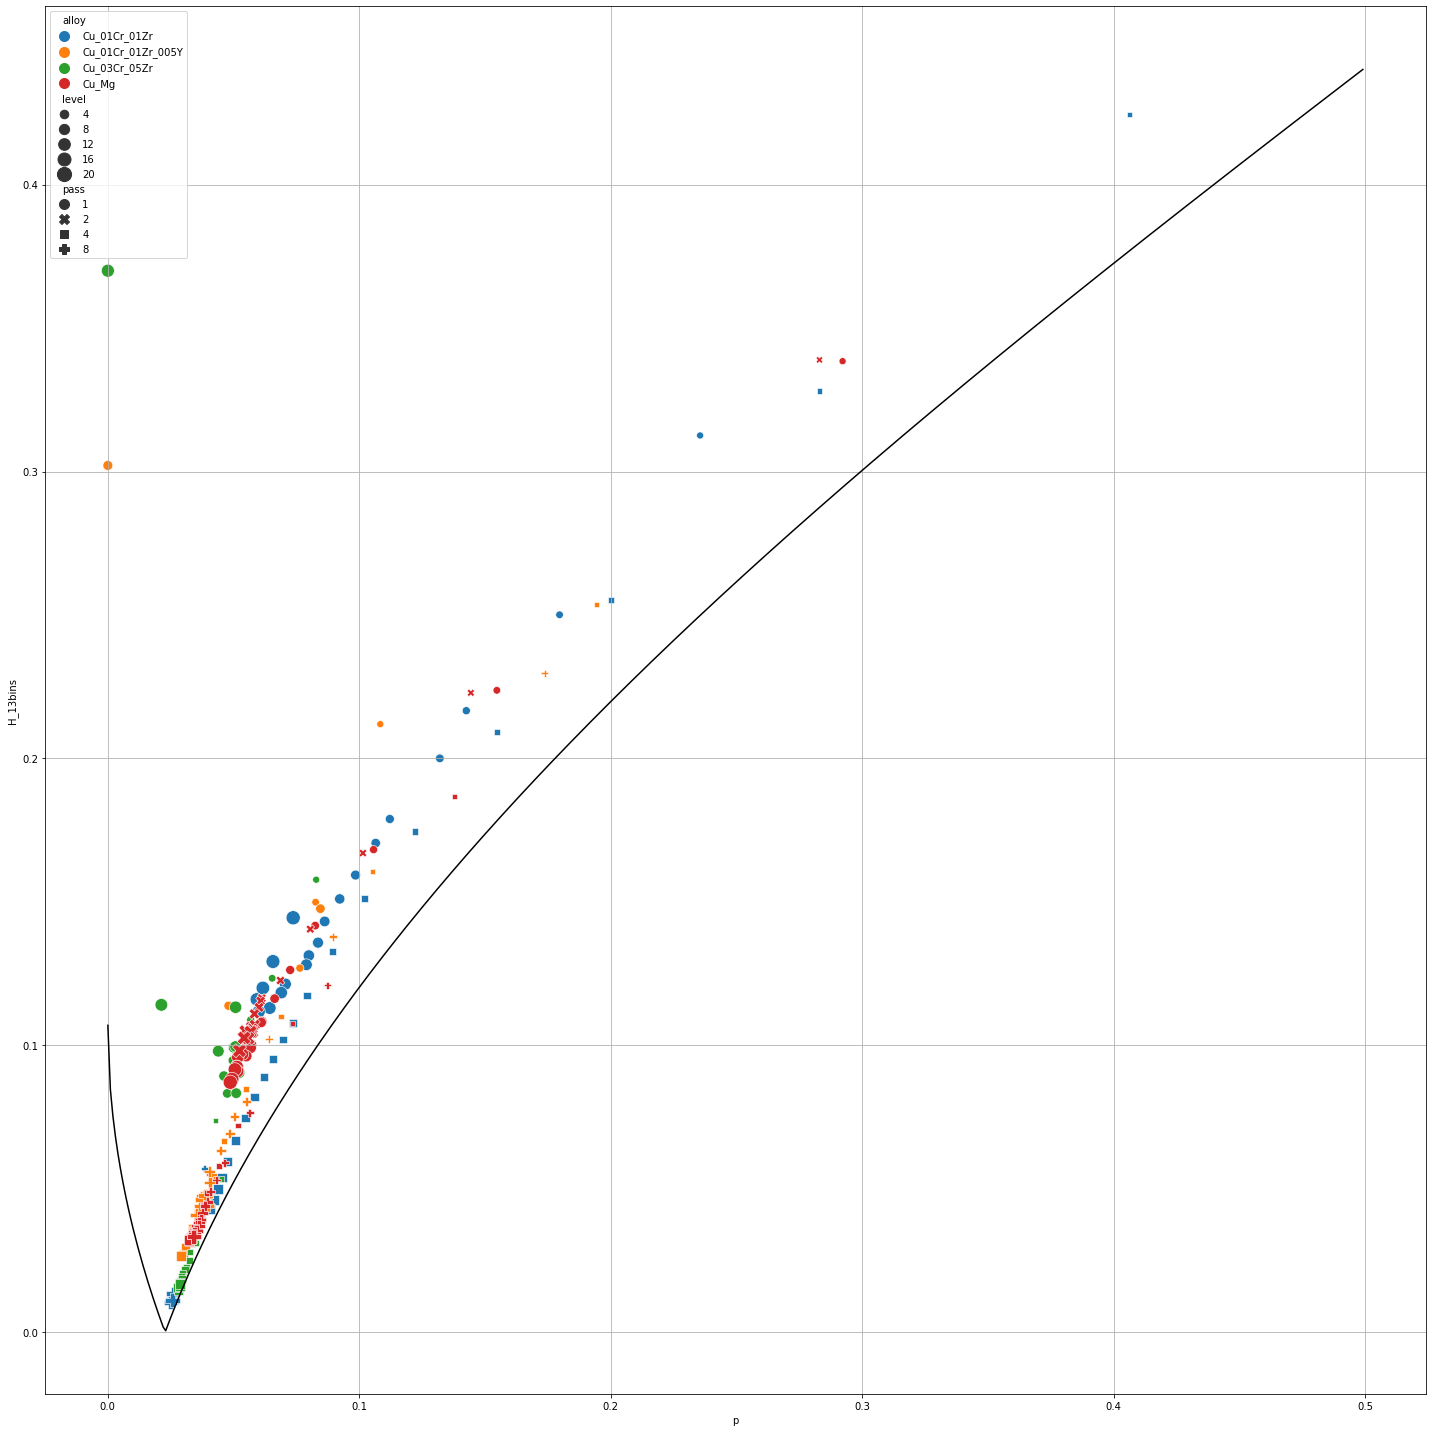

In [262]:
plt.figure(figsize=(20, 20), tight_layout=True)
sns.scatterplot(data=data_alloy, x='p', y='H_13bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
# plt.xlim([0, 0.2])
# plt.ylim([0, 0.3])
plt.grid()
plt.savefig('H_13bins_vs_p_filt.jpg', dpi=300)

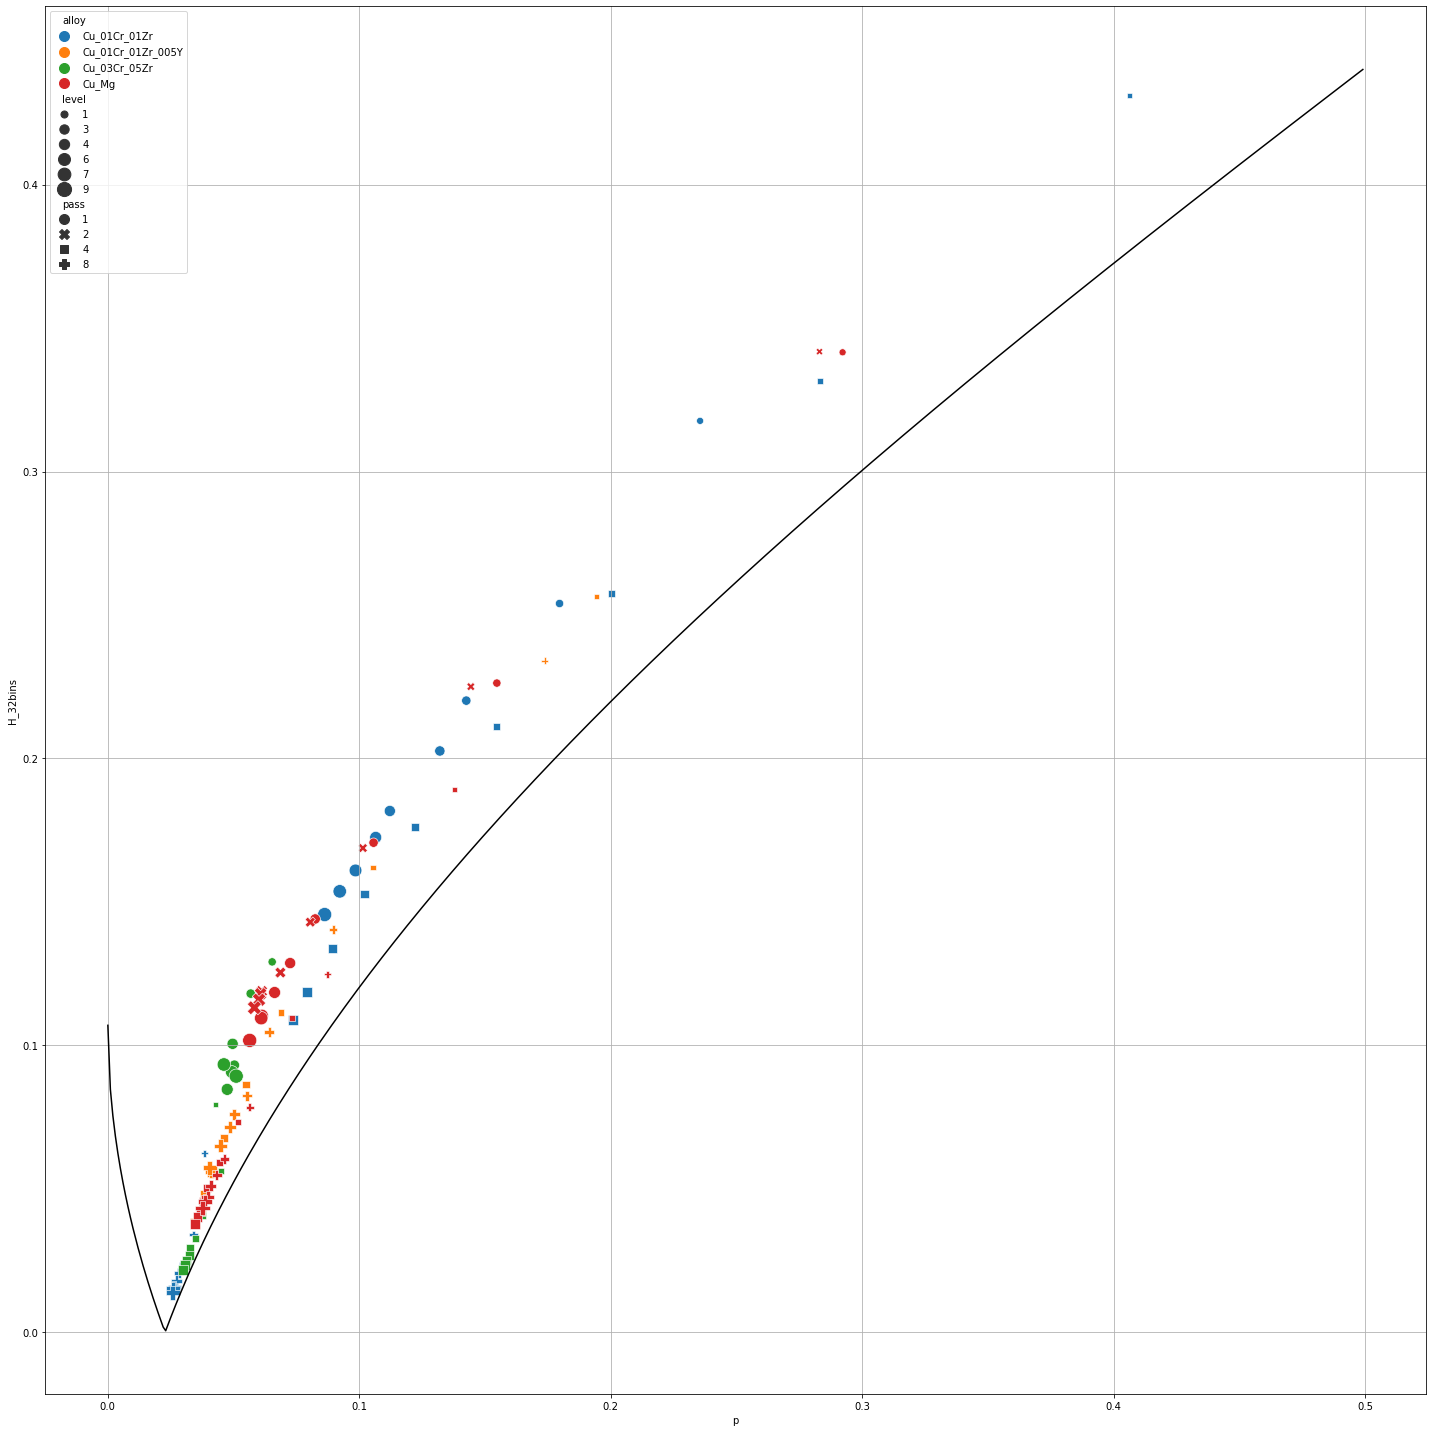

In [265]:
plt.figure(figsize=(20, 20), tight_layout=True)
sns.scatterplot(data=data_alloy[filt], x='p', y='H_32bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
# plt.xlim([0, 0.2])
# plt.ylim([0, 0.3])
plt.grid()
plt.savefig('H_32bins_vs_p_filt.jpg', dpi=300)

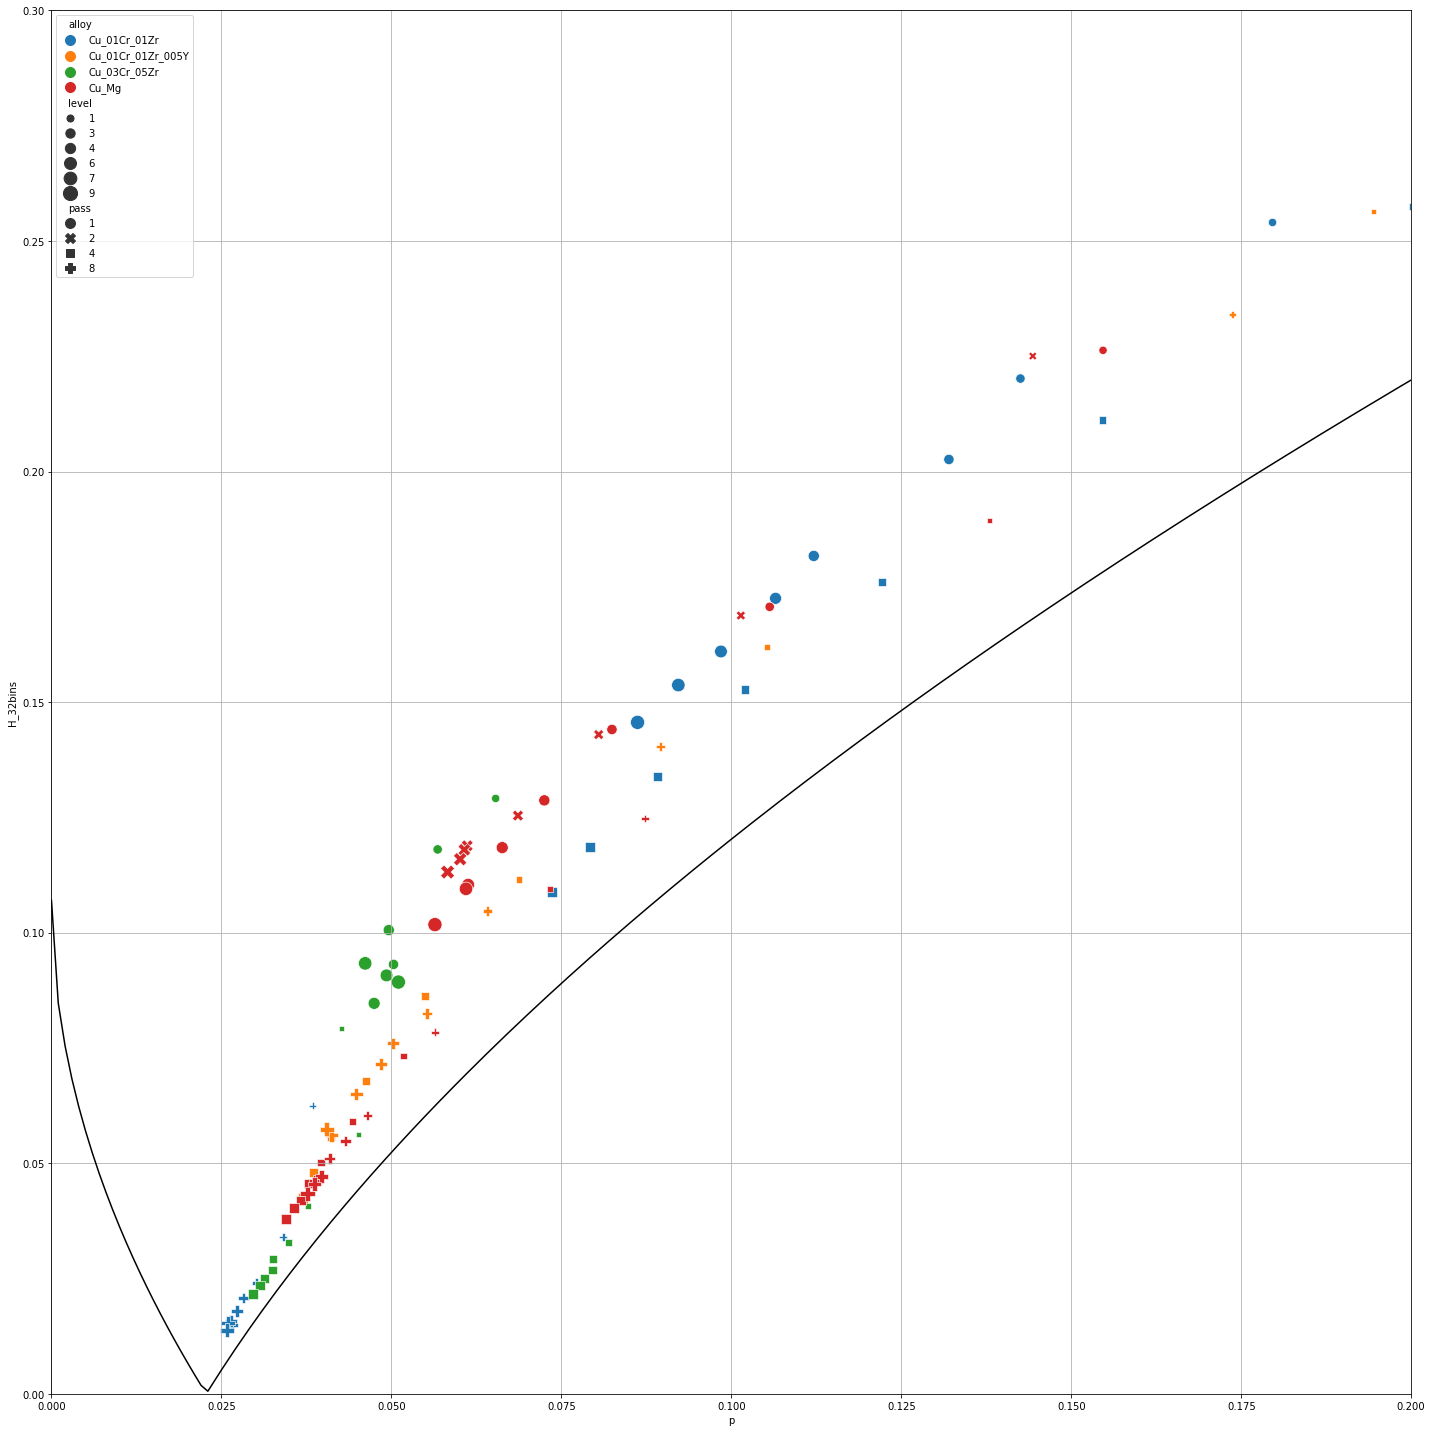

In [266]:
plt.figure(figsize=(20, 20), tight_layout=True)
sns.scatterplot(data=data_alloy[filt], x='p', y='H_32bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
plt.xlim([0, 0.2])
plt.ylim([0, 0.3])
plt.grid()
plt.savefig('H_32bins_vs_p_filt2.jpg', dpi=300)

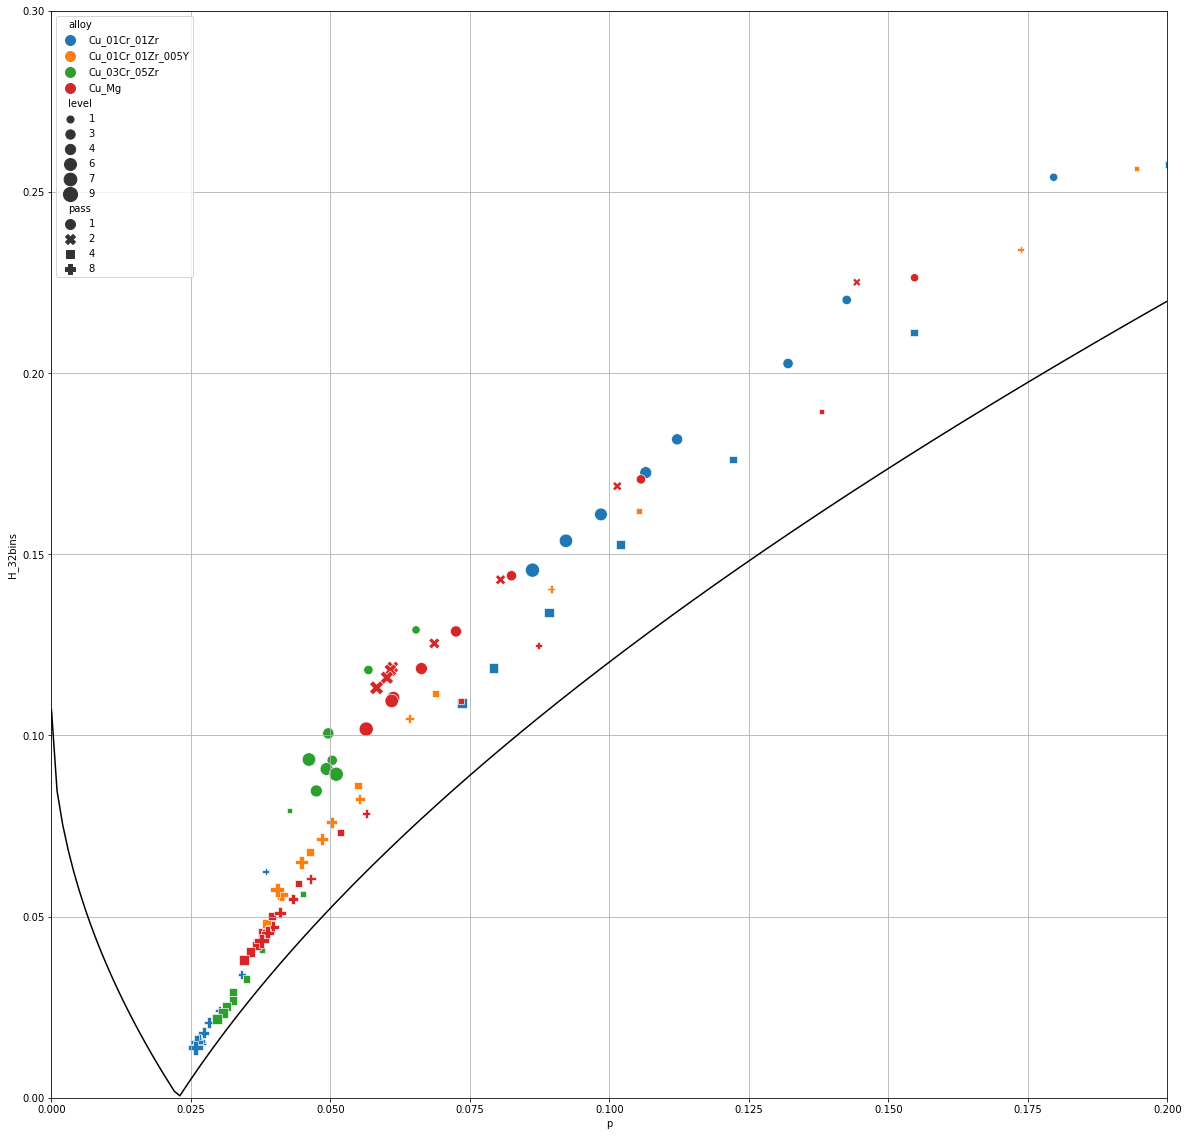

In [251]:
filt = (data_alloy['level'] < 10)&(data_alloy['N_disangles'] > 1000)
plt.figure(figsize=(20, 20))
sns.scatterplot(data=data_alloy[filt], x='p', y='H_32bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
plt.xlim([0, 0.2])
plt.ylim([0, 0.3])
plt.grid()

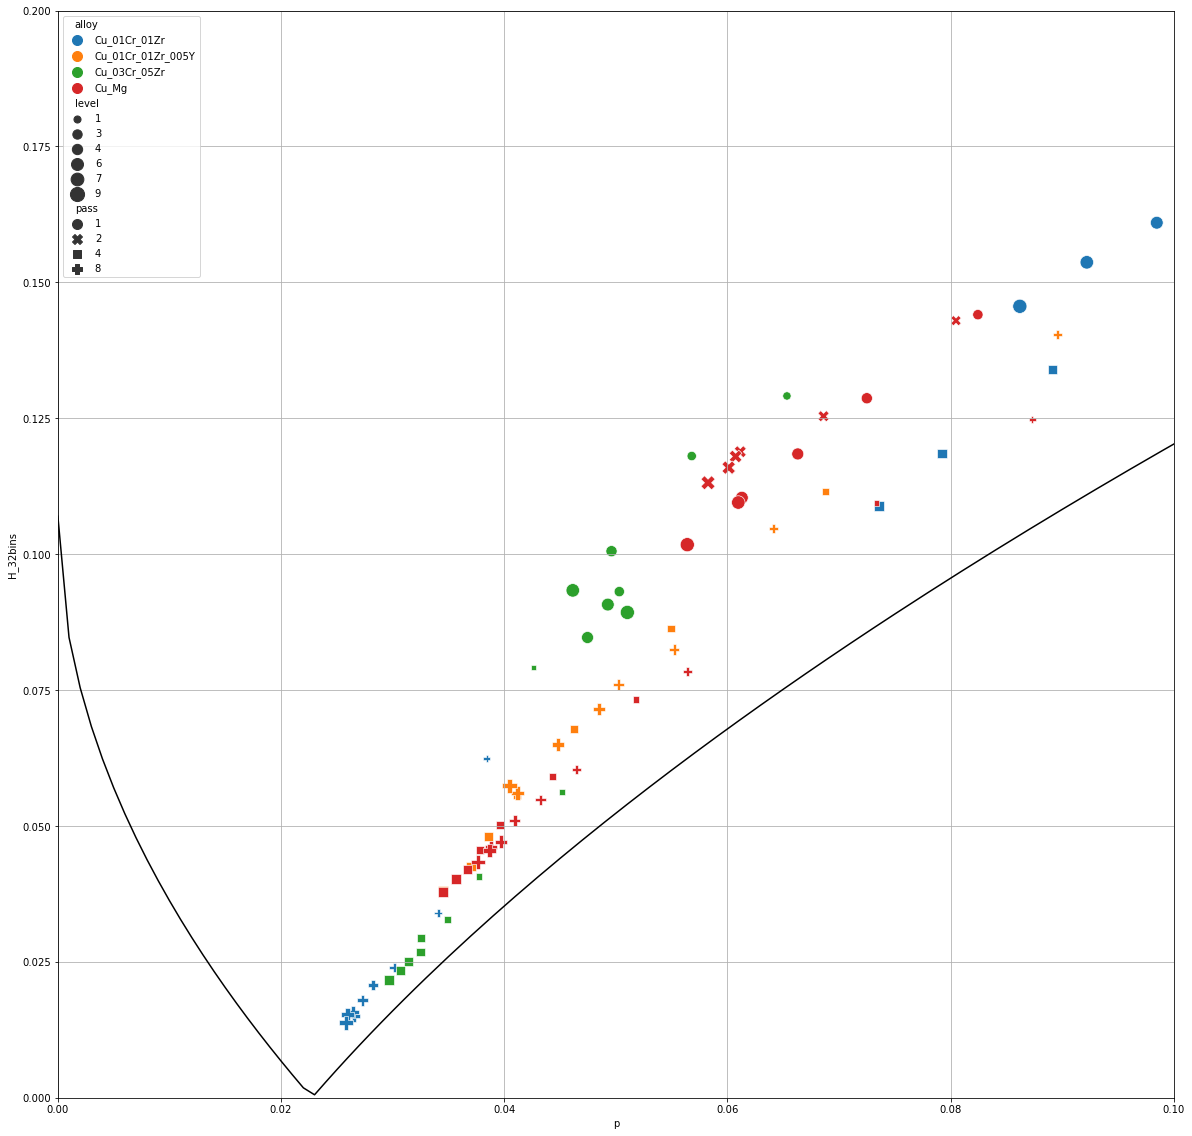

In [253]:
filt = (data_alloy['level'] < 10)&(data_alloy['N_disangles'] > 1000)
plt.figure(figsize=(20, 20))
sns.scatterplot(data=data_alloy[filt], x='p', y='H_32bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
plt.xlim([0, 0.1])
plt.ylim([0, 0.2])
plt.grid()

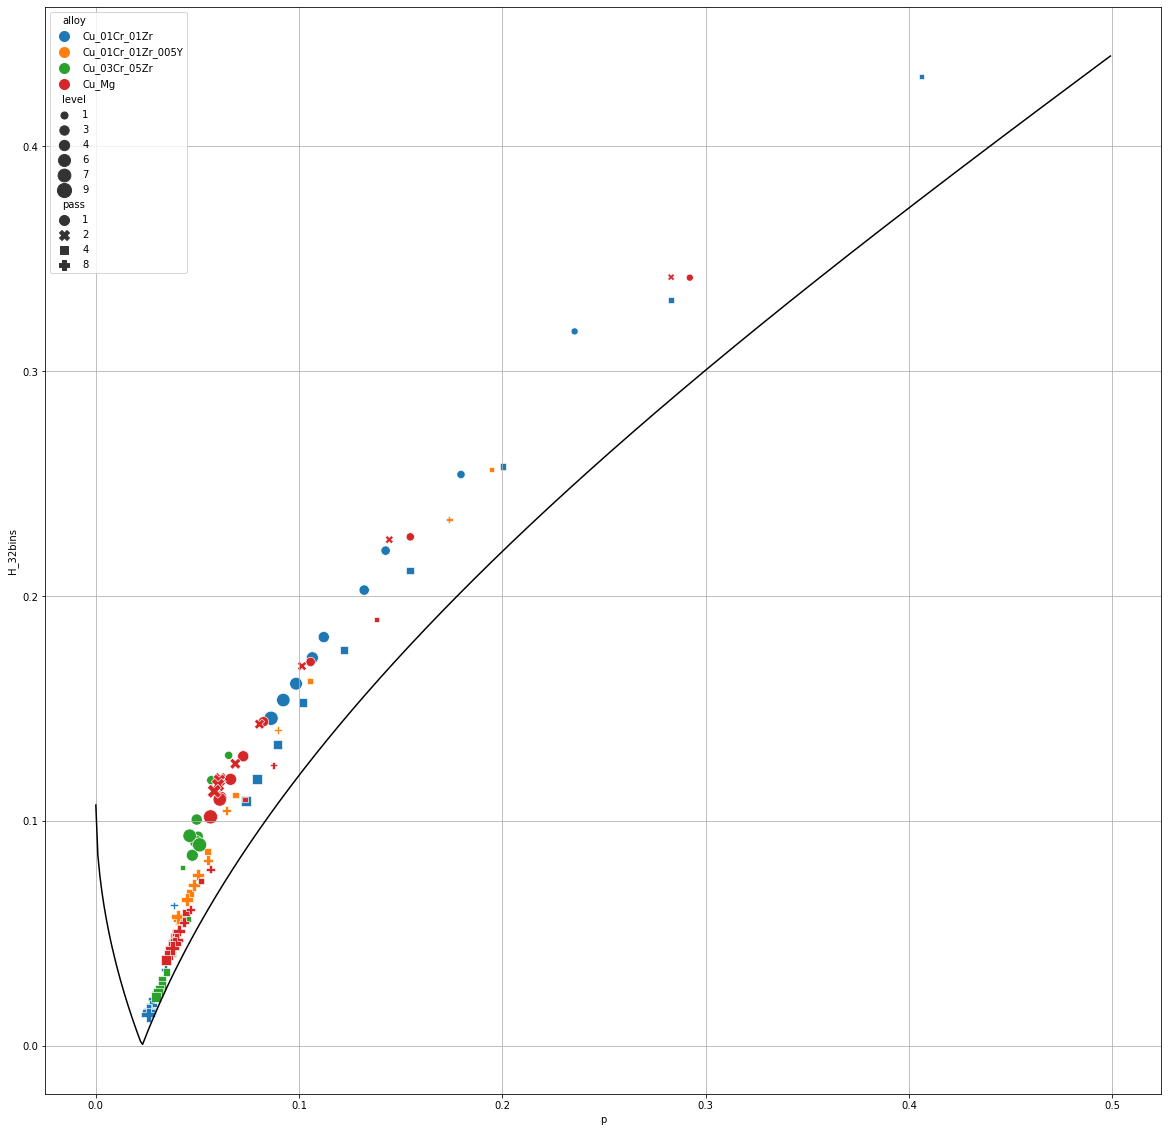

In [252]:
filt = (data_alloy['level'] < 10)&(data_alloy['N_disangles'] > 1000)
plt.figure(figsize=(20, 20))
sns.scatterplot(data=data_alloy[filt], x='p', y='H_32bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
plt.grid()

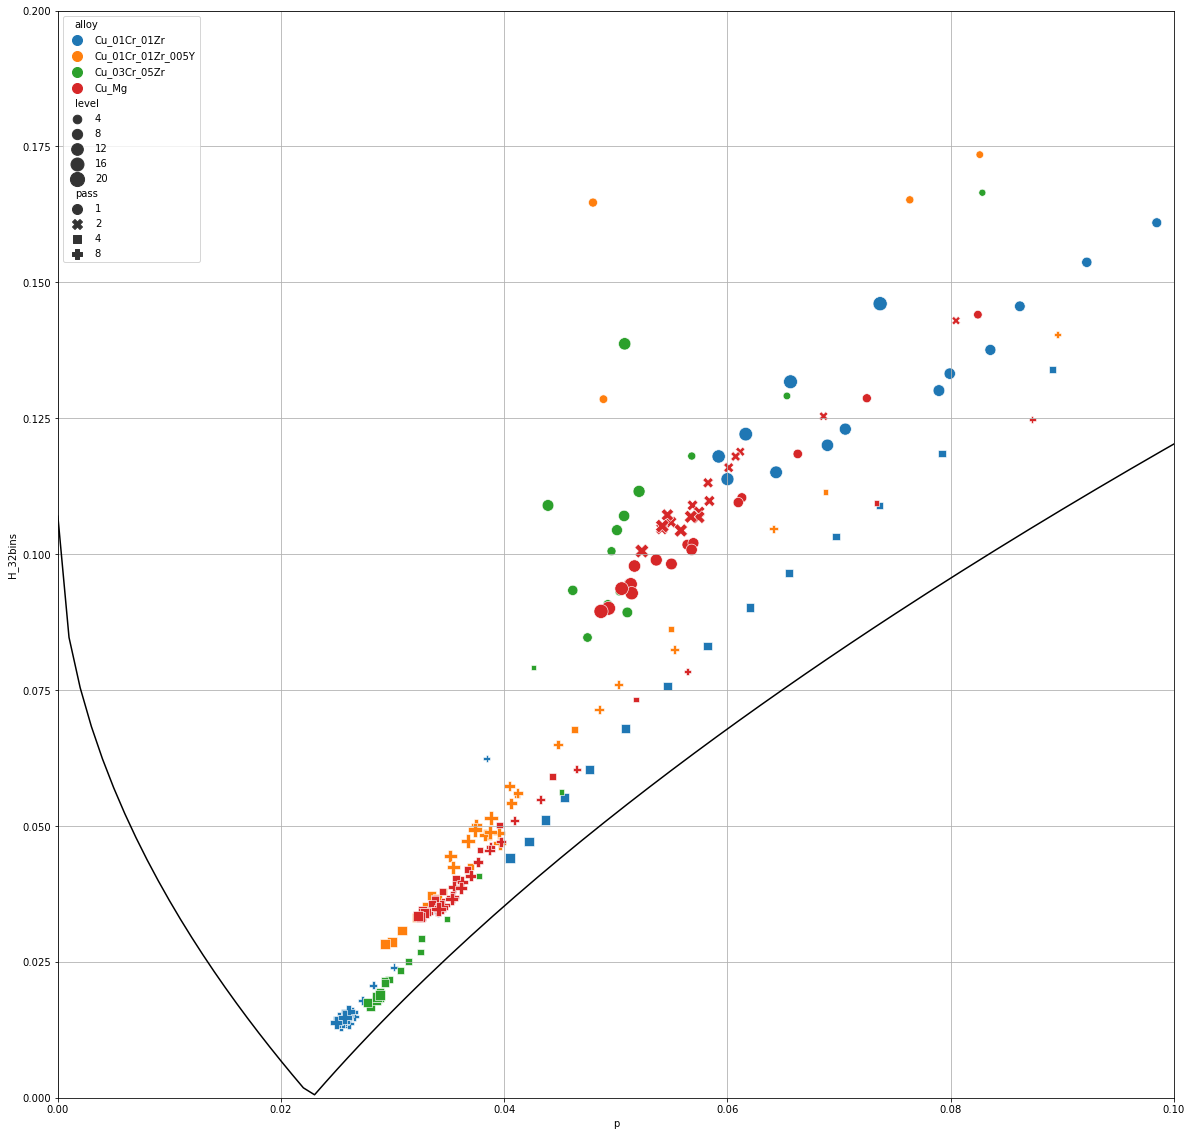

In [249]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=data_alloy, x='p', y='H_32bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
plt.xlim([0, 0.1])
plt.ylim([0, 0.2])
plt.grid()

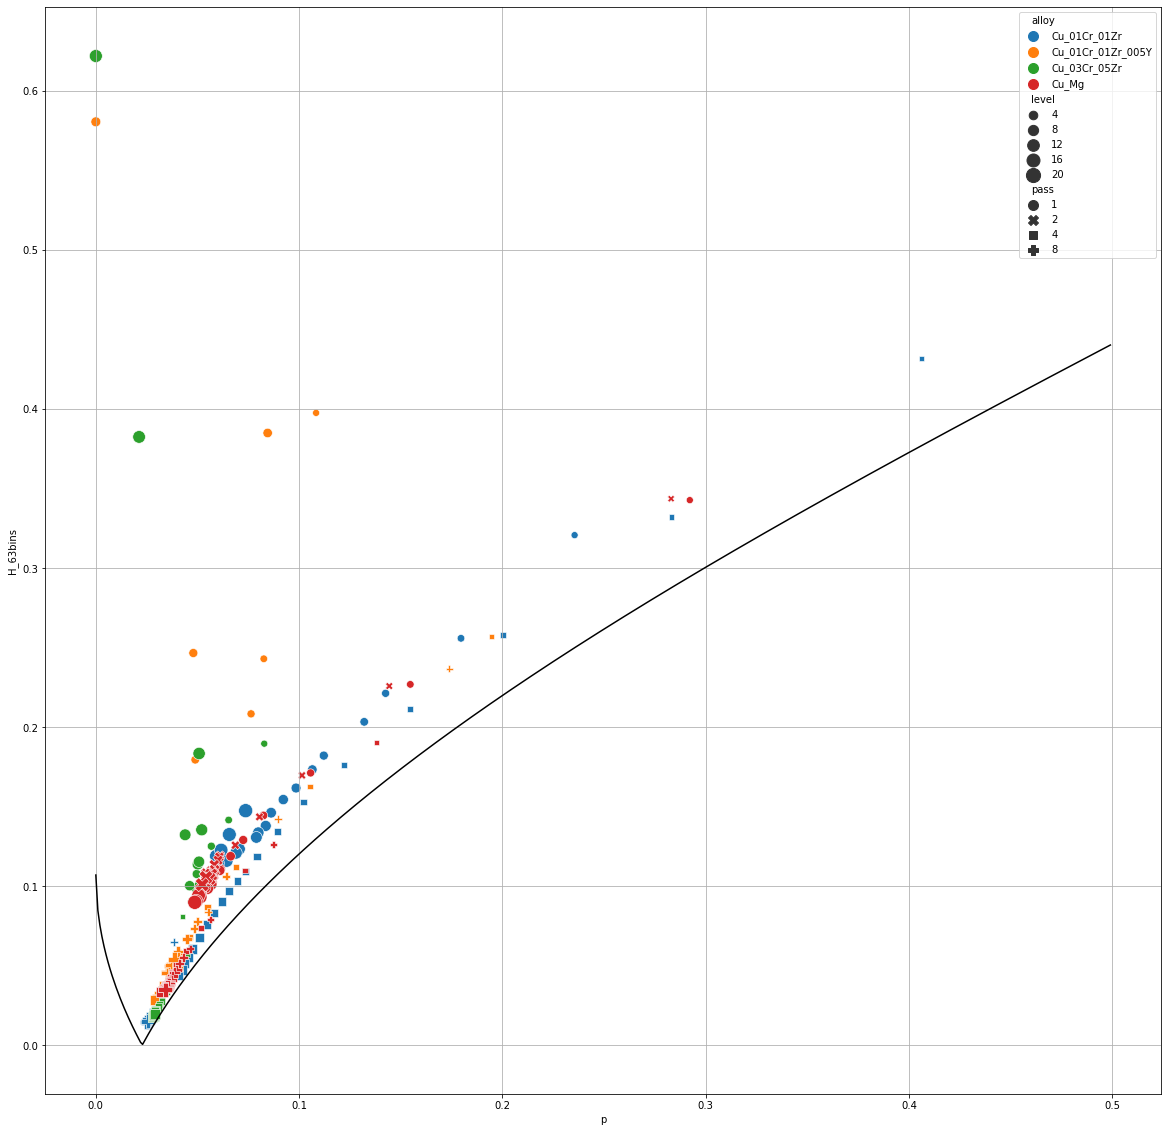

In [247]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=data_alloy, x='p', y='H_63bins', hue='alloy', size='level', style='pass')
plt.plot(x, y, 'k')
# plt.xlim([0, 0.2])
# plt.ylim([0, 0.3])
plt.grid()

In [232]:
data_alloy

,id,filename,alloy,pass,level,p,N_disangles,H_2bins,H_5bins,H_13bins,H_32bins,H_63bins
0,Cu_01Cr_01Zr_pass1_1,DataECAP/Cu_01Cr_01Zr/pass1/disangles1.txt,Cu_01Cr_01Zr,1,1,0.23548,2858,0.249838,0.275122,0.312578,0.317661,0.320646
1,Cu_01Cr_01Zr_pass1_2,DataECAP/Cu_01Cr_01Zr/pass1/disangles2.txt,Cu_01Cr_01Zr,1,2,0.17960,6598,0.201651,0.221387,0.250090,0.254014,0.255788
2,Cu_01Cr_01Zr_pass1_3,DataECAP/Cu_01Cr_01Zr/pass1/disangles3.txt,Cu_01Cr_01Zr,1,3,0.14252,11163,0.166237,0.190621,0.216656,0.220165,0.221214
3,Cu_01Cr_01Zr_pass1_4,DataECAP/Cu_01Cr_01Zr/pass1/disangles4.txt,Cu_01Cr_01Zr,1,4,0.13200,15992,0.155497,0.181072,0.200042,0.202618,0.203285
4,Cu_01Cr_01Zr_pass1_5,DataECAP/Cu_01Cr_01Zr/pass1/disangles5.txt,Cu_01Cr_01Zr,1,5,0.11212,20647,0.134122,0.159668,0.178905,0.181700,0.182066
...,...,...,...,...,...,...,...,...,...,...,...,...
218,Cu_Mg_pass8_16,DataECAP/Cu_Mg/pass8/disangles16.txt,Cu_Mg,8,16,0.03398,591422,0.023985,0.028759,0.033238,0.034697,0.034902
219,Cu_Mg_pass8_17,DataECAP/Cu_Mg/pass8/disangles17.txt,Cu_Mg,8,17,0.03417,621442,0.024355,0.028707,0.033127,0.034633,0.034859
220,Cu_Mg_pass8_18,DataECAP/Cu_Mg/pass8/disangles18.txt,Cu_Mg,8,18,0.03453,649145,0.025054,0.029567,0.034240,0.035466,0.035631
221,Cu_Mg_pass8_19,DataECAP/Cu_Mg/pass8/disangles19.txt,Cu_Mg,8,19,0.03437,675629,0.024743,0.029123,0.033600,0.035050,0.035271


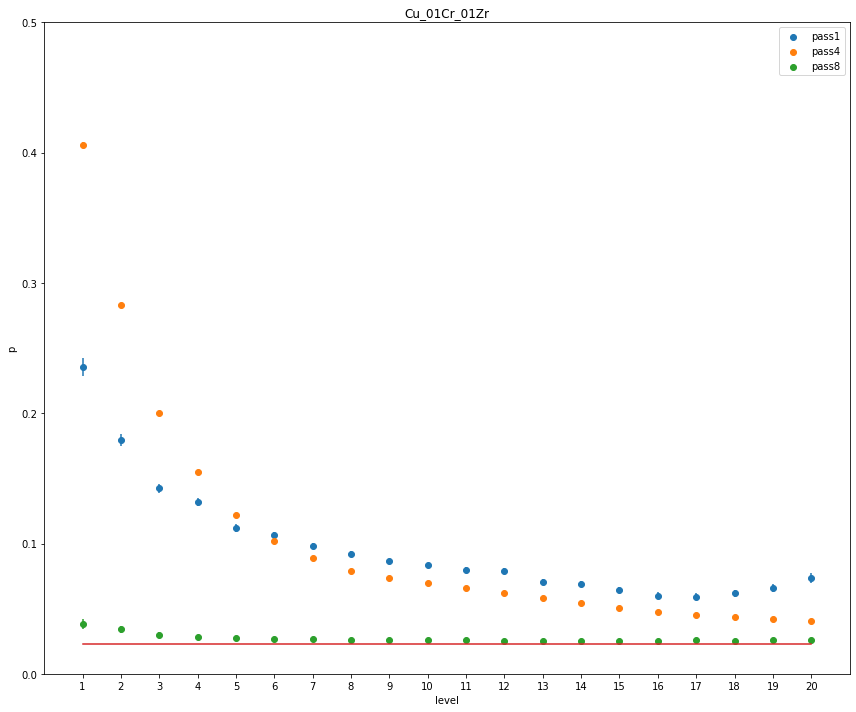

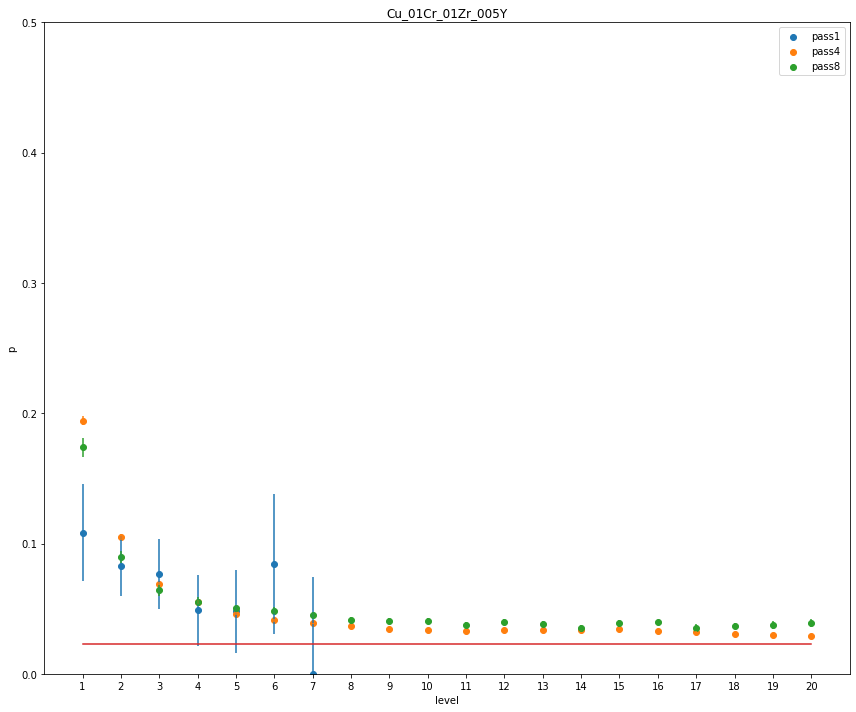

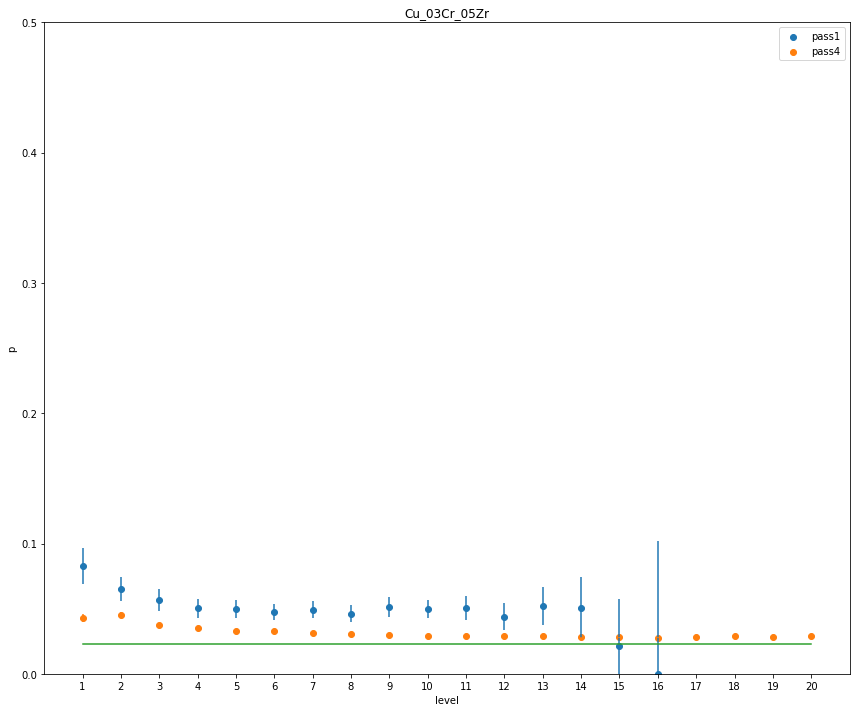

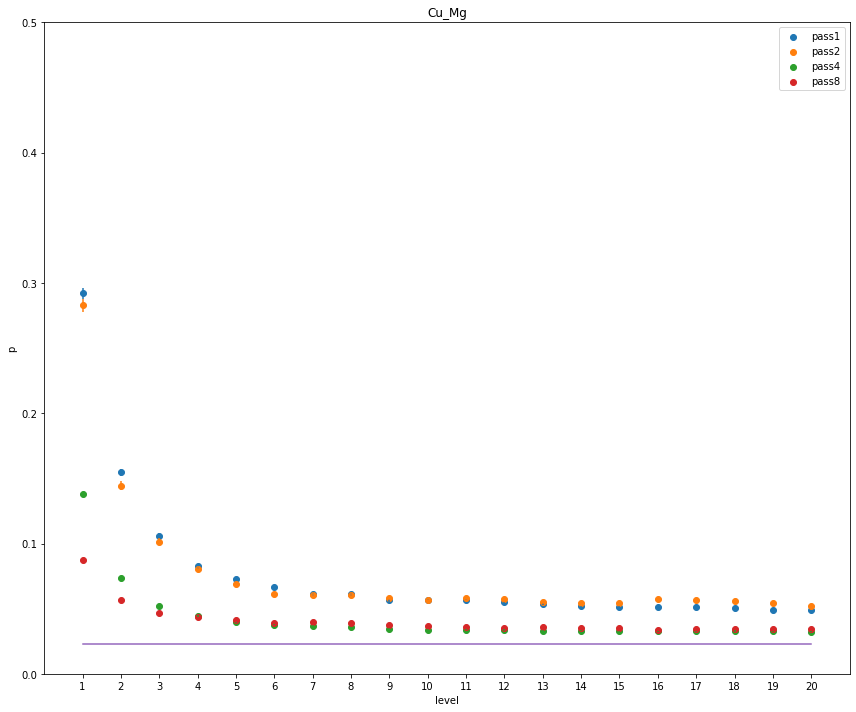

In [141]:
for alloy in data_alloy['alloy'].unique().tolist():
    fig, ax = plt.subplots(figsize=(12,10), tight_layout=True)
    for pass_ in [1, 2, 4, 8]:
        #plt.figure(figsize=(12,10))
        x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
        y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'p'].tolist()
        Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
        if x:
            ax.scatter(x, y, label=f'pass{pass_}')
            ax.errorbar(x, y, yerr=[2.56*stds[N_disangles] if N_disangles < 100000 else 0.0005 for N_disangles in Ns ], linestyle='')
        
    ax.plot([*range(1,21)], [0.02277]*20)
    ax.set_title(alloy)
    ax.set_xlim([0, 21])
    ax.set_xticks([*range(1,21)])
    ax.set_xlabel('level')
    ax.set_ylim([0, 0.5])
    ax.set_ylabel('p')
    ax.legend()
    plt.savefig('p_' + alloy +'.jpg')
    plt.show()

In [273]:
colors = {
    1: 'C0',
    2: 'C3',
    4: 'C1',
    8: 'C2'
}

In [270]:
mpl.rcParams['lines.markersize'] = 6

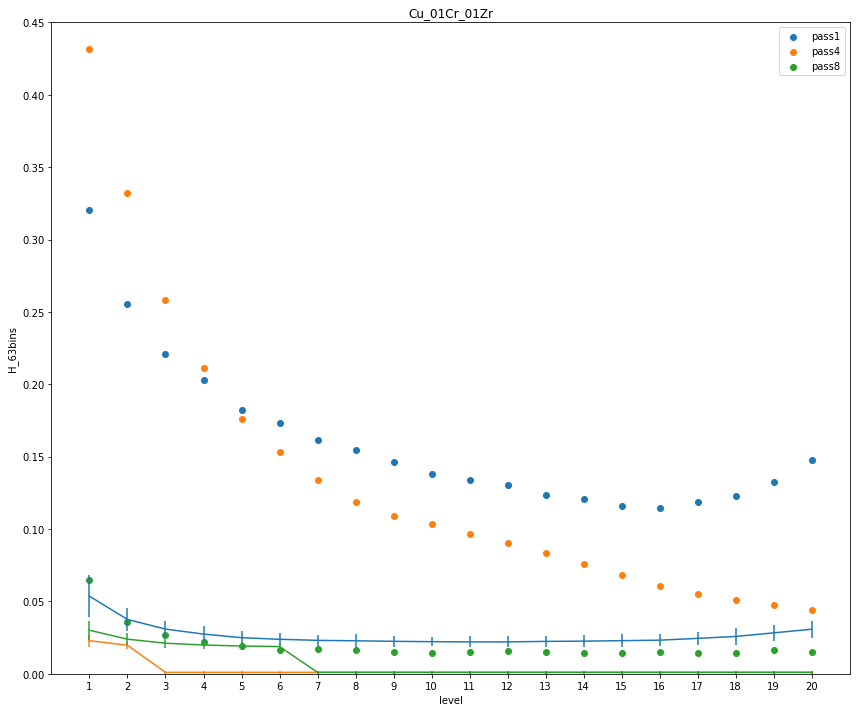

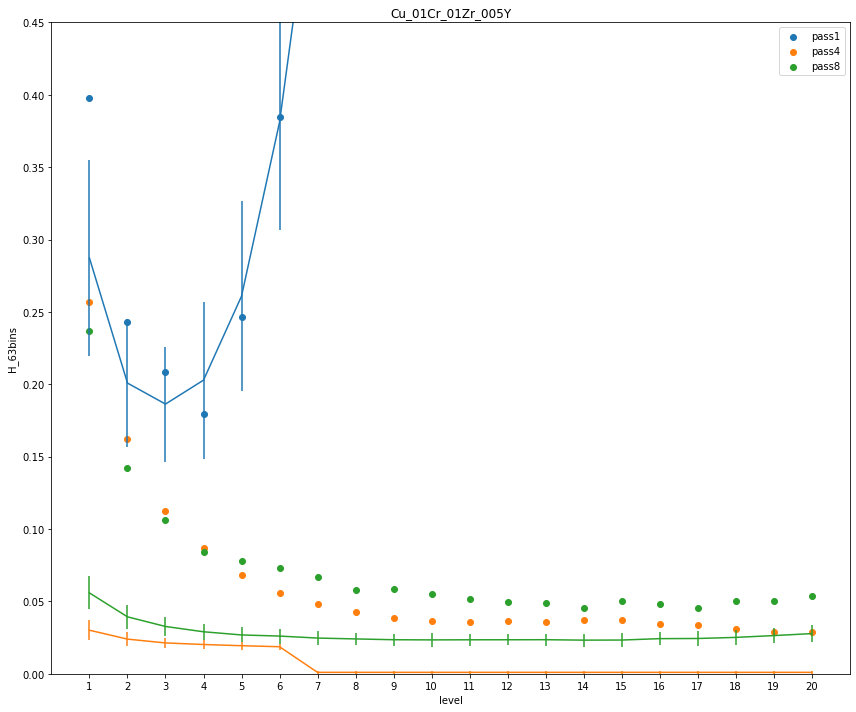

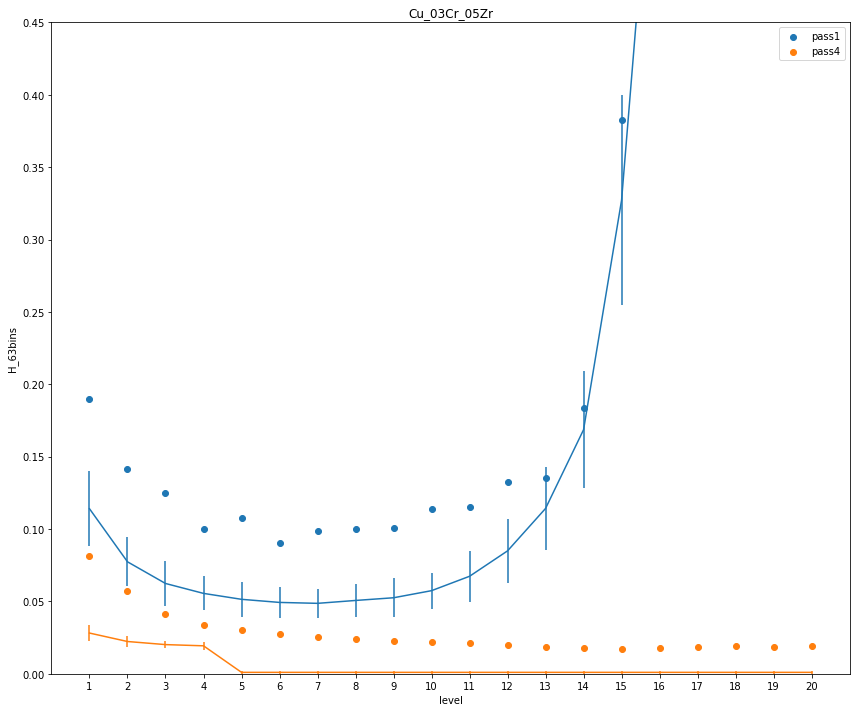

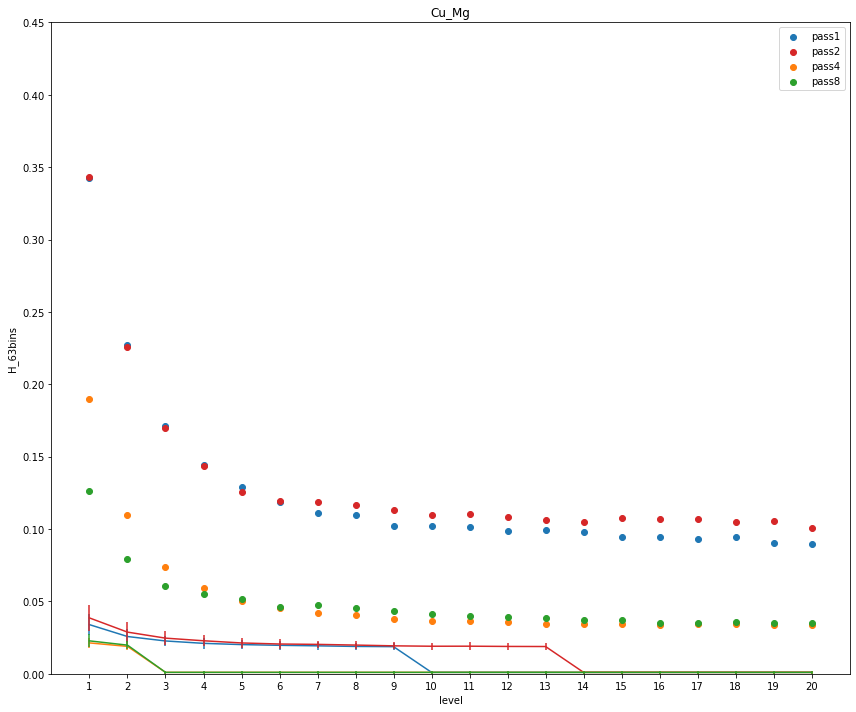

In [275]:
feature = 'H_63bins'

for alloy in data_alloy['alloy'].unique().tolist():
    fig, ax = plt.subplots(figsize=(12,10), tight_layout=True)
    for pass_ in [1, 2, 4, 8]:
        #plt.figure(figsize=(12,10))
        x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
        y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), feature].tolist()
        Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
        if x:
            ax.scatter(x, y, label=f'pass{pass_}', color=colors[pass_])
            y_random = [all_means[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns]
            ax.errorbar(x, y_random, yerr=[2.56*all_stds[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns], color=colors[pass_], linestyle='')
            ax.plot(x, y_random, color=colors[pass_])
            
    ax.set_title(alloy)
    ax.set_xlim([0, 21])
    ax.set_xticks([*range(1,21)])
    ax.set_xlabel('level')
    ax.set_ylim([0, 0.45])
    ax.set_ylabel(feature)
    ax.legend()
    plt.savefig(feature + '_' + alloy +'.jpg')

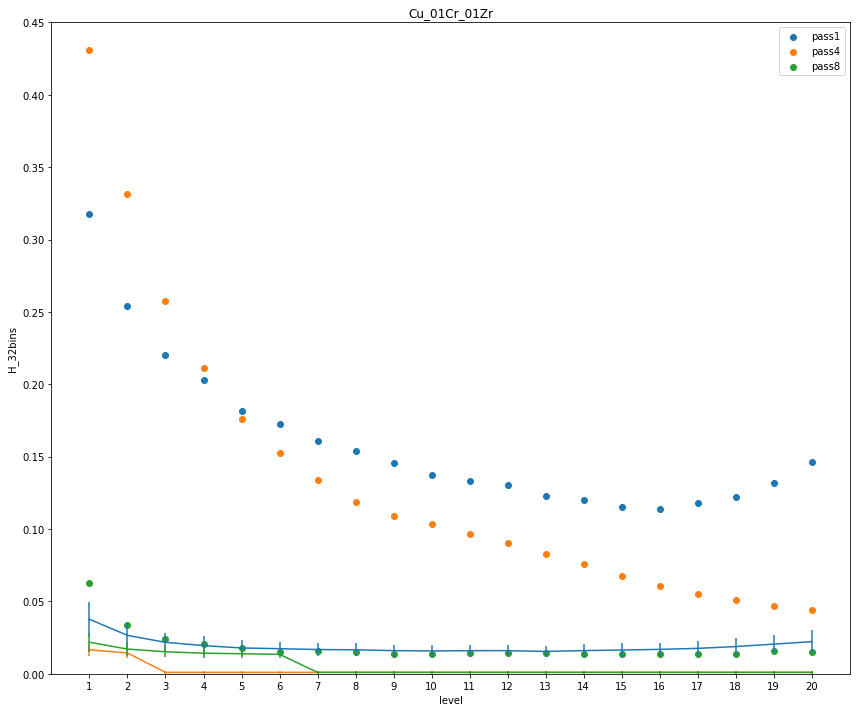

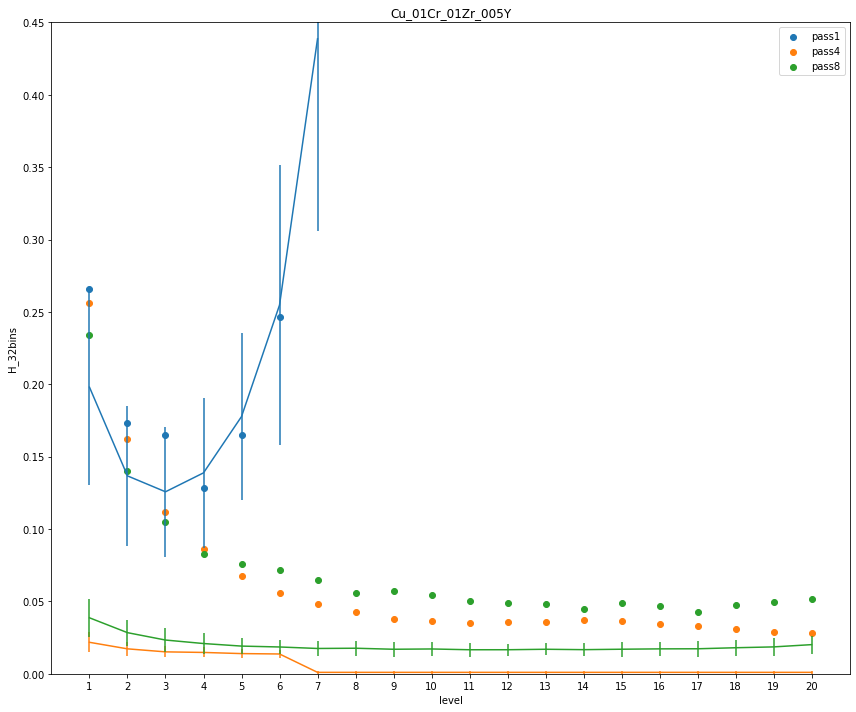

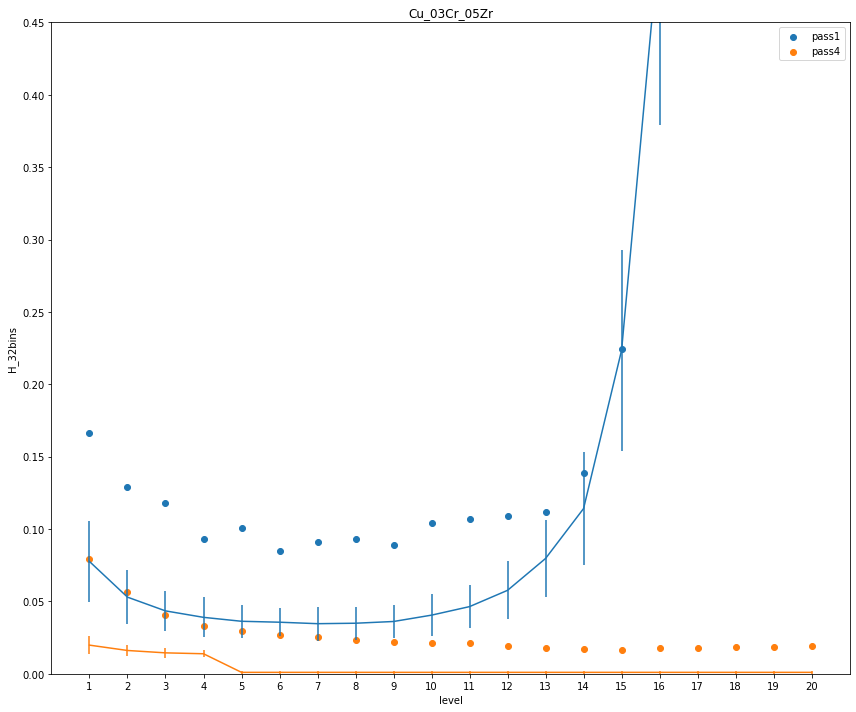

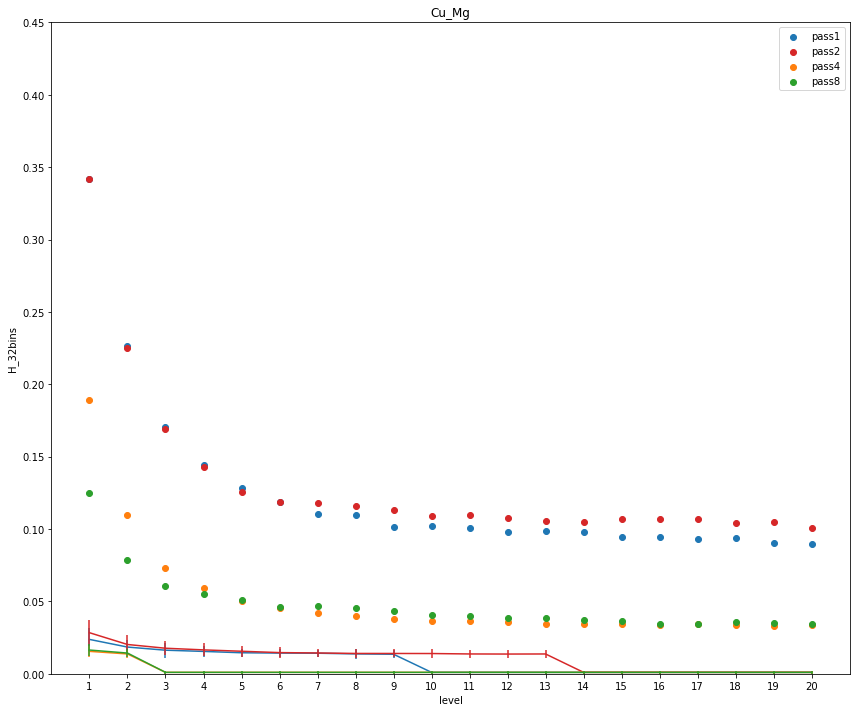

In [279]:
feature = 'H_32bins'

for alloy in data_alloy['alloy'].unique().tolist():
    fig, ax = plt.subplots(figsize=(12,10), tight_layout=True)
    for pass_ in [1, 2, 4, 8]:
        #plt.figure(figsize=(12,10))
        x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
        y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), feature].tolist()
        Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
        if x:
            ax.scatter(x, y, label=f'pass{pass_}', color=colors[pass_])
            y_random = [all_means[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns]
            ax.errorbar(x, y_random, yerr=[2.56*all_stds[N_disangles][feature] if N_disangles < 100000 else all_stds[100000][feature] for N_disangles in Ns], color=colors[pass_], linestyle='')
            ax.plot(x, y_random, color=colors[pass_])
            
    ax.set_title(alloy)
    ax.set_xlim([0, 21])
    ax.set_xticks([*range(1,21)])
    ax.set_xlabel('level')
    ax.set_ylim([0, 0.45])
    ax.set_ylabel(feature)
    ax.legend()
    plt.savefig(feature + '_' + alloy +'.jpg')

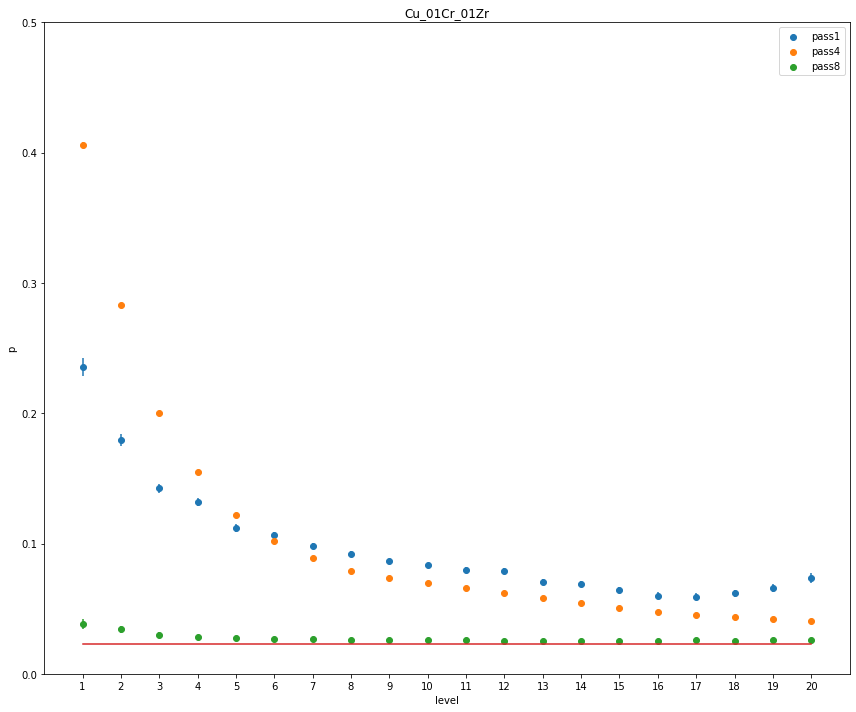

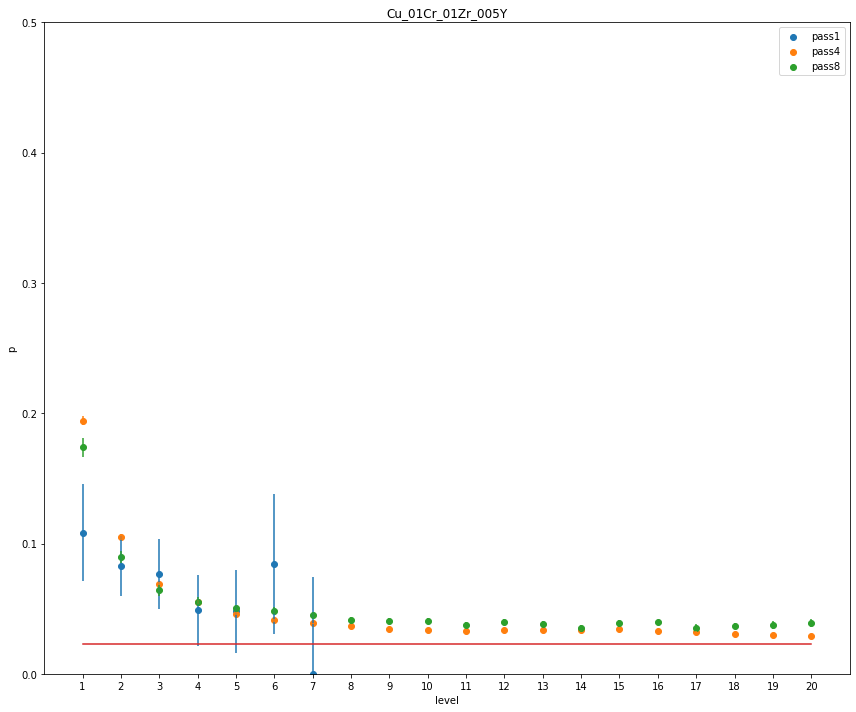

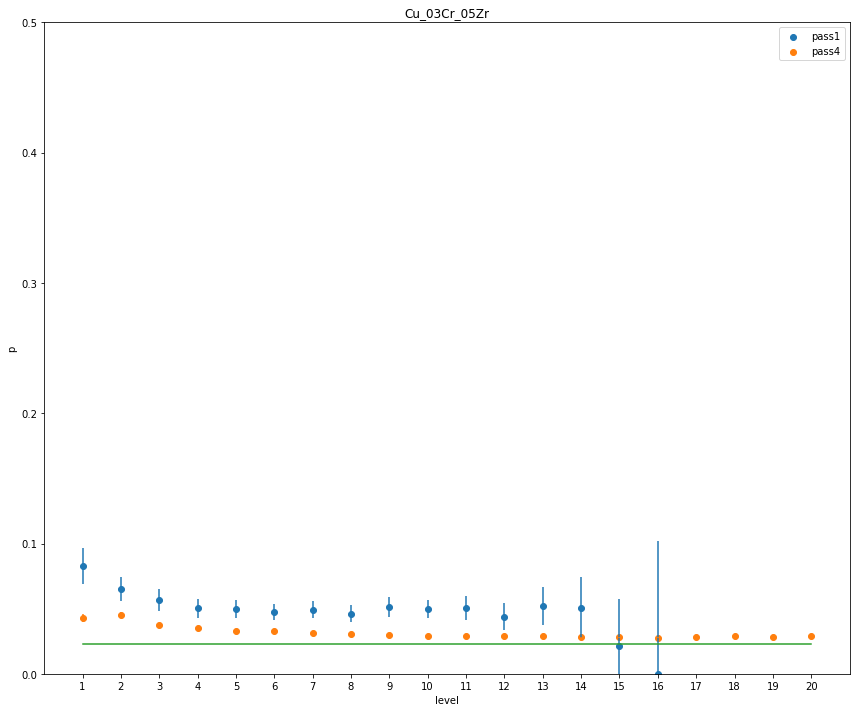

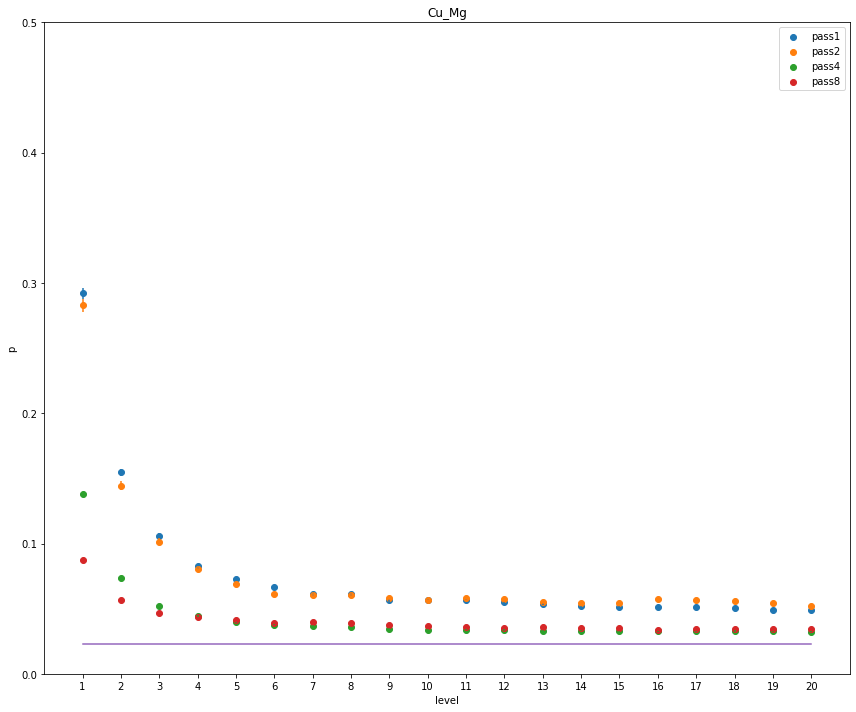

In [141]:
for alloy in data_alloy['alloy'].unique().tolist():
    fig, ax = plt.subplots(figsize=(12,10), tight_layout=True)
    for pass_ in [1, 2, 4, 8]:
        #plt.figure(figsize=(12,10))
        x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
        y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'p'].tolist()
        Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
        if x:
            ax.scatter(x, y, label=f'pass{pass_}')
            ax.errorbar(x, y, yerr=[2.56*stds[N_disangles] if N_disangles < 100000 else 0.0005 for N_disangles in Ns ], linestyle='')
        
    ax.plot([*range(1,21)], [0.02277]*20)
    ax.set_title(alloy)
    ax.set_xlim([0, 21])
    ax.set_xticks([*range(1,21)])
    ax.set_xlabel('level')
    ax.set_ylim([0, 0.5])
    ax.set_ylabel('p')
    ax.legend()
    plt.savefig('p_' + alloy +'.jpg')
    plt.show()

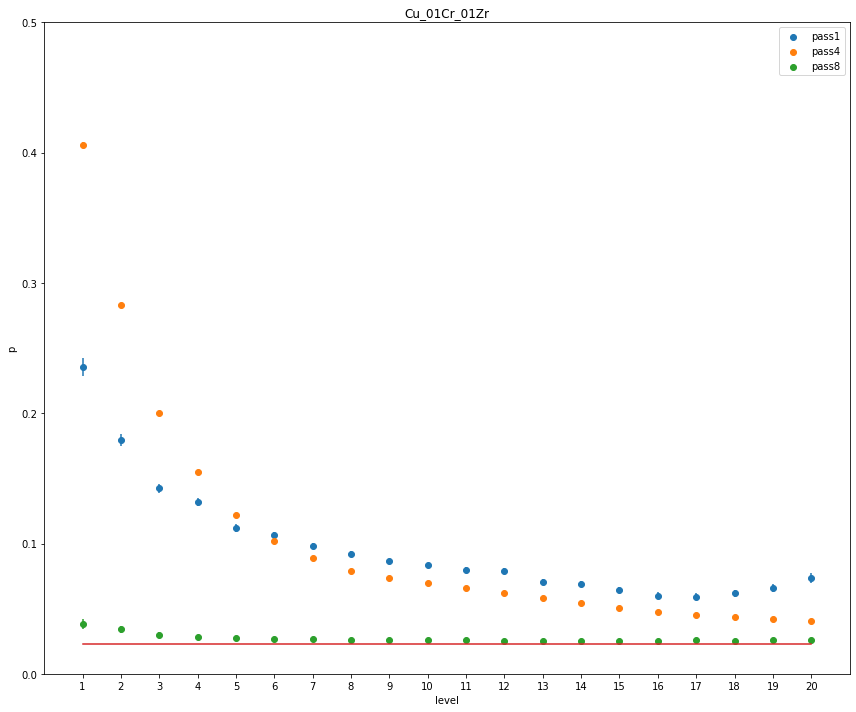

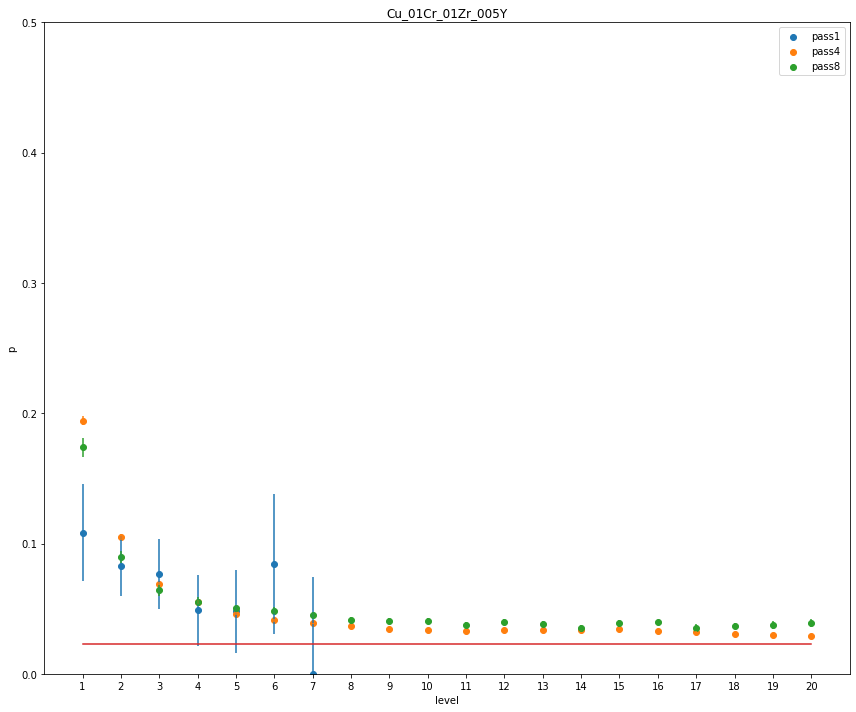

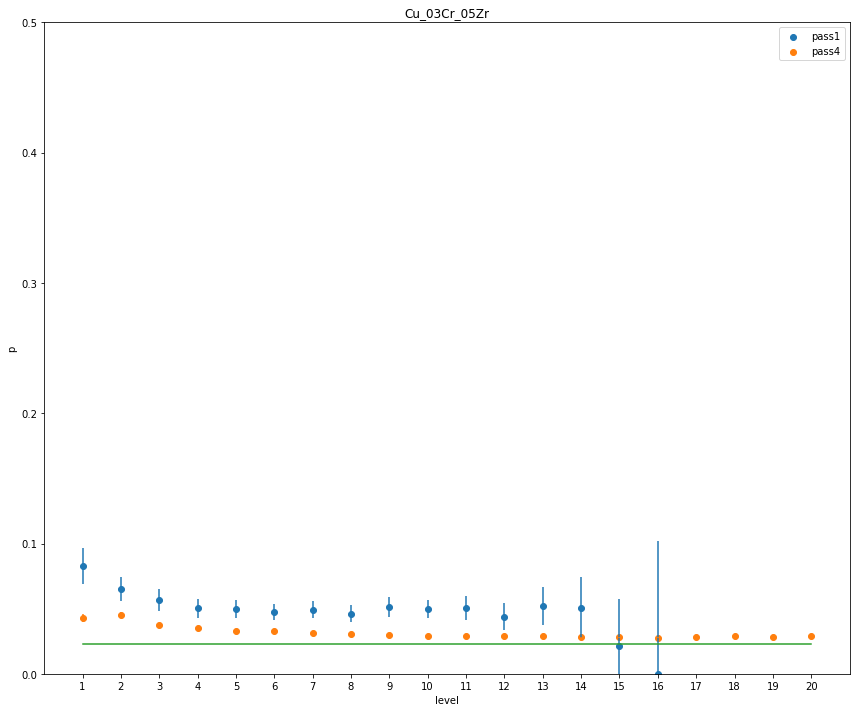

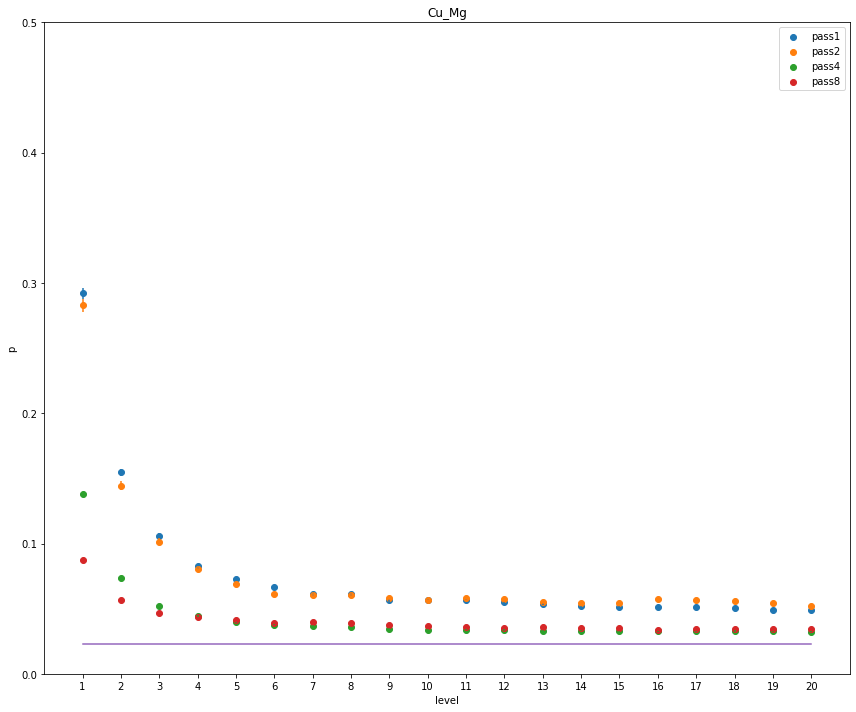

In [141]:
for alloy in data_alloy['alloy'].unique().tolist():
    fig, ax = plt.subplots(figsize=(12,10), tight_layout=True)
    for pass_ in [1, 2, 4, 8]:
        #plt.figure(figsize=(12,10))
        x = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'level'].tolist()
        y = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'p'].tolist()
        Ns = data_alloy.loc[(data_alloy['alloy']==alloy)&(data_alloy['pass']==pass_), 'N_disangles'].tolist()
        if x:
            ax.scatter(x, y, label=f'pass{pass_}')
            ax.errorbar(x, y, yerr=[2.56*stds[N_disangles] if N_disangles < 100000 else 0.0005 for N_disangles in Ns ], linestyle='')
        
    ax.plot([*range(1,21)], [0.02277]*20)
    ax.set_title(alloy)
    ax.set_xlim([0, 21])
    ax.set_xticks([*range(1,21)])
    ax.set_xlabel('level')
    ax.set_ylim([0, 0.5])
    ax.set_ylabel('p')
    ax.legend()
    plt.savefig('p_' + alloy +'.jpg')
    plt.show()

In [2]:
data = pd.read_csv('Data2.csv')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alloy                199 non-null    object 
 1   processing_type      199 non-null    object 
 2   processing_stage     199 non-null    int64  
 3   number_of_cells      199 non-null    int64  
 4   neighbor_order       199 non-null    int64  
 5   number_of_disangles  199 non-null    int64  
 6   p                    199 non-null    float64
 7   H                    199 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 12.6+ KB


,alloy,processing_type,processing_stage,number_of_cells,neighbor_order,number_of_disangles,p,H
0,Cu_01Cr_01Zr,ECAP,1,992,1,2858,0.235,0.319
1,Cu_01Cr_01Zr,ECAP,1,992,2,6598,0.180,0.256
2,Cu_01Cr_01Zr,ECAP,1,992,3,11163,0.143,0.222
3,Cu_01Cr_01Zr,ECAP,1,992,4,15992,0.132,0.204
4,Cu_01Cr_01Zr,ECAP,1,992,5,20647,0.112,0.183


In [9]:
data['id'] = data['alloy'] + '_pass' + data['processing_stage'].astype(str) + '_' + data['neighbor_order'].astype(str)

In [8]:
data.groupby(['alloy', 'processing_stage']).count()

processing_type  number_of_cells  \
alloy             processing_stage                                     
Cu_01Cr_01Zr      1                              20               20   
                  4                              20               20   
                  8                              20               20   
Cu_01Cr_01Zr_005Y 1                               7                7   
                  4                              20               20   
                  8                              20               20   
Cu_03Cr_05Zr      1                               8                8   
                  4                              20               20   
Cu_Mg             1                              20               20   
                  2                              20               20   
Random            1                               8                8   
                  4                               8                8   
                  8                               8                8   

                                    neighbor_order  number_of_disangles   p  \
alloy             processing_stage                                            
Cu_01Cr_01Zr      1                             20                   20  20   
                  4                             20                   20  20   
                  8                             20                   20  20   
Cu_01Cr_01Zr_005Y 1                              7                    7   7   
                  4                             20                   20  20   
                  8                             20                   20  20   
Cu_03Cr_05Zr      1                              8                    8   8   
                  4                             20                   20  20   
Cu_Mg             1                             20                   20  20   
                  2                             20                   20  20   
Random            1                              8                    8   8   
                  4                              8                    8   8   
                  8                              8                    8   8   

                                     H  
alloy             processing_stage      
Cu_01Cr_01Zr      1                 20  
                  4                 20  
                  8                 20  
Cu_01Cr_01Zr_005Y 1                  7  
                  4                 20  
                  8                 20  
Cu_03Cr_05Zr      1                  8  
                  4                 20  
Cu_Mg             1                 20  
                  2                 20  
Random            1                  8  
                  4                  8  
                  8                  8

In [10]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alloy                199 non-null    object 
 1   processing_type      199 non-null    object 
 2   processing_stage     199 non-null    int64  
 3   number_of_cells      199 non-null    int64  
 4   neighbor_order       199 non-null    int64  
 5   number_of_disangles  199 non-null    int64  
 6   p                    199 non-null    float64
 7   H                    199 non-null    float64
 8   id                   199 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.1+ KB


,alloy,processing_type,processing_stage,number_of_cells,neighbor_order,number_of_disangles,p,H,id
0,Cu_01Cr_01Zr,ECAP,1,992,1,2858,0.235,0.319,Cu_01Cr_01Zr_pass1_1
1,Cu_01Cr_01Zr,ECAP,1,992,2,6598,0.180,0.256,Cu_01Cr_01Zr_pass1_2
2,Cu_01Cr_01Zr,ECAP,1,992,3,11163,0.143,0.222,Cu_01Cr_01Zr_pass1_3
3,Cu_01Cr_01Zr,ECAP,1,992,4,15992,0.132,0.204,Cu_01Cr_01Zr_pass1_4
4,Cu_01Cr_01Zr,ECAP,1,992,5,20647,0.112,0.183,Cu_01Cr_01Zr_pass1_5


In [11]:
data_ECAP = data[['id', 'alloy', 'processing_type', 'neighbor_order', 'number_of_cells', 'number_of_disangles']]

In [ ]:
data_ECAP[''] = 

In [15]:
data_ECAP['alloy'].unique()

array(['Cu_01Cr_01Zr', 'Random', 'Cu_01Cr_01Zr_005Y', 'Cu_03Cr_05Zr',
       'Cu_Mg'], dtype=object)

In [13]:
data_ECAP.loc[data_ECAP.alloy=='Cu_01Cr_01Zr']

,id,alloy,processing_type,neighbor_order,number_of_cells,number_of_disangles
0,Cu_01Cr_01Zr_pass1_1,Cu_01Cr_01Zr,ECAP,1,992,2858
1,Cu_01Cr_01Zr_pass1_2,Cu_01Cr_01Zr,ECAP,2,992,6598
2,Cu_01Cr_01Zr_pass1_3,Cu_01Cr_01Zr,ECAP,3,992,11163
3,Cu_01Cr_01Zr_pass1_4,Cu_01Cr_01Zr,ECAP,4,992,15992
4,Cu_01Cr_01Zr_pass1_5,Cu_01Cr_01Zr,ECAP,5,992,20647
5,Cu_01Cr_01Zr_pass1_6,Cu_01Cr_01Zr,ECAP,6,992,24713
6,Cu_01Cr_01Zr_pass1_7,Cu_01Cr_01Zr,ECAP,7,992,27827
7,Cu_01Cr_01Zr_pass1_8,Cu_01Cr_01Zr,ECAP,8,992,30327
8,Cu_01Cr_01Zr_pass1_9,Cu_01Cr_01Zr,ECAP,9,992,32517
9,Cu_01Cr_01Zr_pass1_10,Cu_01Cr_01Zr,ECAP,10,992,34096


In [17]:
import os

In [26]:
dataECAP['filename'] = 'DataECAP/' + dataECAP['alloy'] + '/pass' + dataECAP['processing_stage'].astype(str) + '/disangles' + data.neighbor_order.astype(str) + '.txt'

In [28]:
filename = 'DataECAP/Cu_01Cr_01Zr/pass1/disangles1.txt'

In [30]:
import numpy as np

In [31]:
len(np.loadtxt(filename))

2858

In [32]:
data['count'] = data['filename'].apply(lambda x: len(np.loadtxt(x)))

In [35]:
(data['number_of_disangles'] - data['count']).describe()

count    199.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [ ]:
columns = ['alloy', 'processing_type', 'processing_stage', 'number_of_cells', 'neighbor_order', 'number_of_disangles', 'p', 'H']

data = [
    ('Cu_01Cr_01Zr', 'ECAP', 1, 992, 1, )
]

In [ ]:
1 0.319
2 0.256
3 0.222
4 0.204
5 0.183
6 0.174
7 0.163
8 0.156

In [7]:
data

,alloy,processing_type,processing_stage,number_of_cells,neighbor_order,number_of_disangles,p,H
0,Cu_01Cr_01Zr,ECAP,1,992,1,2858,0.235,0.319
1,Cu_01Cr_01Zr,ECAP,1,992,2,6598,0.180,0.256
2,Cu_01Cr_01Zr,ECAP,1,992,3,11163,0.143,0.222
3,Cu_01Cr_01Zr,ECAP,1,992,4,15992,0.132,0.204
4,Cu_01Cr_01Zr,ECAP,1,992,5,20647,0.112,0.183
...,...,...,...,...,...,...,...,...
194,Cu_Mg,ECAP,2,2111,16,104517,0.057,0.109
195,Cu_Mg,ECAP,2,2111,17,105540,0.057,0.109
196,Cu_Mg,ECAP,2,2111,18,105512,0.056,0.106
197,Cu_Mg,ECAP,2,2111,19,103846,0.054,0.107


In [10]:
data.alloy.unique().tolist()

['Cu_01Cr_01Zr', 'Random', 'Cu_01Cr_01Zr_005Y', 'Cu_03Cr_05Zr', 'Cu_Mg']

In [11]:
data.processing_stage.unique().tolist()

[1, 4, 8, 2]

In [3]:
alloys = ['Cu_01Cr_01Zr', 'Cu_01Cr_01Zr_005Y', 'Cu_03Cr_05Zr', 'Cu_Mg']
passes = [1, 2, 4, 8]
levels = [*range(1, 21)]

In [13]:
alloys

['Cu_01Cr_01Zr', 'Cu_01Cr_01Zr_005Y', 'Cu_03Cr_05Zr', 'Cu_Mg']

In [14]:
passes

['pass1', 'pass2', 'pass4', 'pass8']

In [15]:
levels

['disangles1.txt',
 'disangles2.txt',
 'disangles3.txt',
 'disangles4.txt',
 'disangles5.txt',
 'disangles6.txt',
 'disangles7.txt',
 'disangles8.txt',
 'disangles9.txt',
 'disangles10.txt',
 'disangles11.txt',
 'disangles12.txt',
 'disangles13.txt',
 'disangles14.txt',
 'disangles15.txt',
 'disangles16.txt',
 'disangles17.txt',
 'disangles18.txt',
 'disangles19.txt',
 'disangles20.txt']

In [6]:
records = []
for alloy in alloys:
    for pass_ in passes:
        for level in levels:
            filename = os.path.join('DataECAP', alloy, f'pass{pass_}', f'disangles{level}.txt')
            if glob.glob(filename):
                id_ = alloy + f'_pass{pass_}_' + str(level)
                records.append((id_, filename, alloy, pass_, level))

In [40]:
len(records)

223

In [9]:
pd.DataFrame(records, columns=['id', 'filename', 'alloy', 'pass', 'level']).to_csv('alloy.csv', index=False)

In [27]:
filenames[:5]

['DataECAP/Cu_01Cr_01Zr/pass1/disangles1.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles2.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles3.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles4.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles5.txt']

In [25]:
len(filenames)

320

In [29]:
len(filenames)

223

In [26]:
60 + 47 + 36 + 80

223

In [22]:
import os

In [16]:
import glob

In [21]:
glob.glob('DataECAP/Cu_01Cr_01Zr/pass1/*')

['DataECAP/Cu_01Cr_01Zr/pass1/disangles6.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles7.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles5.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles4.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles1.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles3.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles2.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles13.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles12.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles10.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles11.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles15.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles14.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles16.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles17.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles19.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles18.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles20.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles9.txt',
 'DataECAP/Cu_01Cr_01Zr/pass1/disangles8.txt']

In [44]:
from tqdm import tqdm

In [45]:
data_2bins = []
bins = [0, 15, 63]
for record in tqdm(records):
    record_id, filename = record[:2]
    disangles = np.loadtxt(filename)
    P = np.histogram(disangles, bins=bins)[0] / len(disangles)
    data_2bins.append((record_id, P))

100%|█████████████████████████████████████████| 223/223 [01:27<00:00,  2.56it/s]


In [52]:
data_63bins = []
bins = [*range(64)]
for record in tqdm(records):
    record_id, filename = record[:2]
    disangles = np.loadtxt(filename)
    P = np.histogram(disangles, bins=bins)[0] / len(disangles)
    data_63bins.append((record_id, P))

100%|█████████████████████████████████████████| 223/223 [01:28<00:00,  2.53it/s]


In [53]:
data_2bins[:5]

[('Cu_01Cr_01Zr_pass1_1', array([0.23547936, 0.76452064])),
 ('Cu_01Cr_01Zr_pass1_2', array([0.17959988, 0.82040012])),
 ('Cu_01Cr_01Zr_pass1_3', array([0.14252441, 0.85747559])),
 ('Cu_01Cr_01Zr_pass1_4', array([0.1320035, 0.8679965])),
 ('Cu_01Cr_01Zr_pass1_5', array([0.11212283, 0.88787717]))]

In [60]:
data_63bins[0][1][:15].sum()

0.23547935619314203

In [67]:
data_63bins[0][1][15:30].sum() + data_63bins[0][1][30:].sum()

0.7645206438068579

In [66]:
data_63bins[0][1][30:].sum()

0.56962911126662

In [72]:
new_data = []
for i, record in enumerate(data_63bins):
    new_data.append((i, record[0], *record[1]))

In [73]:
new_data[:5]

[(0,
  'Cu_01Cr_01Zr_pass1_1',
  0.0013995801259622112,
  0.004198740377886634,
  0.01469559132260322,
  0.013995801259622114,
  0.011896431070678797,
  0.016445066480055982,
  0.017144856543037088,
  0.021693491952414275,
  0.01959412176347096,
  0.021343596920923722,
  0.01749475157452764,
  0.02239328201539538,
  0.016445066480055982,
  0.01994401679496151,
  0.016794961511546535,
  0.015745276417074877,
  0.01609517144856543,
  0.012596221133659902,
  0.014345696291112667,
  0.013296011196641007,
  0.011546536039188244,
  0.01224632610216935,
  0.017144856543037088,
  0.014345696291112667,
  0.010846745976207137,
  0.01119664100769769,
  0.01469559132260322,
  0.00979706088173548,
  0.011546536039188244,
  0.009447165850244927,
  0.01224632610216935,
  0.011546536039188244,
  0.011896431070678797,
  0.012946116165150455,
  0.011546536039188244,
  0.016445066480055982,
  0.013995801259622114,
  0.013296011196641007,
  0.0185444366689993,
  0.01609517144856543,
  0.017144856543037088

In [71]:
new_data[:5]

[(0,
  'Cu_01Cr_01Zr_pass1_1',
  array([0.00139958, 0.00419874, 0.01469559, 0.0139958 , 0.01189643,
         0.01644507, 0.01714486, 0.02169349, 0.01959412, 0.0213436 ,
         0.01749475, 0.02239328, 0.01644507, 0.01994402, 0.01679496,
         0.01574528, 0.01609517, 0.01259622, 0.0143457 , 0.01329601,
         0.01154654, 0.01224633, 0.01714486, 0.0143457 , 0.01084675,
         0.01119664, 0.01469559, 0.00979706, 0.01154654, 0.00944717,
         0.01224633, 0.01154654, 0.01189643, 0.01294612, 0.01154654,
         0.01644507, 0.0139958 , 0.01329601, 0.01854444, 0.01609517,
         0.01714486, 0.01714486, 0.01644507, 0.01749475, 0.01819454,
         0.01189643, 0.0213436 , 0.01749475, 0.01259622, 0.01889433,
         0.01294612, 0.01784465, 0.02029391, 0.02239328, 0.02414276,
         0.03079076, 0.02764171, 0.02939118, 0.02729181, 0.02624213,
         0.01574528, 0.0073478 , 0.0003499 ])),
 (1,
  'Cu_01Cr_01Zr_pass1_2',
  array([0.00045468, 0.00136405, 0.00242498, 0.00803274, 0.010

In [86]:
new_data[0]

(0,
 'Cu_01Cr_01Zr_pass1_1',
 0.0013995801259622112,
 0.004198740377886634,
 0.01469559132260322,
 0.013995801259622114,
 0.011896431070678797,
 0.016445066480055982,
 0.017144856543037088,
 0.021693491952414275,
 0.01959412176347096,
 0.021343596920923722,
 0.01749475157452764,
 0.02239328201539538,
 0.016445066480055982,
 0.01994401679496151,
 0.016794961511546535,
 0.015745276417074877,
 0.01609517144856543,
 0.012596221133659902,
 0.014345696291112667,
 0.013296011196641007,
 0.011546536039188244,
 0.01224632610216935,
 0.017144856543037088,
 0.014345696291112667,
 0.010846745976207137,
 0.01119664100769769,
 0.01469559132260322,
 0.00979706088173548,
 0.011546536039188244,
 0.009447165850244927,
 0.01224632610216935,
 0.011546536039188244,
 0.011896431070678797,
 0.012946116165150455,
 0.011546536039188244,
 0.016445066480055982,
 0.013995801259622114,
 0.013296011196641007,
 0.0185444366689993,
 0.01609517144856543,
 0.017144856543037088,
 0.017144856543037088,
 0.016445066480055

In [94]:
data_63bins[:5]

[('Cu_01Cr_01Zr_pass1_1',
  array([0.00139958, 0.00419874, 0.01469559, 0.0139958 , 0.01189643,
         0.01644507, 0.01714486, 0.02169349, 0.01959412, 0.0213436 ,
         0.01749475, 0.02239328, 0.01644507, 0.01994402, 0.01679496,
         0.01574528, 0.01609517, 0.01259622, 0.0143457 , 0.01329601,
         0.01154654, 0.01224633, 0.01714486, 0.0143457 , 0.01084675,
         0.01119664, 0.01469559, 0.00979706, 0.01154654, 0.00944717,
         0.01224633, 0.01154654, 0.01189643, 0.01294612, 0.01154654,
         0.01644507, 0.0139958 , 0.01329601, 0.01854444, 0.01609517,
         0.01714486, 0.01714486, 0.01644507, 0.01749475, 0.01819454,
         0.01189643, 0.0213436 , 0.01749475, 0.01259622, 0.01889433,
         0.01294612, 0.01784465, 0.02029391, 0.02239328, 0.02414276,
         0.03079076, 0.02764171, 0.02939118, 0.02729181, 0.02624213,
         0.01574528, 0.0073478 , 0.0003499 ])),
 ('Cu_01Cr_01Zr_pass1_2',
  array([0.00045468, 0.00136405, 0.00242498, 0.00803274, 0.01030615,
   

In [91]:
np.vstack([record[1] for record in data_63bins])

array([[1.39958013e-03, 4.19874038e-03, 1.46955913e-02, ...,
        1.57452764e-02, 7.34779566e-03, 3.49895031e-04],
       [4.54683237e-04, 1.36404971e-03, 2.42497727e-03, ...,
        1.25795696e-02, 3.48590482e-03, 7.57805396e-04],
       [8.95816537e-05, 2.68744961e-04, 3.04577623e-03, ...,
        1.30789214e-02, 3.85201111e-03, 1.79163307e-04],
       ...,
       [1.07834151e-05, 8.93482966e-05, 2.86530744e-04, ...,
        6.95992421e-03, 1.60826934e-03, 1.10915127e-04],
       [3.25622494e-05, 1.16928077e-04, 2.17575030e-04, ...,
        7.11781170e-03, 1.61183135e-03, 1.16928077e-04],
       [2.28320276e-05, 8.99011088e-05, 2.61141316e-04, ...,
        6.99373546e-03, 1.54401587e-03, 1.22722148e-04]])

In [181]:
np.savetxt('Testdata.txt', np.vstack([record[1] for record in data_63bins]), fmt='%.8f')

In [ ]:
bins = [0, 15, 63]
data_test = np.loadtxt('Testdata.txt', dtype='float')
data_calc = np.empty((data_test.shape[0], len(bins) - 1))
data_calc = np.hstack(np.sum(data_testaxis=1))

In [183]:
data_test = np.loadtxt('Testdata.txt', dtype='float')

In [99]:
data_test[:5, :5]

array([[1.400e-03, 4.200e-03, 1.470e-02, 1.400e-02, 1.190e-02],
       [4.500e-04, 1.360e-03, 2.420e-03, 8.030e-03, 1.031e-02],
       [9.000e-05, 2.700e-04, 3.050e-03, 4.390e-03, 6.810e-03],
       [6.000e-05, 9.400e-04, 2.060e-03, 3.310e-03, 5.320e-03],
       [5.000e-05, 4.400e-04, 9.200e-04, 2.810e-03, 4.360e-03]])

In [130]:
np.array([*zip(data_test[:, 0:15].sum(axis=1), data_test[:, 15:63].sum(axis=1))])

array([[0.23547, 0.76457],
       [0.17961, 0.8204 ],
       [0.14255, 0.85747],
       [0.13199, 0.86802],
       [0.11212, 0.88789],
       [0.1065 , 0.8935 ],
       [0.09847, 0.90153],
       [0.09219, 0.9078 ],
       [0.08619, 0.91379],
       [0.08354, 0.91646],
       [0.07994, 0.92008],
       [0.07896, 0.92103],
       [0.07056, 0.92945],
       [0.06896, 0.93102],
       [0.06436, 0.93566],
       [0.06001, 0.94002],
       [0.0592 , 0.9408 ],
       [0.06166, 0.93834],
       [0.06564, 0.93435],
       [0.07371, 0.92622],
       [0.40613, 0.59391],
       [0.283  , 0.71701],
       [0.20023, 0.79976],
       [0.15455, 0.84539],
       [0.1221 , 0.8779 ],
       [0.102  , 0.898  ],
       [0.08917, 0.9108 ],
       [0.07923, 0.92079],
       [0.07362, 0.9264 ],
       [0.0697 , 0.9303 ],
       [0.0655 , 0.93448],
       [0.06202, 0.93794],
       [0.0582 , 0.94175],
       [0.05466, 0.94531],
       [0.05086, 0.94913],
       [0.04768, 0.95231],
       [0.0454 , 0.95461],
 

In [135]:
np.column_stack([data_test[:, 0:15].sum(axis=1), data_test[:, 15:63].sum(axis=1)])

array([[0.23547, 0.76457],
       [0.17961, 0.8204 ],
       [0.14255, 0.85747],
       [0.13199, 0.86802],
       [0.11212, 0.88789],
       [0.1065 , 0.8935 ],
       [0.09847, 0.90153],
       [0.09219, 0.9078 ],
       [0.08619, 0.91379],
       [0.08354, 0.91646],
       [0.07994, 0.92008],
       [0.07896, 0.92103],
       [0.07056, 0.92945],
       [0.06896, 0.93102],
       [0.06436, 0.93566],
       [0.06001, 0.94002],
       [0.0592 , 0.9408 ],
       [0.06166, 0.93834],
       [0.06564, 0.93435],
       [0.07371, 0.92622],
       [0.40613, 0.59391],
       [0.283  , 0.71701],
       [0.20023, 0.79976],
       [0.15455, 0.84539],
       [0.1221 , 0.8779 ],
       [0.102  , 0.898  ],
       [0.08917, 0.9108 ],
       [0.07923, 0.92079],
       [0.07362, 0.9264 ],
       [0.0697 , 0.9303 ],
       [0.0655 , 0.93448],
       [0.06202, 0.93794],
       [0.0582 , 0.94175],
       [0.05466, 0.94531],
       [0.05086, 0.94913],
       [0.04768, 0.95231],
       [0.0454 , 0.95461],
 

In [111]:
data_test[:, 15:63].sum(axis=1)

array([0.76457, 0.8204 , 0.85747, 0.86802, 0.88789, 0.8935 , 0.90153,
       0.9078 , 0.91379, 0.91646, 0.92008, 0.92103, 0.92945, 0.93102,
       0.93566, 0.94002, 0.9408 , 0.93834, 0.93435, 0.92622, 0.59391,
       0.71701, 0.79976, 0.84539, 0.8779 , 0.898  , 0.9108 , 0.92079,
       0.9264 , 0.9303 , 0.93448, 0.93794, 0.94175, 0.94531, 0.94913,
       0.95231, 0.95461, 0.95629, 0.95778, 0.95949, 0.96163, 0.96594,
       0.96987, 0.97176, 0.97272, 0.97344, 0.97357, 0.97405, 0.97414,
       0.97392, 0.97413, 0.97452, 0.97483, 0.97461, 0.97452, 0.97481,
       0.97444, 0.97506, 0.97397, 0.97433, 0.89165, 0.9174 , 0.92364,
       0.9511 , 0.95215, 0.91541, 1.00004, 0.80558, 0.89472, 0.93122,
       0.94509, 0.9537 , 0.95885, 0.96137, 0.96296, 0.96551, 0.96641,
       0.96699, 0.96622, 0.96645, 0.96653, 0.96599, 0.96738, 0.96784,
       0.96915, 0.97009, 0.97076, 0.82626, 0.91041, 0.93589, 0.94478,
       0.9498 , 0.9515 , 0.95521, 0.95879, 0.95953, 0.95936, 0.96248,
       0.96054, 0.96

In [139]:
new_bins = [0, 15, 30, 63]

In [127]:
[data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)]

[array([0.23547, 0.17961, 0.14255, 0.13199, 0.11212, 0.1065 , 0.09847,
        0.09219, 0.08619, 0.08354, 0.07994, 0.07896, 0.07056, 0.06896,
        0.06436, 0.06001, 0.0592 , 0.06166, 0.06564, 0.07371, 0.40613,
        0.283  , 0.20023, 0.15455, 0.1221 , 0.102  , 0.08917, 0.07923,
        0.07362, 0.0697 , 0.0655 , 0.06202, 0.0582 , 0.05466, 0.05086,
        0.04768, 0.0454 , 0.0437 , 0.0422 , 0.04055, 0.03844, 0.03407,
        0.03015, 0.02826, 0.02729, 0.02658, 0.0264 , 0.02596, 0.0258 ,
        0.02607, 0.0259 , 0.0255 , 0.02517, 0.02536, 0.02549, 0.02522,
        0.02558, 0.02496, 0.02603, 0.02567, 0.10834, 0.08262, 0.07634,
        0.04889, 0.04795, 0.08449, 0.     , 0.19443, 0.10529, 0.06877,
        0.05494, 0.04626, 0.04112, 0.03862, 0.03699, 0.03449, 0.03358,
        0.03304, 0.03376, 0.03352, 0.03345, 0.03401, 0.03264, 0.03215,
        0.03084, 0.02992, 0.02927, 0.17372, 0.08959, 0.06413, 0.05525,
        0.05025, 0.04852, 0.04482, 0.04121, 0.04047, 0.0406 , 0.0375 ,
      

In [141]:
np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])

array([[0.23547, 0.19494, 0.56963],
       [0.17961, 0.19051, 0.62989],
       [0.14255, 0.19672, 0.66075],
       [0.13199, 0.20236, 0.66566],
       [0.11212, 0.21122, 0.67667],
       [0.1065 , 0.21803, 0.67547],
       [0.09847, 0.20974, 0.69179],
       [0.09219, 0.20802, 0.69978],
       [0.08619, 0.20721, 0.70658],
       [0.08354, 0.20694, 0.70952],
       [0.07994, 0.20685, 0.71323],
       [0.07896, 0.20861, 0.71242],
       [0.07056, 0.21181, 0.71764],
       [0.06896, 0.21068, 0.72034],
       [0.06436, 0.21581, 0.71985],
       [0.06001, 0.22567, 0.71435],
       [0.0592 , 0.24053, 0.70027],
       [0.06166, 0.24224, 0.6961 ],
       [0.06564, 0.2463 , 0.68805],
       [0.07371, 0.26267, 0.66355],
       [0.40613, 0.15373, 0.44018],
       [0.283  , 0.19832, 0.51869],
       [0.20023, 0.21623, 0.58353],
       [0.15455, 0.21987, 0.62552],
       [0.1221 , 0.21947, 0.65843],
       [0.102  , 0.21773, 0.68027],
       [0.08917, 0.21121, 0.69959],
       [0.07923, 0.206  , 0.

In [142]:
import matplotlib.pyplot as plt

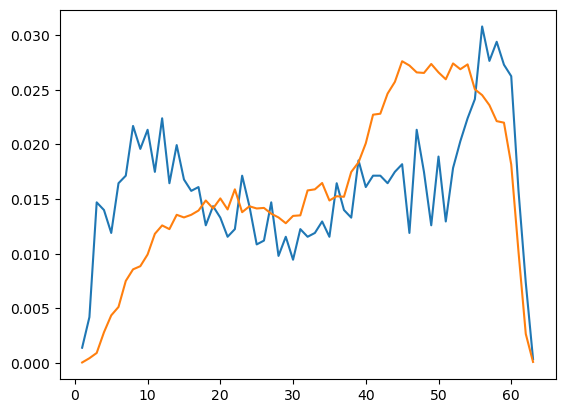

In [150]:
plt.plot(bins[1:], data_test[0])
plt.plot(bins[1:], data_test[4])

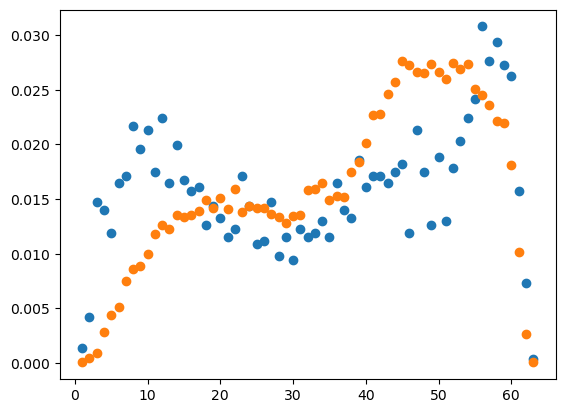

In [152]:
plt.scatter(bins[1:], data_test[0])
plt.scatter(bins[1:], data_test[4])

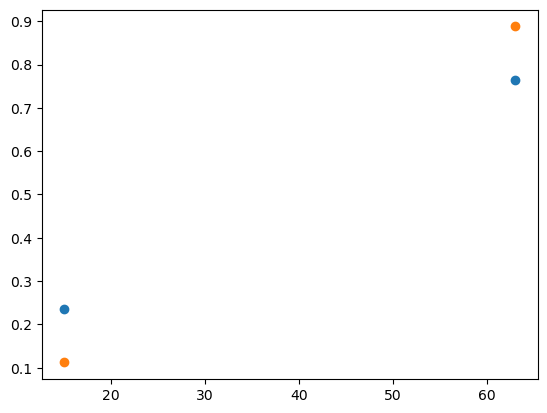

In [154]:
new_bins = [0, 15, 63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
plt.scatter(new_bins[1:], data_bins[0])
plt.scatter(new_bins[1:], data_bins[4])

In [169]:
x

array([ 7.5, 39. ])

(0.0, 63.0)

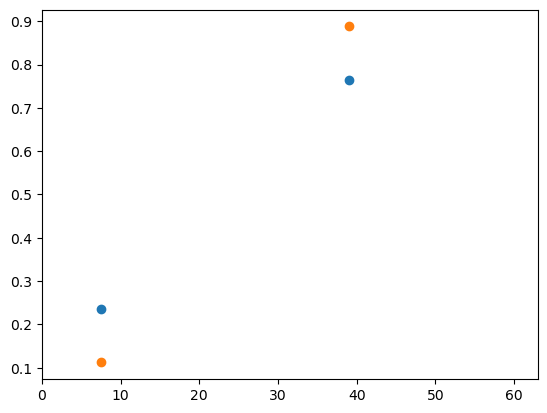

In [171]:
new_bins = [0, 15, 63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
x = np.diff(new_bins)/2 + new_bins[:-1]
plt.scatter(x, data_bins[0])
plt.scatter(x, data_bins[4])
plt.xlim([0, 63])

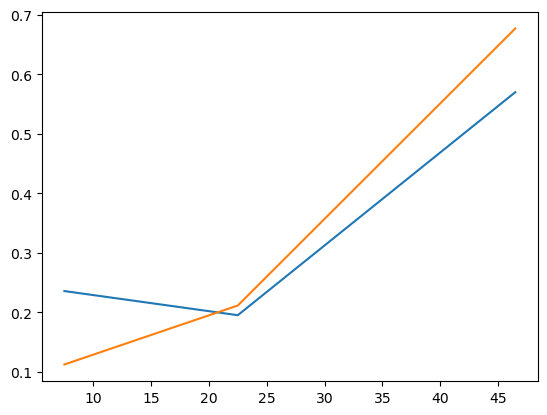

In [167]:
new_bins = [0, 15, 30, 63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
x = np.diff(new_bins)/2 + new_bins[:-1]
plt.plot(x, data_bins[0])
plt.plot(x, data_bins[4])

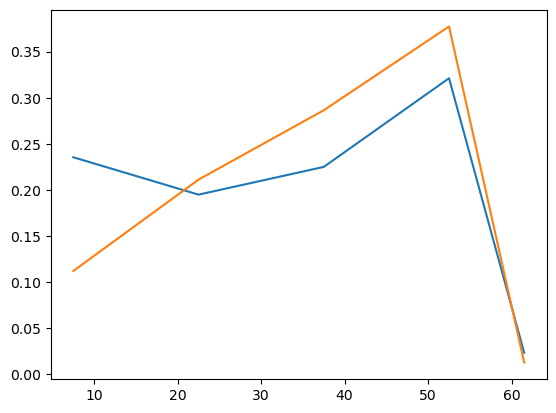

In [166]:
new_bins = [*range(0,63,15)] + [63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
x = np.diff(new_bins)/2 + new_bins[:-1]
plt.plot(x, data_bins[0])
plt.plot(x, data_bins[4])

In [165]:
np.diff(new_bins)/2 + new_bins[:-1]

array([ 2.5,  7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5,
       57.5, 61.5])

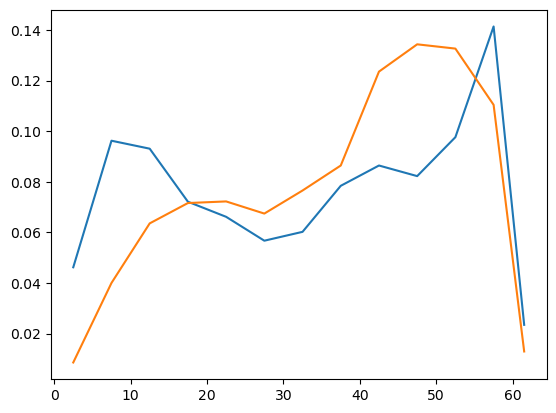

In [172]:
new_bins = [*range(0,63,5)] + [63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
x = np.diff(new_bins)/2 + new_bins[:-1]
plt.plot(x, data_bins[0])
plt.plot(x, data_bins[4])

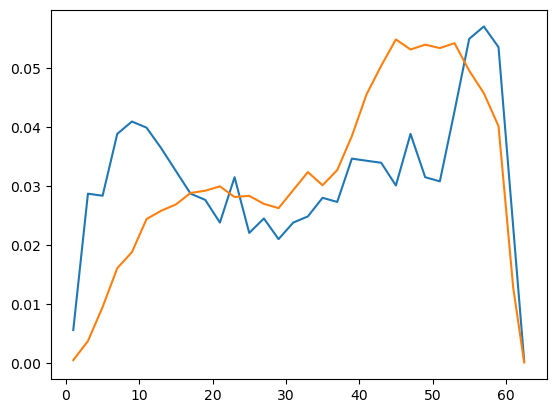

In [173]:
new_bins = [*range(0,63,2)] + [63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
x = np.diff(new_bins)/2 + new_bins[:-1]
plt.plot(x, data_bins[0])
plt.plot(x, data_bins[4])

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 63]
(223, 32)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


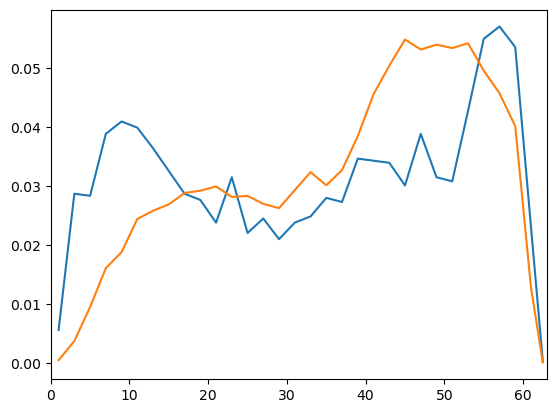

In [199]:
new_bins = [*range(0,63,2)] + [63]
#new_bins = [0, 15, 63]
data_bins = np.column_stack([data_test[:, new_bins[i]:new_bins[i+1]].sum(axis=1) for i in range(len(new_bins) - 1)])
print(new_bins)
print(data_bins.shape)
print(data_bins.sum(axis=1).round(5))
np.savetxt('Data_32bins.txt', data_bins, fmt='%.7f')

x = np.diff(new_bins)/2 + new_bins[:-1]
plt.plot(x, data_bins[0])
plt.plot(x, data_bins[4])
plt.xlim([0, 63])
plt.show()

In [200]:
np.loadtxt('Data_32bins.txt', dtype='float').sum(axis=1).round(5)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [201]:
from matgen import matutils

In [212]:
new_bins = [*range(0,63,1)] + [63]
print(matutils.mackenzie_pmf(np.array(new_bins)))
np.savetxt('Testdata_ref.txt', [matutils.mackenzie_pmf(np.array(new_bins))], fmt='%.5f')

[1.000e-05 4.000e-05 1.300e-04 2.500e-04 4.200e-04 6.100e-04 8.600e-04
 1.140e-03 1.470e-03 1.830e-03 2.230e-03 2.680e-03 3.160e-03 3.690e-03
 4.250e-03 4.850e-03 5.490e-03 6.170e-03 6.900e-03 7.650e-03 8.440e-03
 9.280e-03 1.015e-02 1.106e-02 1.201e-02 1.299e-02 1.401e-02 1.506e-02
 1.616e-02 1.729e-02 1.845e-02 1.965e-02 2.088e-02 2.215e-02 2.346e-02
 2.478e-02 2.616e-02 2.755e-02 2.899e-02 3.045e-02 3.194e-02 3.348e-02
 3.503e-02 3.662e-02 3.823e-02 3.842e-02 3.707e-02 3.564e-02 3.412e-02
 3.251e-02 3.079e-02 2.900e-02 2.712e-02 2.513e-02 2.307e-02 2.092e-02
 1.868e-02 1.634e-02 1.394e-02 1.143e-02 6.220e-03 1.500e-03 0.000e+00]


In [204]:
new_bins = [0, 15, 63]
matutils.mackenzie_pmf(np.array(new_bins))

array([0.02277, 0.97723])

In [213]:
0.00001 + 0.00004 + 0.00013 + 0.00025 + 0.00042 + 0.00061 + 0.00086 + 0.00114 + 0.00147 + 0.00183 + 0.00223 + 0.00268 + 0.00316 + 0.00369 + 0.00425

0.022770000000000002